<a href="https://www.kaggle.com/code/narberalgamma/neural-network-s-p-500-leveraged-etfs-prices?scriptVersionId=208415672" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
## Neural Network: S&P 500 Leveraged ETFs Prices 
## Author: Edgar M.
## Date: 8/3/23
---
## Hypothetical Scenario
This is an extension from "Case Study:S&P 500 Leveraged ETFs: A Case<br> 
Study on Risk and Return." Everything is the same, except for the end.<br>
Which contains a new neural network section. The neural network section<br>
Gives an alternate approach to the analysis. Apart from using the median<br>
leverarge to simulate 2x and 3x leveraged ETFs, a neural network is used<br>
to simulate 2x and 3x leveraged ETFs. Up to a point, code is the same as<br>
"Case Study: S&P 500 Leveraged ETFs: A Case Study on Risk and Return"<br>
Everything in the neural network section is new.<br>

## Prepare Data 

In [13]:
#load nessary packages
#suppressMessages() is used to suppress messages from being printed in console
library(magrittr)
library(dplyr) %>% suppressMessages()
library(quantmod)  %>% suppressMessages()
library(readr) 
library(lubridate) %>% suppressMessages()
library(ggplot2)  
library(scales)  %>% suppressMessages()
library(PerformanceAnalytics)  %>% suppressMessages()

Download GSPC S&P 500 data.<br>
Start date of S&P 500.<br>
Set end date as current system date<br>
Download data and store as an xts object named GSPC<br>
Convert xts (time-series object) to data frame


In [14]:
start_date_SP500 <- as.Date("1957-03-04")
end_date_SP500 <- Sys.Date()
getSymbols("^GSPC", src = "yahoo", from = start_date_SP500, to = end_date_SP500)
SP500_data_unclean <- as.data.frame(GSPC)


[1] "GSPC"

Download and save SSO ETF.<br>
Start date of SSO.<br>
Set end date as current system date.<br>
Download data and store as an xts object named SSO<br>
Convert xts (time-series object) to data frame.

In [15]:
start_date_SSO <- as.Date("2006-03-04")
end_date_SSO <- end_date <- Sys.Date()
getSymbols("SSO", src = "yahoo", from = start_date_SSO, to = end_date_SSO)
SSO_data_unclean <- as.data.frame(SSO) 

[1] "SSO"

Download and save UPRO ETF.<br>
Very fisrt date of UPRO.<br>
Set end date as current system date.<br>
Download data and store as an xts object named UPRO<br>  
Convert xts (time-series object) to data frame.

In [16]:
start_date_UPRO <- as.Date("2009-06-24")
end_date_UPRO <- end_date <- Sys.Date()
getSymbols("UPRO", src = "yahoo", from = start_date_UPRO, to = end_date_UPRO)
UPRO_data_unclean <- as.data.frame(UPRO)

[1] "UPRO"

## Clean GSPC (S&P 500) Data
Assign row names to the "Date" column.<br>
Remove the row names.

In [17]:
SP500_data_unclean$Date <- rownames(SP500_data_unclean)
rownames(SP500_data_unclean) <- NULL

Create a new column "Trading day". seq_len(nrow(SP500_data_unclean))<br>
creates a sequence of integers from 1 to the number of rows in the data<br>
frame. Finally, the resulting sequence is assigned to the Trading_day<br>
column.

In [18]:
SP500_data_unclean$Trading_day <- seq_len(nrow(SP500_data_unclean))

Select Trading_day, Date, GSPC.Close and rename columns. 

In [19]:
SP500_data_clean <- select(SP500_data_unclean, Trading_day, Date, GSPC.Close) %>% 
  rename(SP500_Closing_Price = GSPC.Close)

View the fisrt 6 rows of the resulting SP500_data_clean dataframe.

In [20]:
head(SP500_data_clean)

,Trading_day,Date,SP500_Closing_Price
,<int>,<chr>,<dbl>
1,1,1957-03-04,44.06
2,2,1957-03-05,44.22
3,3,1957-03-06,44.23
4,4,1957-03-07,44.21
5,5,1957-03-08,44.07
6,6,1957-03-11,43.78


## Clean SSO Data (2X S&P 500 Leveraged ETF)
Assign row names to the "Date" column.<br>
Remove the row names.

In [21]:
SSO_data_unclean$Date <- rownames(SSO_data_unclean)
rownames(SSO_data_unclean) <- NULL

Create a new column "Trading day". seq_len(nrow(SSO_data_unclean)) creates<br>
a sequence of integers from 1 to the number of rows in the data frame.<br>
Finally, the resulting sequence is assigned to the Trading_day column.

In [22]:
SSO_data_unclean$Trading_day <- seq_len(nrow(SSO_data_unclean))

Select Trading_day, Date, SSO.Close and rename columns

In [23]:
SSO_data_clean <- select(SSO_data_unclean, Trading_day, Date, SSO.Close) %>% 
  rename(SSO_Closing_Price = SSO.Close)

View the fisrt 6 rows of the resulting SSO_data_clean dataframe.

In [24]:
head(SSO_data_clean)

,Trading_day,Date,SSO_Closing_Price
,<int>,<chr>,<dbl>
1,1,2006-06-21,8.93750
2,2,2006-06-22,8.84250
3,3,2006-06-23,8.84125
4,4,2006-06-26,8.89250
5,5,2006-06-27,8.73500
6,6,2006-06-28,8.81250


## Clean UPRO Data (3X S&P 500 Leveraged ETF)
Assign row names to the "Date" column.<br>
Remove the row names.

In [25]:
UPRO_data_unclean$Date <- rownames(UPRO_data_unclean)
rownames(UPRO_data_unclean) <- NULL

Create a new column "Trading day."seq_len(nrow(UPRO_data_unclean)) creates<br>
a sequence of integers from 1 to the number of rows in the data frame.<br>
Finally, the resulting sequence is assigned to the Trading_day column.

In [26]:
UPRO_data_unclean$Trading_day <- seq_len(nrow(UPRO_data_unclean))

Select Trading_day, Date, UPRO.Close and rename columns

In [27]:
UPRO_data_clean <- select(UPRO_data_unclean, Trading_day, Date, UPRO.Close) %>% 
  rename(UPRO_Closing_Price = UPRO.Close)

View the fisrt 6 rows of the resulting UPRO_data_clean dataframe.

In [28]:
head(UPRO_data_clean)

,Trading_day,Date,UPRO_Closing_Price
,<int>,<chr>,<dbl>
1,1,2009-06-25,1.205556
2,2,2009-06-26,1.199306
3,3,2009-06-29,1.233333
4,4,2009-06-30,1.203889
5,5,2009-07-01,1.216806
6,6,2009-07-02,1.116389



Set GSPC as a hypothetical S&P 500 ETF investment. Leveraged GSPC ETFs<br>
will be compared to GSPC.<br>  

Set monthly investment amount ($).

In [29]:
Monthly_Investment_USD <- 10

## Number of Shares of S&P 500 ETF Purchased on a Monthly Basis
Calculate the investment amount based on 1957-03-05 closing price.

In [30]:
first_day_price_SP500 <- SP500_data_clean$SP500_Closing_Price[2]
Monthly_Share_1_SP500 <- Monthly_Investment_USD / first_day_price_SP500

Create data frame for first month's investment.

In [31]:
first_day_date_SP500 <- SP500_data_clean$Date[2]
first_day_price_SP500 <- SP500_data_clean$SP500_Closing_Price[2]
Monthly_Share_1_df_SP500 <- data.frame(Date = first_day_date_SP500, 
  Shares = Monthly_Share_1_SP500, 
  SP500_Closing_Price = first_day_price_SP500)

Subset data from 1957-04-01 onwards.

In [32]:
SP500_data_filtered <- SP500_data_clean %>%
  filter(Date >= as.Date("1957-04-01", format = "%Y-%m-%d"))

Create a vector of the first trading day for each month.

In [33]:
first_of_month_SP500 <- SP500_data_filtered %>% 
  group_by(year(Date), month(Date)) %>% 
  slice(1) %>% 
  pull(Date)

Calculate the investment amount for each month.

In [34]:
investment_amount_SP500 <- Monthly_Investment_USD / SP500_data_filtered$SP500_Closing_Price[match(first_of_month_SP500, SP500_data_filtered$Date)]
closing_prices_SP500 <- SP500_data_filtered$SP500_Closing_Price[match(first_of_month_SP500, SP500_data_filtered$Date)]

Create the data frame.

In [35]:
Monthly_Shares_2_df_SP500 <- data.frame(Date = first_of_month_SP500, 
  Shares = investment_amount_SP500, SP500_Closing_Price = closing_prices_SP500)


Combine Monthly_Share_1_df and Monthly_Shares_2_df into Monthly_Shares_SP500

In [36]:
Monthly_Shares_SP500 <- rbind(Monthly_Share_1_df_SP500, Monthly_Shares_2_df_SP500)

View the first 6 rows of the resulting Monthly_Shares_SP500 dataframe.

In [37]:
head(Monthly_Shares_SP500)

,Date,Shares,SP500_Closing_Price
,<chr>,<dbl>,<dbl>
1,1957-03-05,0.2261420,44.22
2,1957-04-01,0.2265519,44.14
3,1957-05-01,0.2172968,46.02
4,1957-06-03,0.2111041,47.37
5,1957-07-01,0.2108370,47.43
6,1957-08-01,0.2092488,47.79


Create a new data frame to store cumulative shares and corresponding<br>
closing prices.

In [38]:
Sum_Shares_SP500 <- data.frame(
  # The first column is a sequence of dates, starting from the initial date
  Date = rep(c(as.Date("1957-03-05"), first_of_month_SP500), each = 1),
  # The second column is a sequence of zeroes to store cumulative shares
  Shares = numeric(length(Monthly_Shares_SP500$Shares)),
  # The third column is a sequence of zeroes to store corresponding closing prices
  SP500_Closing_Price = numeric(length(Monthly_Shares_SP500$Shares))
)

# Loop through each index of the Monthly_Shares$Shares vector
for (i in seq_along(Monthly_Shares_SP500$Shares)) {
  # Calculate the cumulative sum of shares up to the current index and store it in the Shares column
  Sum_Shares_SP500[i, "Shares"] <- sum(Monthly_Shares_SP500[1:i, "Shares"])
  # Assign the corresponding SP500_Closing_Price value to the current index
  Sum_Shares_SP500[i, "SP500_Closing_Price"] <- Monthly_Shares_SP500[i, "SP500_Closing_Price"]
}

Insert a new column called "Total_USD" into Sum_Shares dataframe.<br>
Multiply (Shares) by (SP500_Closing_Price).

In [39]:
Sum_Shares_SP500$Total_USD <- Sum_Shares_SP500$Shares * Sum_Shares_SP500$SP500_Closing_Price

View the fisrt 6 rows of the resulting Sum_Shares dataframe.

In [40]:
head(Sum_Shares_SP500)

,Date,Shares,SP500_Closing_Price,Total_USD
,<date>,<dbl>,<dbl>,<dbl>
1,1957-03-05,0.2261420,44.22,10.00000
2,1957-04-01,0.4526939,44.14,19.98191
3,1957-05-01,0.6699907,46.02,30.83297
4,1957-06-03,0.8810948,47.37,41.73746
5,1957-07-01,1.0919318,47.43,51.79033
6,1957-08-01,1.3011806,47.79,62.18342


## Daily Percent Change
### Daily Percent Change for SSO (2x Leveraged S&P 500 ETF)
First trading day is 6/21/2006 for SSO.

Create the new data frame with Date column starting from the second row.

In [41]:
#note Year-month-day
SSO_Daily_Percent_Change_Datedf1 <- data.frame(Date = SSO_data_clean$Date[-1])

Calculate daily percent change.<br>
Exclude the first element of closing prices.

In [42]:
closing_pricesSSO <- SSO_data_clean$SSO_Closing_Price[-1] 

Exclude the last element of closing prices.

In [43]:
previous_pricesSSO <- SSO_data_clean$SSO_Closing_Price[-length(SSO_data_clean$SSO_Closing_Price)]

Calculate the daily percent change.

In [44]:
daily_changeSSO <- (closing_pricesSSO * 100 / previous_pricesSSO) - 100  

Create the new data frame.

In [45]:
SSO_Daily_Percent_Changedf2 <- data.frame(Daily_Percent_Change = daily_changeSSO)

Combine the two data frames.

In [46]:
SSO_Daily_Percent_Changedf <- cbind(SSO_Daily_Percent_Change_Datedf1, SSO_Daily_Percent_Changedf2)

View the first 6 rows of the resulting SSO_Daily_Percent_Changedf dataframe.

In [47]:
head(SSO_Daily_Percent_Changedf)

,Date,Daily_Percent_Change
,<chr>,<dbl>
1,2006-06-22,-1.06294005
2,2006-06-23,-0.01412851
3,2006-06-26,0.57966353
4,2006-06-27,-1.77115849
5,2006-06-28,0.88723923
6,2006-06-29,4.24113172


### Daily Percent Change for UPRO (3x Leveraged S&P 500 ETF)
First trading day is 6/21/2009 for UPRO.<br>

Create the new data frame with Date column starting from the second row.

In [48]:
#note Year-month-day
UPRO_Daily_Percent_Change_Datedf1 <- data.frame(Date = UPRO_data_clean$Date[-1])

Calculate daily percent change.<br>
Exclude the first element of closing prices.

In [49]:
closing_pricesUPRO <- UPRO_data_clean$UPRO_Closing_Price[-1]

Exclude the last element of closing prices.

In [50]:
previous_pricesUPRO <- UPRO_data_clean$UPRO_Closing_Price[-length(UPRO_data_clean$UPRO_Closing_Price)]

Calculate the daily percent change.

In [51]:
daily_changeUPRO <- (closing_pricesUPRO * 100 / previous_pricesUPRO) - 100

Create the new data frame.

In [52]:
UPRO_Daily_Percent_Changedf2 <- data.frame(Daily_Percent_Change = daily_changeUPRO)

Combine the two data frames.

In [53]:
UPRO_Daily_Percent_Changedf <- cbind(UPRO_Daily_Percent_Change_Datedf1, UPRO_Daily_Percent_Changedf2)

View the first 6 rows of the resulting UPRO_Daily_Percent_Changedf dataframe.

In [54]:
head(UPRO_Daily_Percent_Changedf)

,Date,Daily_Percent_Change
,<chr>,<dbl>
1,2009-06-26,-0.518435
2,2009-06-29,2.837223
3,2009-06-30,-2.387350
4,2009-07-01,1.072943
5,2009-07-02,-8.252508
6,2009-07-06,0.273648


## S&P 500 Daily Percent Change Dataframes Corresponding to The Dates SSO and UPRO.
### S&P 500 Daily Percent Change Dataframe Corresponding to The Dates of SSO.
First date from SSO_Daily_Percent_Change_Date_df1 minus one.

In [55]:
first_dateSSO <- as.Date(head(SSO_Daily_Percent_Change_Datedf1$Date, n = 1), format = "%Y-%m-%d") - 1

Filter for dates greater than first_date_SSO.

In [56]:
SP500_data_cleanSSO <- SP500_data_clean %>%
    filter(Date >= first_dateSSO)

Fisrt element is the closing price that corresponds the date of the data<br>
frame "SSO_Daily_Percent_Change_Date_df1"

In [57]:
closing_pricesSP500 <- SP500_data_cleanSSO$SP500_Closing_Price[-1] 

Exclude the last element of closing prices.

In [58]:
previous_pricesSP500 <- SP500_data_cleanSSO$SP500_Closing_Price[-length(SP500_data_cleanSSO$SP500_Closing_Price)]

Calculate the daily percent change.

In [59]:
daily_changeSP500 <- (closing_pricesSP500 * 100 / previous_pricesSP500) - 100  

Create the new data frame.

In [60]:
SP500_Daily_Percent_Changedf2 <- data.frame(Daily_Percent_Change = daily_changeSP500)  

Combine the two data frames

In [61]:
SP500_Daily_Percent_Change_SSOdf <- cbind(SSO_Daily_Percent_Change_Datedf1, SP500_Daily_Percent_Changedf2)

View the first 6 rows of the resulting SP500_Daily_Percent_Change_SSOdf<br>
dataframe. S&P 500 Daily Percent Change Dataframe corresponding to the<br>
dates of SSO

In [62]:
head(SP500_Daily_Percent_Change_SSOdf)

,Date,Daily_Percent_Change
,<chr>,<dbl>
1,2006-06-22,-0.5270704
2,2006-06-23,-0.0883089
3,2006-06-26,0.4869473
4,2006-06-27,-0.9084016
5,2006-06-28,0.5487451
6,2006-06-29,2.1565004


### S&P 500 Daily Percent Change Dataframe Corresponding to The Dates of UPRO.
First date from UPRO_Daily_Percent_Change_Date_df1 

In [63]:
first_dateUPRO <- as.Date(head(UPRO_Daily_Percent_Change_Datedf1$Date, n = 1), format = "%Y-%m-%d") 

Convert the "Date" column to Date format.<br>
This line of code does not create a new variable but rather updates the<br>
existing Date column within the SP500_Daily_Percent_Change_SSO_df data frame.

In [64]:
SP500_Daily_Percent_Change_SSOdf$Date <- as.Date(SP500_Daily_Percent_Change_SSOdf$Date, format = "%Y-%m-%d")

Filter for dates greater than or equal to first_date_UPRO

In [65]:
SP500_Daily_Percent_Change_UPROdf <- SP500_Daily_Percent_Change_SSOdf %>%
  filter(Date >= first_dateUPRO)


View the first 6 rows of the resulting SP500_Daily_Percent_Change_UPROdf<br>
dataframe. S&P 500 Daily Percent Change Dataframe corresponding to the<br>
dates of UPRO.

In [66]:
head(SP500_Daily_Percent_Change_UPROdf)

,Date,Daily_Percent_Change
,<date>,<dbl>
1,2009-06-26,-0.1477827
2,2009-06-29,0.9065139
3,2009-06-30,-0.8530756
4,2009-07-01,0.4361930
5,2009-07-02,-2.9144546
6,2009-07-06,0.2565748


## Calculate Daily Leverage and Median Daily Leverage for SSO and UPRO.
### Calculate Daily Leverage for SSO.
Create the SSO_Lev data frame. Need to replace infinite values for SSO_LevDiv.

In [67]:
SSO_LevDiv <- data.frame(SSO_Leverage = SSO_Daily_Percent_Changedf2 / SP500_Daily_Percent_Changedf2)

Replace Infinities in data with 2.

In [68]:
SSO_LevDiv <- do.call(data.frame,lapply(SSO_LevDiv, function(x) replace(x, is.infinite(x), 2)))

Create the SSO_Lev data frame with the desired column name.

In [69]:
SSOLev <- data.frame(SSO_Leverage = SSO_LevDiv$Daily_Percent_Change)

View the first 6 rows of the resulting SSOLev dataframe.<br>
Daily Leverage for SSO.

In [70]:
head(SSOLev)

,SSO_Leverage
,<dbl>
1,2.0166946
2,0.1599896
3,1.1904031
4,1.9497527
5,1.6168513
6,1.9666733


### Calculate Daily Leverage for UPRO.
Makes new data frame called SP500_Daily_Percent_Change_df3.<br>
Filters out the Date column from SP500_Daily_Percent_Change_UPRO_df.

In [71]:
SP500_Daily_Percent_Changedf3 <- SP500_Daily_Percent_Change_UPROdf %>% 
  select('Daily_Percent_Change')

Create the UPRO_Lev data frame. Need to replace infinite values for UPRO_Leverage.

In [72]:
UPRO_LevDiv <- data.frame(UPRO_Leverage = UPRO_Daily_Percent_Changedf2 / SP500_Daily_Percent_Changedf3)

Replace Infinities in data with 3.

In [73]:
UPRO_LevDiv <- do.call(data.frame,lapply(UPRO_LevDiv, function(x) replace(x, is.infinite(x), 3)))

Create the UPRO_Lev data frame with the desired column name.

In [74]:
UPROLev <- data.frame(UPRO_Leverage = UPRO_LevDiv$Daily_Percent_Change)

View the first 6 rows of the resulting UPROLev dataframe.<br>
Daily Leverage for UPRO.

In [75]:
head(UPROLev)

,UPRO_Leverage
,<dbl>
1,3.508089
2,3.129817
3,2.798521
4,2.459789
5,2.831579
6,1.066543


### Filter Out Median Daily Leverage For SSO and UPRO.
Median Daily Leverage for SSO.

In [76]:
MedianSSO <- SSOLev %>%
  summarise(Median_Lev_SSO = median(SSO_Leverage))

In [77]:
head(MedianSSO)

,Median_Lev_SSO
,<dbl>
1,1.972011


Median Daily Leverage for UPRO.

In [78]:
MedianUPRO <- UPROLev %>%
  summarise(Median_Lev_UPRO = median(UPRO_Leverage))

In [79]:
head(MedianUPRO)

,Median_Lev_UPRO
,<dbl>
1,2.966843


## Create Daily Percent Change For S&P 500 (1x, 2x, 3x).
### Create Daily Percent Change Dataframe For 1X S&P 500.
Create the new data frame with date column starting from the second row.

In [80]:
#note Year-month-day
SP500_Daily_Percent_Change_Datedf1 <- data.frame(Date = SP500_data_clean$Date[-1])

Calculate daily percent change.<br>
Exclude the first element of closing prices.

In [81]:
closing_pricesSP500 <- SP500_data_clean$SP500_Closing_Price[-1]

Exclude the last element of closing prices.

In [82]:
previous_pricesSP500 <- SP500_data_clean$SP500_Closing_Price[-length(SP500_data_clean$SP500_Closing_Price)]

Calculate the daily percent change.

In [83]:
daily_changeSP500 <- (closing_pricesSP500 * 100 / previous_pricesSP500) - 100

Create the new data frame.

In [84]:
SP500_Daily_Percent_Changedf2 <- data.frame(Daily_Percent_Change = daily_changeSP500)

Combine the two data frames.

In [85]:
SP500_Daily_Percent_Changedf <- cbind(SP500_Daily_Percent_Change_Datedf1, SP500_Daily_Percent_Changedf2)

### Create Daily Percent Change Dataframe For S&P 500 (1x, 2x, 3x).
To calculate the daily percent change for the S&P 500 (1x, 2x, 3x)<br>
dataframes, one might be tempted to multiply the daily percent change of<br>
the 1X S&P 500 by 2 and 3, respectively. However, this method is not<br>
entirely accurate due to the daily rebalancing of leverage ETFs. Which<br>
introduces a tracking error between the non-leveraged and leveraged ETFs.<br>
This error causes a small deviation from the target leverage of 2 and 3.<br>
Therefore, a more accurate approach is to calculate the median leverage<br>
for the 2X and 3X datasets, then multiply it by the daily percent change<br>
of the 1X S&P 500. This method takes into account the varying leverage<br>
ratios of the ETFs and provides a more accurate representation of the<br>
daily percent change for the S&P 500 (2x, 3x).

In [86]:
Lev_Percent_df <- SP500_Daily_Percent_Changedf %>%
  # Calculate the product of Median_Lev_SSO and Daily_Percent_Change
  mutate(SP500_2X_DailyPercent = MedianSSO$Median_Lev_SSO * Daily_Percent_Change,
  # Calculate the product of Median_Lev_UPRO and Daily_Percent_Change
         SP500_3X_DailyPercent = MedianUPRO$Median_Lev_UPRO * Daily_Percent_Change) %>%
  # Select specific columns to keep in the resulting data frame
  select(Date, Daily_Percent_Change, SP500_2X_DailyPercent, SP500_3X_DailyPercent) %>% 
  # Rename selected columns
  rename(SP500_DailyPercent = Daily_Percent_Change)

View the first 6 rows of the resulting Lev_Percent_df dataframe.

In [87]:
head(Lev_Percent_df)

,Date,SP500_DailyPercent,SP500_2X_DailyPercent,SP500_3X_DailyPercent
,<chr>,<dbl>,<dbl>,<dbl>
1,1957-03-05,0.36314081,0.71611757,1.07738181
2,1957-03-06,0.02261041,0.04458796,0.06708152
3,1957-03-07,-0.04521921,-0.08917277,-0.13415831
4,1957-03-08,-0.31666906,-0.62447478,-0.93950742
5,1957-03-11,-0.65804610,-1.29767395,-1.95231952
6,1957-03-12,-0.06852165,-0.13512543,-0.20329299


## Create Closing Price Dataframe For S&P 500 (1x, 2x, 3x).
### Create Closing Price Dataframe For 1X S&P 500.
Filter out fisrt row from SP500_data_clean.

In [88]:
SP500_data_clean2 <- SP500_data_clean[-1,]

### Create Closing Price Dataframe for 2X Leveraged S&P 500.
Calculates the daily closing prices of a leveraged S&P 500 ETF by<br>
applying a cumulative product function to the daily percentage changes in<br>
the ETF's value, starting from the first day's price.

In [89]:
SP500_2XClosingPrice_df2 <- data.frame(SP500_2XClosingPrice = Reduce(function(x, y) x * (100 + y) / 100, Lev_Percent_df$SP500_2X_DailyPercent, accumulate = TRUE, init = first_day_price_SP500))

Remove fisrt row from SP500_2XClosingPrice_df2.

In [90]:
SP500_2XClosingPrice_df2 <- SP500_2XClosingPrice_df2[-1,]

Make dataframe and rename column as SP500_2XClosing_Price.

In [91]:
SP500_2XClosingPrice_df <- data.frame(SP500_2XClosingPrice_df2)  %>% 
  rename(SP500_2XClosing_Price = SP500_2XClosingPrice_df2)

### Create Closing Price Dataframe For 3X Leveraged S&P 500.
Same procedure as SP500_2XClosingPrice_df2, but now for 3X leverage.

In [92]:
SP500_3XClosingPrice_df2 <- data.frame(SP500_3XClosingPrice = Reduce(function(x, y) x * (100 + y) / 100, Lev_Percent_df$SP500_3X_DailyPercent, accumulate = TRUE, init = first_day_price_SP500))

Remove fisrt row from SP500_3XClosingPrice_df2.

In [93]:
SP500_3XClosingPrice_df2 <- SP500_3XClosingPrice_df2[-1,]

Make dataframe and rename column to SP500_3XClosing_Price.

In [94]:
SP500_3XClosingPrice_df <- data.frame(SP500_3XClosingPrice_df2)  %>% 
  rename(SP500_3XClosing_Price = SP500_3XClosingPrice_df2)

### Dataframe Closing Price for S&P 500 (1x, 2x, 3x).
Combine SP500_data_clean2, SP500_2XClosingPrice_df, SP500_3XClosingPrice_df

In [95]:
SP500_ALL_ClosingPrices <- cbind(SP500_data_clean2, SP500_2XClosingPrice_df, SP500_3XClosingPrice_df)

View the first 6 rows of the resulting SP500_ALL_ClosingPrices dataframe.

In [96]:
head(SP500_ALL_ClosingPrices)

,Trading_day,Date,SP500_Closing_Price,SP500_2XClosing_Price,SP500_3XClosing_Price
,<int>,<chr>,<dbl>,<dbl>,<dbl>
2,2,1957-03-05,44.22,44.53667,44.69642
3,3,1957-03-06,44.23,44.55653,44.72640
4,4,1957-03-07,44.21,44.51679,44.66640
5,5,1957-03-08,44.07,44.23880,44.24675
6,6,1957-03-11,43.78,43.66472,43.38292
7,7,1957-03-12,43.75,43.60572,43.29472


## Plot Closing Prices for S&P 500 (1x, 2x, 3x).
The line for 1X S&P 500 is barely noticible in the graph.2X S&P 500 and<br>
3X S&P 500 rise very quickly when compared to 1X S&P 500.3X S&P 500 rises<br>
the quickest of the three. Therefore it is best to graph in log scale.

In [97]:
SP500_ALL_ClosingPrices_DateConvert <- SP500_ALL_ClosingPrices
SP500_ALL_ClosingPrices_DateConvert$Date <- as.Date(SP500_ALL_ClosingPrices_DateConvert$Date, format = "%Y-%m-%d")

SP500_ALL_ClosingPrices_plot <- ggplot(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = SP500_Closing_Price), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = SP500_2XClosing_Price, color = "SP500_2X"), group = 1) +
  geom_line(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = SP500_3XClosing_Price, color = "SP500_3X"), group = 1) +
  scale_y_continuous(breaks = c(0,4000 ,50000,75000, 10000, 100000, 150000, 200000, 250000, 300000, 320000),
                     labels = c("0", "4K", "50K","75K", "10K", "100K", "150K", "200K", "250K", "300K", "320K")) +
  labs(y = element_text("Price USD", size = 16, face = "bold"), x = element_text("Date", size = 16, face = "bold")) +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  scale_color_manual(values = c("SP500" = "red", "SP500_2X" = "blue", "SP500_3X" = "darkgreen"),
                     labels = c("SP500", "SP500_2X", "SP500_3X")) +
  guides(color = guide_legend(title = "Color")) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14)) +
  ggtitle("Price USD for SP500, SP500_2X, AND SP500_3X")

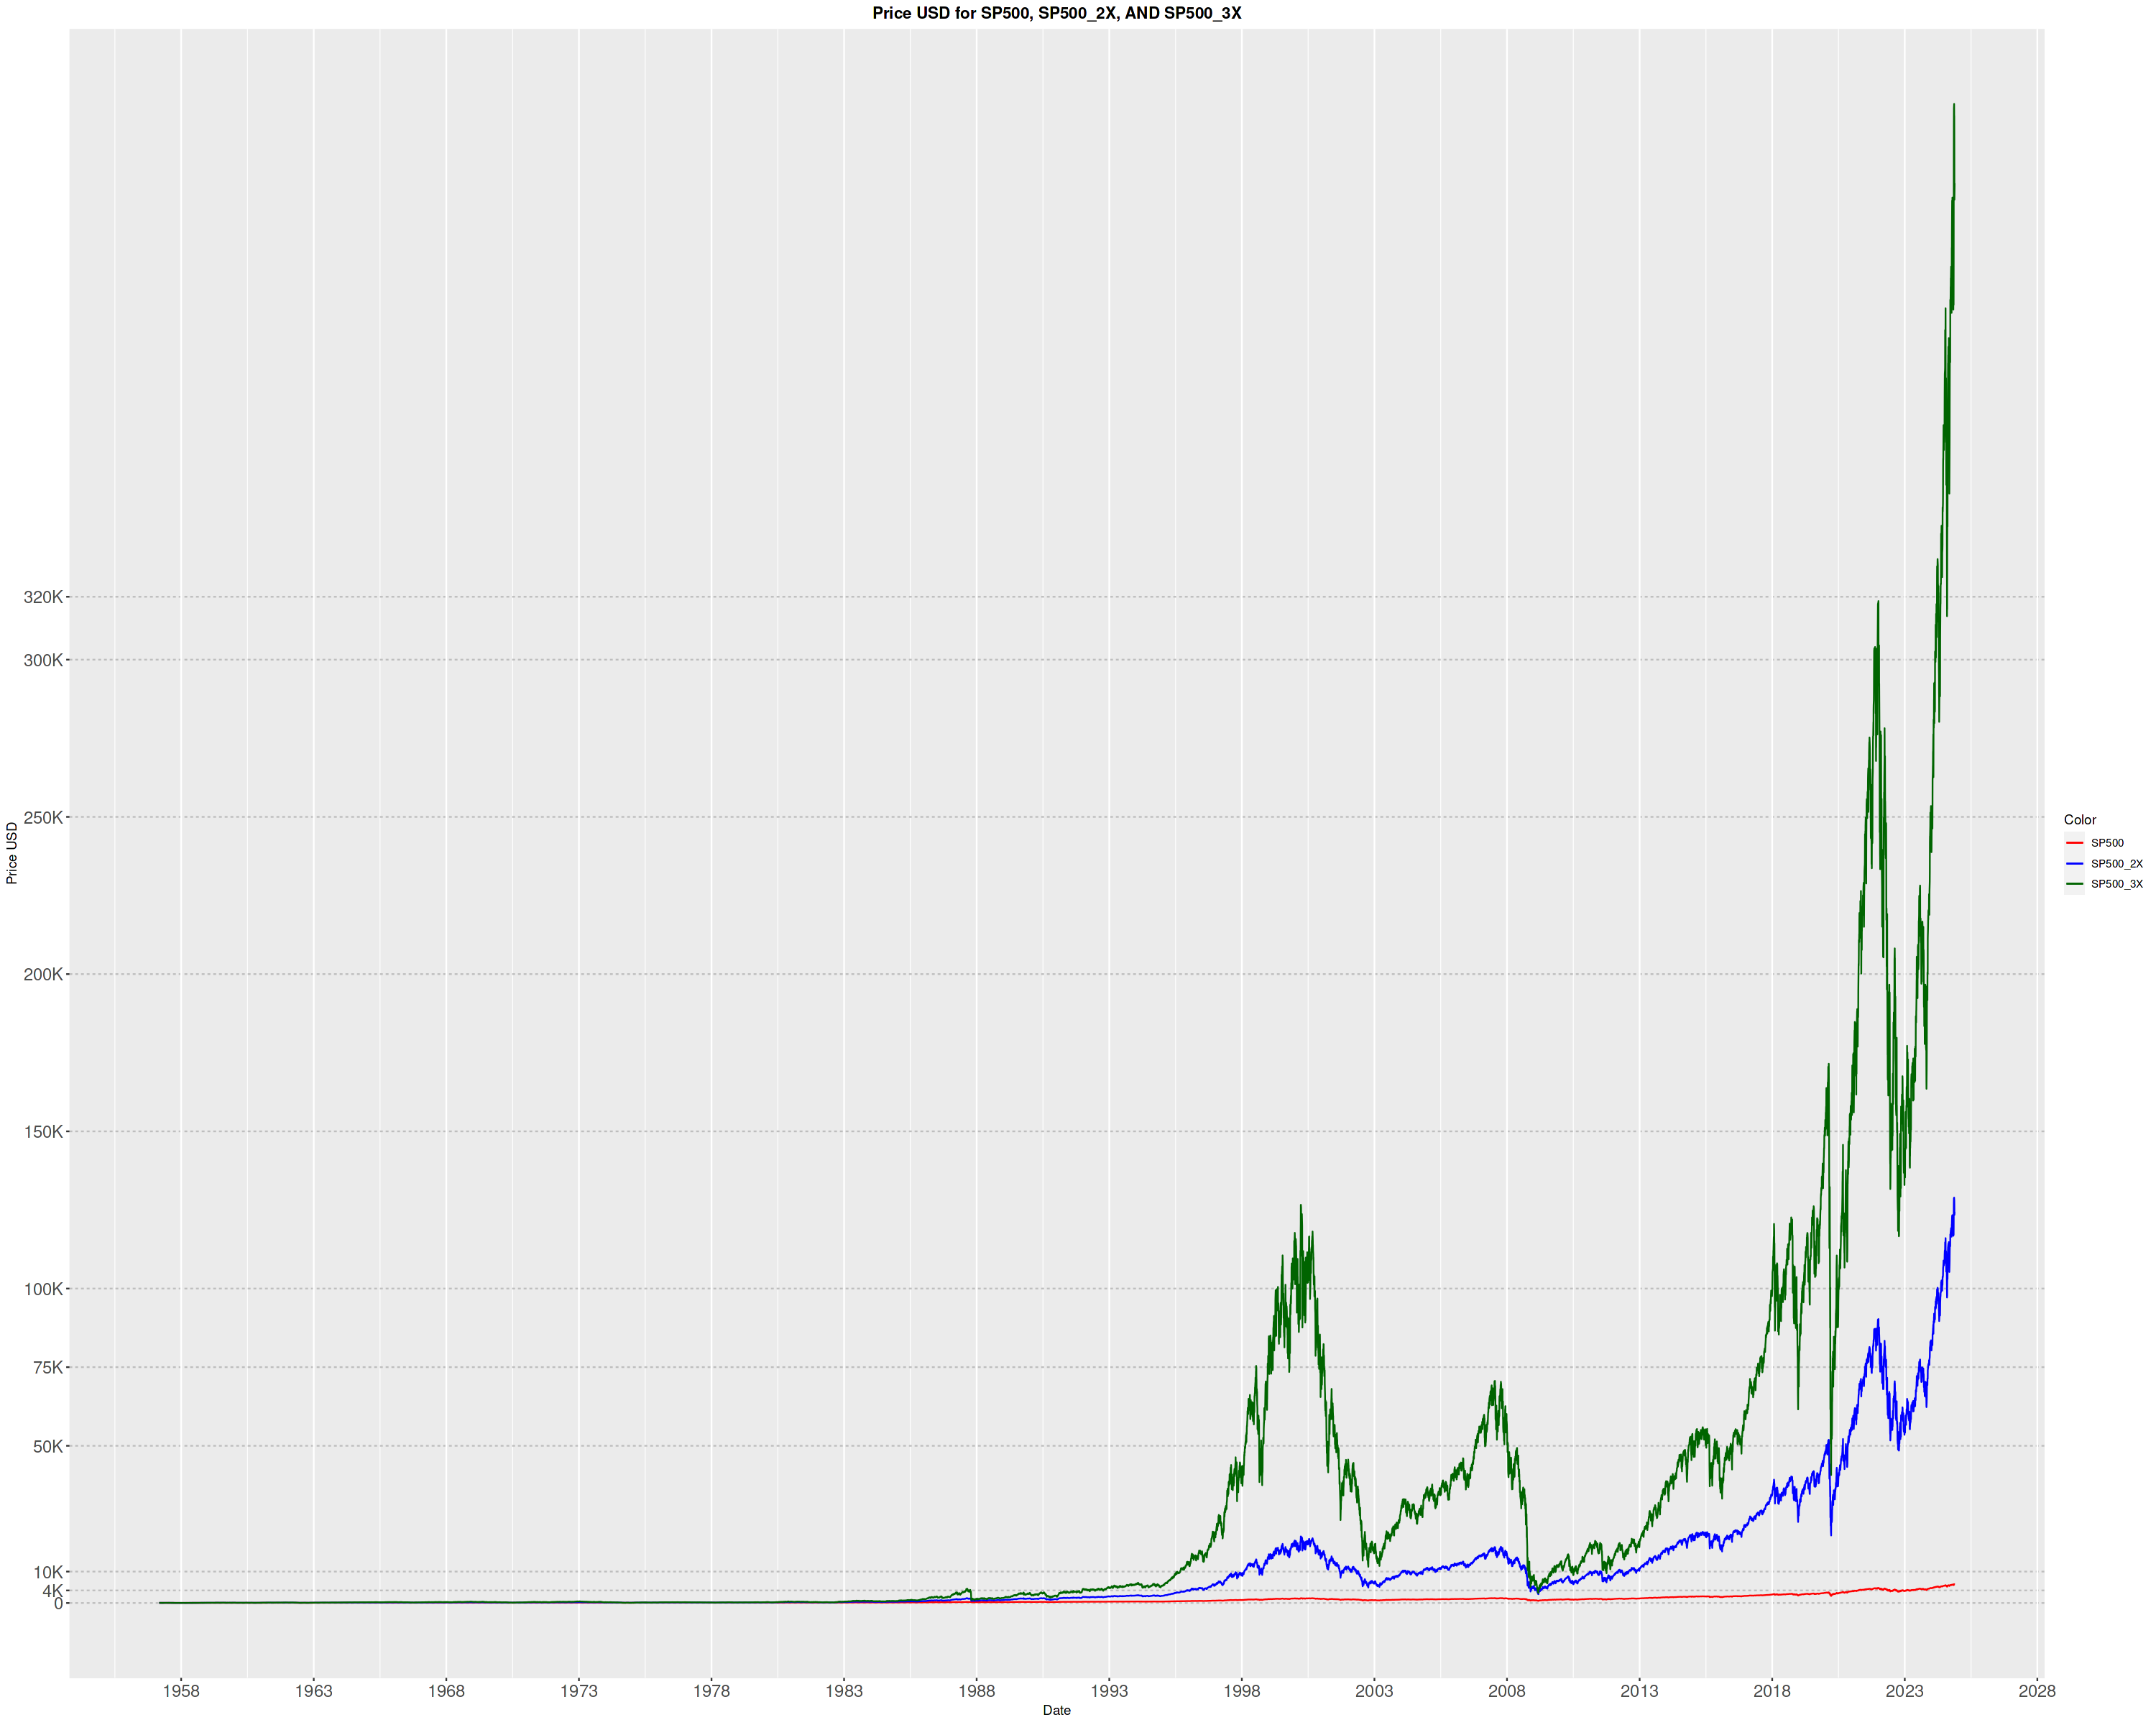

In [98]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_ALL_ClosingPrices_plot)

## Plot Closing Prices for S&P 500 (1x, 2x, 3x) in Log Scale.
Now in log scale, the graph is more readible. 

In [99]:
SP500_ALL_ClosingPrices_plot_log10 <- ggplot(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = log10(SP500_Closing_Price)), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = log10(SP500_2XClosing_Price), color = "SP500_2X"), group = 1) +
  geom_line(data = SP500_ALL_ClosingPrices_DateConvert, aes(x = Date, y = log10(SP500_3XClosing_Price), color = "SP500_3X"), group = 1) +
  scale_y_continuous(breaks = c(1.477, 2, 3, 3.602, 4, 4.875, 5, 5.301, 5.477),
                     labels = c("30" ,"100", "1K", "4K", "10K", "75K", "100K", "200K", "300K")) +
  labs(y = element_text("log10(Price USD)", size = 16, face = "bold"), x = element_text("Date", size = 16, face = "bold")) +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  scale_color_manual(values = c("SP500" = "red", "SP500_2X" = "blue", "SP500_3X" = "darkgreen"),
                     labels = c("SP500", "SP500_2X", "SP500_3X")) +
  guides(color = guide_legend(title = "Color")) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14)) +
  ggtitle("log10(Price USD) for SP500, SP500_2X, AND SP500_3X")

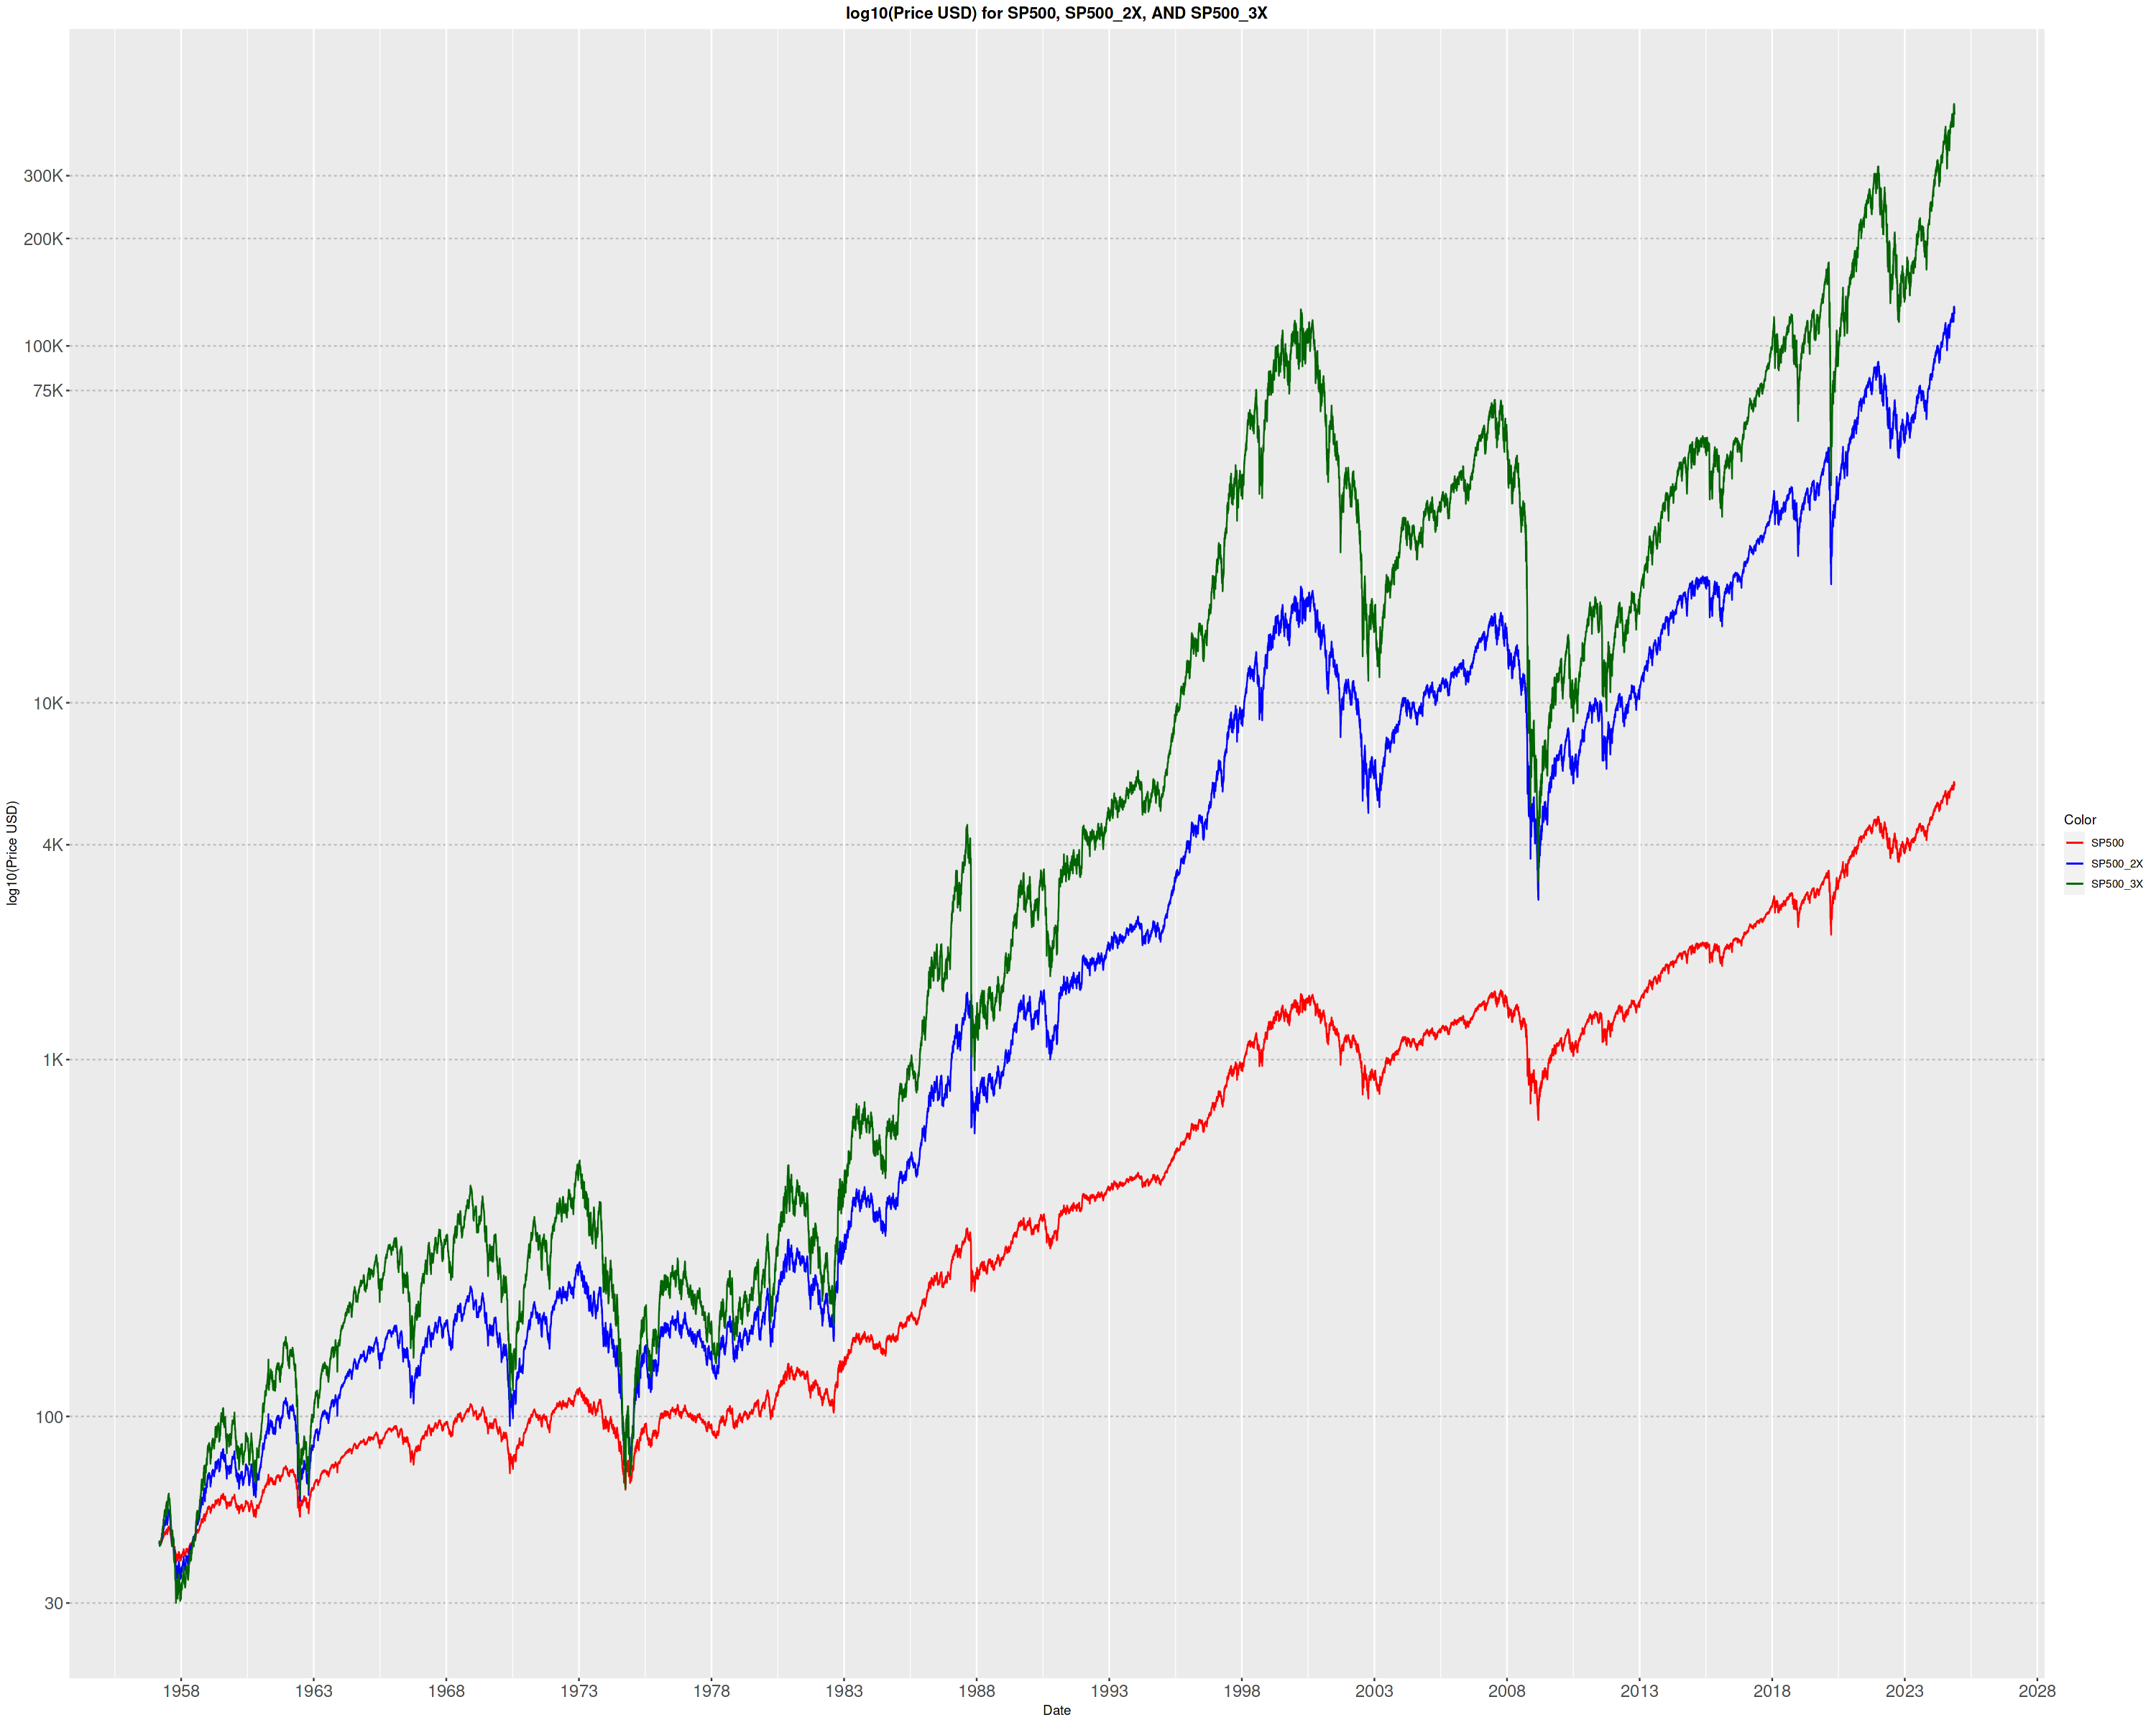

In [100]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_ALL_ClosingPrices_plot_log10)

## Number of Shares of S&P 500 Leveraged ETF purchased on a Monthly Basis
Now that the closing prices for S&P 500 (1x, 2x, 3x) are known. The<br>
number of shares bought on a monthly basis for each leverage ETF can be<br>
calculated. The number of shares bought is based on Monthly_Investment_USD<br>
amount and the closing price for each leverage ETF.<br> 

### Number of Shares of S&P 500 2X Leveraged ETF purchased on a Monthly Basis
Calculate the investment amount based on 1957-03-05 price.

In [101]:
first_day_price_SP5002X <- SP500_ALL_ClosingPrices$SP500_2XClosing_Price[1]
Monthly_Share_1_SP5002X <- Monthly_Investment_USD / first_day_price_SP5002X

Create data frame for first month's investment.

In [102]:
first_day_date_SP5002X <- SP500_ALL_ClosingPrices$Date[1]
first_day_price_SP5002X <- SP500_ALL_ClosingPrices$SP500_2XClosing_Price[1]
Monthly_Share_1_df_SP5002X <- data.frame(Date = first_day_date_SP5002X, 
  Shares2X = Monthly_Share_1_SP5002X, 
  SP500_2XClosing_Price = first_day_price_SP5002X)

Subset data from 1957-04-01 onwards.

In [103]:
SP500_data_filtered2X <- SP500_ALL_ClosingPrices %>%
  filter(Date >= as.Date("1957-04-01", format = "%Y-%m-%d"))

Create a vector of the first trading day for each month.

In [104]:
first_of_month_SP5002X <- SP500_data_filtered2X %>% 
  group_by(year(Date), month(Date)) %>% 
  slice(1) %>% 
  pull(Date)

Calculate the investment amount for each month.

In [105]:
investment_amount_SP5002X <- Monthly_Investment_USD / SP500_data_filtered2X$SP500_2XClosing_Price[match(first_of_month_SP5002X, SP500_data_filtered2X$Date)]
closing_prices_SP5002X <- SP500_data_filtered2X$SP500_2XClosing_Price[match(first_of_month_SP5002X, SP500_data_filtered2X$Date)]

Create data frame for monthly investment.

In [106]:
Monthly_Shares_2_df_SP5002X <- data.frame(Date = first_of_month_SP5002X, 
  Shares2X = investment_amount_SP5002X, SP500_2XClosing_Price = closing_prices_SP5002X)

Combine Monthly_Share_1_df and Monthly_Shares_2_df into Monthly_Shares_SP5002X_df.

In [107]:
Monthly_Shares_SP5002X <- rbind(Monthly_Share_1_df_SP5002X, Monthly_Shares_2_df_SP5002X)

Create a new data frame to store cumulative shares and corresponding closing prices.

In [108]:
Sum_Shares_SP5002X <- data.frame(
  # The first column is a sequence of dates, starting from the initial date
  Date = rep(c(as.Date("1957-03-05"), first_of_month_SP5002X), each = 1),
  # The second column is a sequence of zeroes to store cumulative shares
  Shares2X = numeric(length(Monthly_Shares_SP5002X$Shares2X)),
  # The third column is a sequence of zeroes to store corresponding closing prices
  SP500_2XClosing_Price = numeric(length(Monthly_Shares_SP5002X$Shares2X))
)

# Loop through each index of the Monthly_Shares$Shares vector
for (i in seq_along(Monthly_Shares_SP5002X$Shares2X)) {
  # Calculate the cumulative sum of shares up to the current index and store it in the Shares2X column
  Sum_Shares_SP5002X[i, "Shares2X"] <- sum(Monthly_Shares_SP5002X[1:i, "Shares2X"])
  # Assign the corresponding SP500_Closing_Price value to the current index
  Sum_Shares_SP5002X[i, "SP500_2XClosing_Price"] <- Monthly_Shares_SP5002X[i, "SP500_2XClosing_Price"]
}

Insert a new column called "Total_USD" into Sum_Shares dataframe.
Multiply (Shares) by (SP500_Closing_Price).

In [109]:
Sum_Shares_SP5002X$Total_USD2X <- Sum_Shares_SP5002X$Shares2X * Sum_Shares_SP5002X$SP500_2XClosing_Price

### Number of shares of S&P 500 3X Leveraged ETF Purchased on a Monthly Basis.
Calculate the investment amount based on 1957-03-05 price.

In [110]:
first_day_price_SP5003X <- SP500_ALL_ClosingPrices$SP500_3XClosing_Price[1]
Monthly_Share_1_SP5003X <- Monthly_Investment_USD / first_day_price_SP5003X

Create data frame for first month's investment.

In [111]:
first_day_date_SP5003X <- SP500_ALL_ClosingPrices$Date[1]
first_day_price_SP5003X <- SP500_ALL_ClosingPrices$SP500_3XClosing_Price[1]
Monthly_Share_1_df_SP5003X <- data.frame(Date = first_day_date_SP5003X, 
  Shares3X = Monthly_Share_1_SP5003X, 
  SP500_3XClosing_Price = first_day_price_SP5003X)

Subset data from 1957-04-01 onwards.

In [112]:
SP500_data_filtered3X <- SP500_ALL_ClosingPrices %>%
  filter(Date >= as.Date("1957-04-01", format = "%Y-%m-%d"))

Create a vector of the first trading day for each month.

In [113]:
first_of_month_SP5003X <- SP500_data_filtered3X %>% 
  group_by(year(Date), month(Date)) %>% 
  slice(1) %>% 
  pull(Date)

Calculate the investment amount for each month.

In [114]:
investment_amount_SP5003X <- Monthly_Investment_USD / SP500_data_filtered3X$SP500_3XClosing_Price[match(first_of_month_SP5003X, SP500_data_filtered3X$Date)]
closing_prices_SP5003X <- SP500_data_filtered3X$SP500_3XClosing_Price[match(first_of_month_SP5003X, SP500_data_filtered3X$Date)]

Create data frame for monthly investment.

In [115]:
Monthly_Shares_2_df_SP5003X <- data.frame(Date = first_of_month_SP5003X, 
  Shares3X = investment_amount_SP5003X, SP500_3XClosing_Price = closing_prices_SP5003X)

Combine Monthly_Share_1_df and Monthly_Shares_2_df into Monthly_Shares_SP5003X_df.

In [116]:
Monthly_Shares_SP5003X <- rbind(Monthly_Share_1_df_SP5003X, Monthly_Shares_2_df_SP5003X)

Create a new data frame to store cumulative shares and corresponding closing prices.

In [117]:
Sum_Shares_SP5003X <- data.frame(
  # The first column is a sequence of dates, starting from the initial date
  Date = rep(c(as.Date("1957-03-05"), first_of_month_SP5003X), each = 1),
  # The second column is a sequence of zeroes to store cumulative shares
  Shares3X = numeric(length(Monthly_Shares_SP5003X$Shares3X)),
  # The third column is a sequence of zeroes to store corresponding closing prices
  SP500_3XClosing_Price = numeric(length(Monthly_Shares_SP5003X$Shares3X))
)

# Loop through each index of the Monthly_Shares$Shares vector
for (i in seq_along(Monthly_Shares_SP5003X$Shares3X)) {
  # Calculate the cumulative sum of shares up to the current index and store it in the Shares2X column
  Sum_Shares_SP5003X[i, "Shares3X"] <- sum(Monthly_Shares_SP5003X[1:i, "Shares3X"])
  # Assign the corresponding SP500_Closing_Price value to the current index
  Sum_Shares_SP5003X[i, "SP500_3XClosing_Price"] <- Monthly_Shares_SP5003X[i, "SP500_3XClosing_Price"]
}

Insert a new column called "Total_USD" into Sum_Shares dataframe.<br>
Multiply (Shares) by (SP500_Closing_Price).

In [118]:
Sum_Shares_SP5003X$Total_USD3X <- Sum_Shares_SP5003X$Shares3X * Sum_Shares_SP5003X$SP500_3XClosing_Price

### Summary of Total USD Value for S&P 500 (1X, 2X, 3X).

In [119]:
SP500_select <- Sum_Shares_SP500 %>%
  select(Date, Total_USD) %>%
  rename(Total_USD_SP500 = Total_USD) 
  
SP500_select2X <- Sum_Shares_SP5002X %>%
  select(Total_USD2X) %>%
  rename(Total_USD_SP5002X = Total_USD2X)  

SP500_select3X <- Sum_Shares_SP5003X %>%
  select(Total_USD3X) %>%
  rename(Total_USD_SP5003X = Total_USD3X) 

SP500_ALL <- cbind(SP500_select, SP500_select2X, SP500_select3X)

View first 6 rows of SP500_ALL. Dataframe shows the total USD value of<br>
the investment in S&P 500, 1X, 2X and 3X ETFs.

In [120]:
head(SP500_ALL)

,Date,Total_USD_SP500,Total_USD_SP5002X,Total_USD_SP5003X
,<date>,<dbl>,<dbl>,<dbl>
1,1957-03-05,10.00000,10.00000,10.00000
2,1957-04-01,19.98191,19.96261,19.94113
3,1957-05-01,30.83297,31.66759,32.54772
4,1957-06-03,41.73746,43.51080,45.41524
5,1957-07-01,51.79033,53.60190,55.53003
6,1957-08-01,62.18342,64.38006,66.70390


## Plot of Total USD Value for S&P 500, 1X, 2X, and 3X ETFs.

Graph shows the total USD value of the investment in S&P 500, 1X, 2X and<br>
3X ETFs. The investment amount is 10 dollars per month. The monthly investment<br>
amount doesn't matter. If the monthly amount is 100 dollars, then the total USD<br>
value will be 10 times higher. The graph retains the same shape and trend<br>
regardless of the monthly investment amount. 

In [121]:
SP500_ALL_plot <- ggplot(data = SP500_ALL, aes(x = Date, y = Total_USD_SP500), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_ALL, aes(x = Date, y = Total_USD_SP5002X, color = "SP500_2X"), group = 1) +
  geom_line(data = SP500_ALL, aes(x = Date, y = Total_USD_SP5003X, color = "SP500_3X"), group = 1) +
  scale_y_continuous(breaks = c(10, 100000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000),
                     labels = c("10", "100K", "1M", "2M", "3M", "4M", "5M", "6M", "7M")) +
  labs(y = "Total USD", x = "Date") +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  scale_color_manual(values = c("SP500" = "red", "SP500_2X" = "blue", "SP500_3X" = "darkgreen"),
                     labels = c("SP500", "SP500_2X", "SP500_3X")) +
  guides(color = guide_legend(title = "Color")) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16)) +
  ggtitle("Total USD for SP500, SP500_2X, AND SP500_3X")

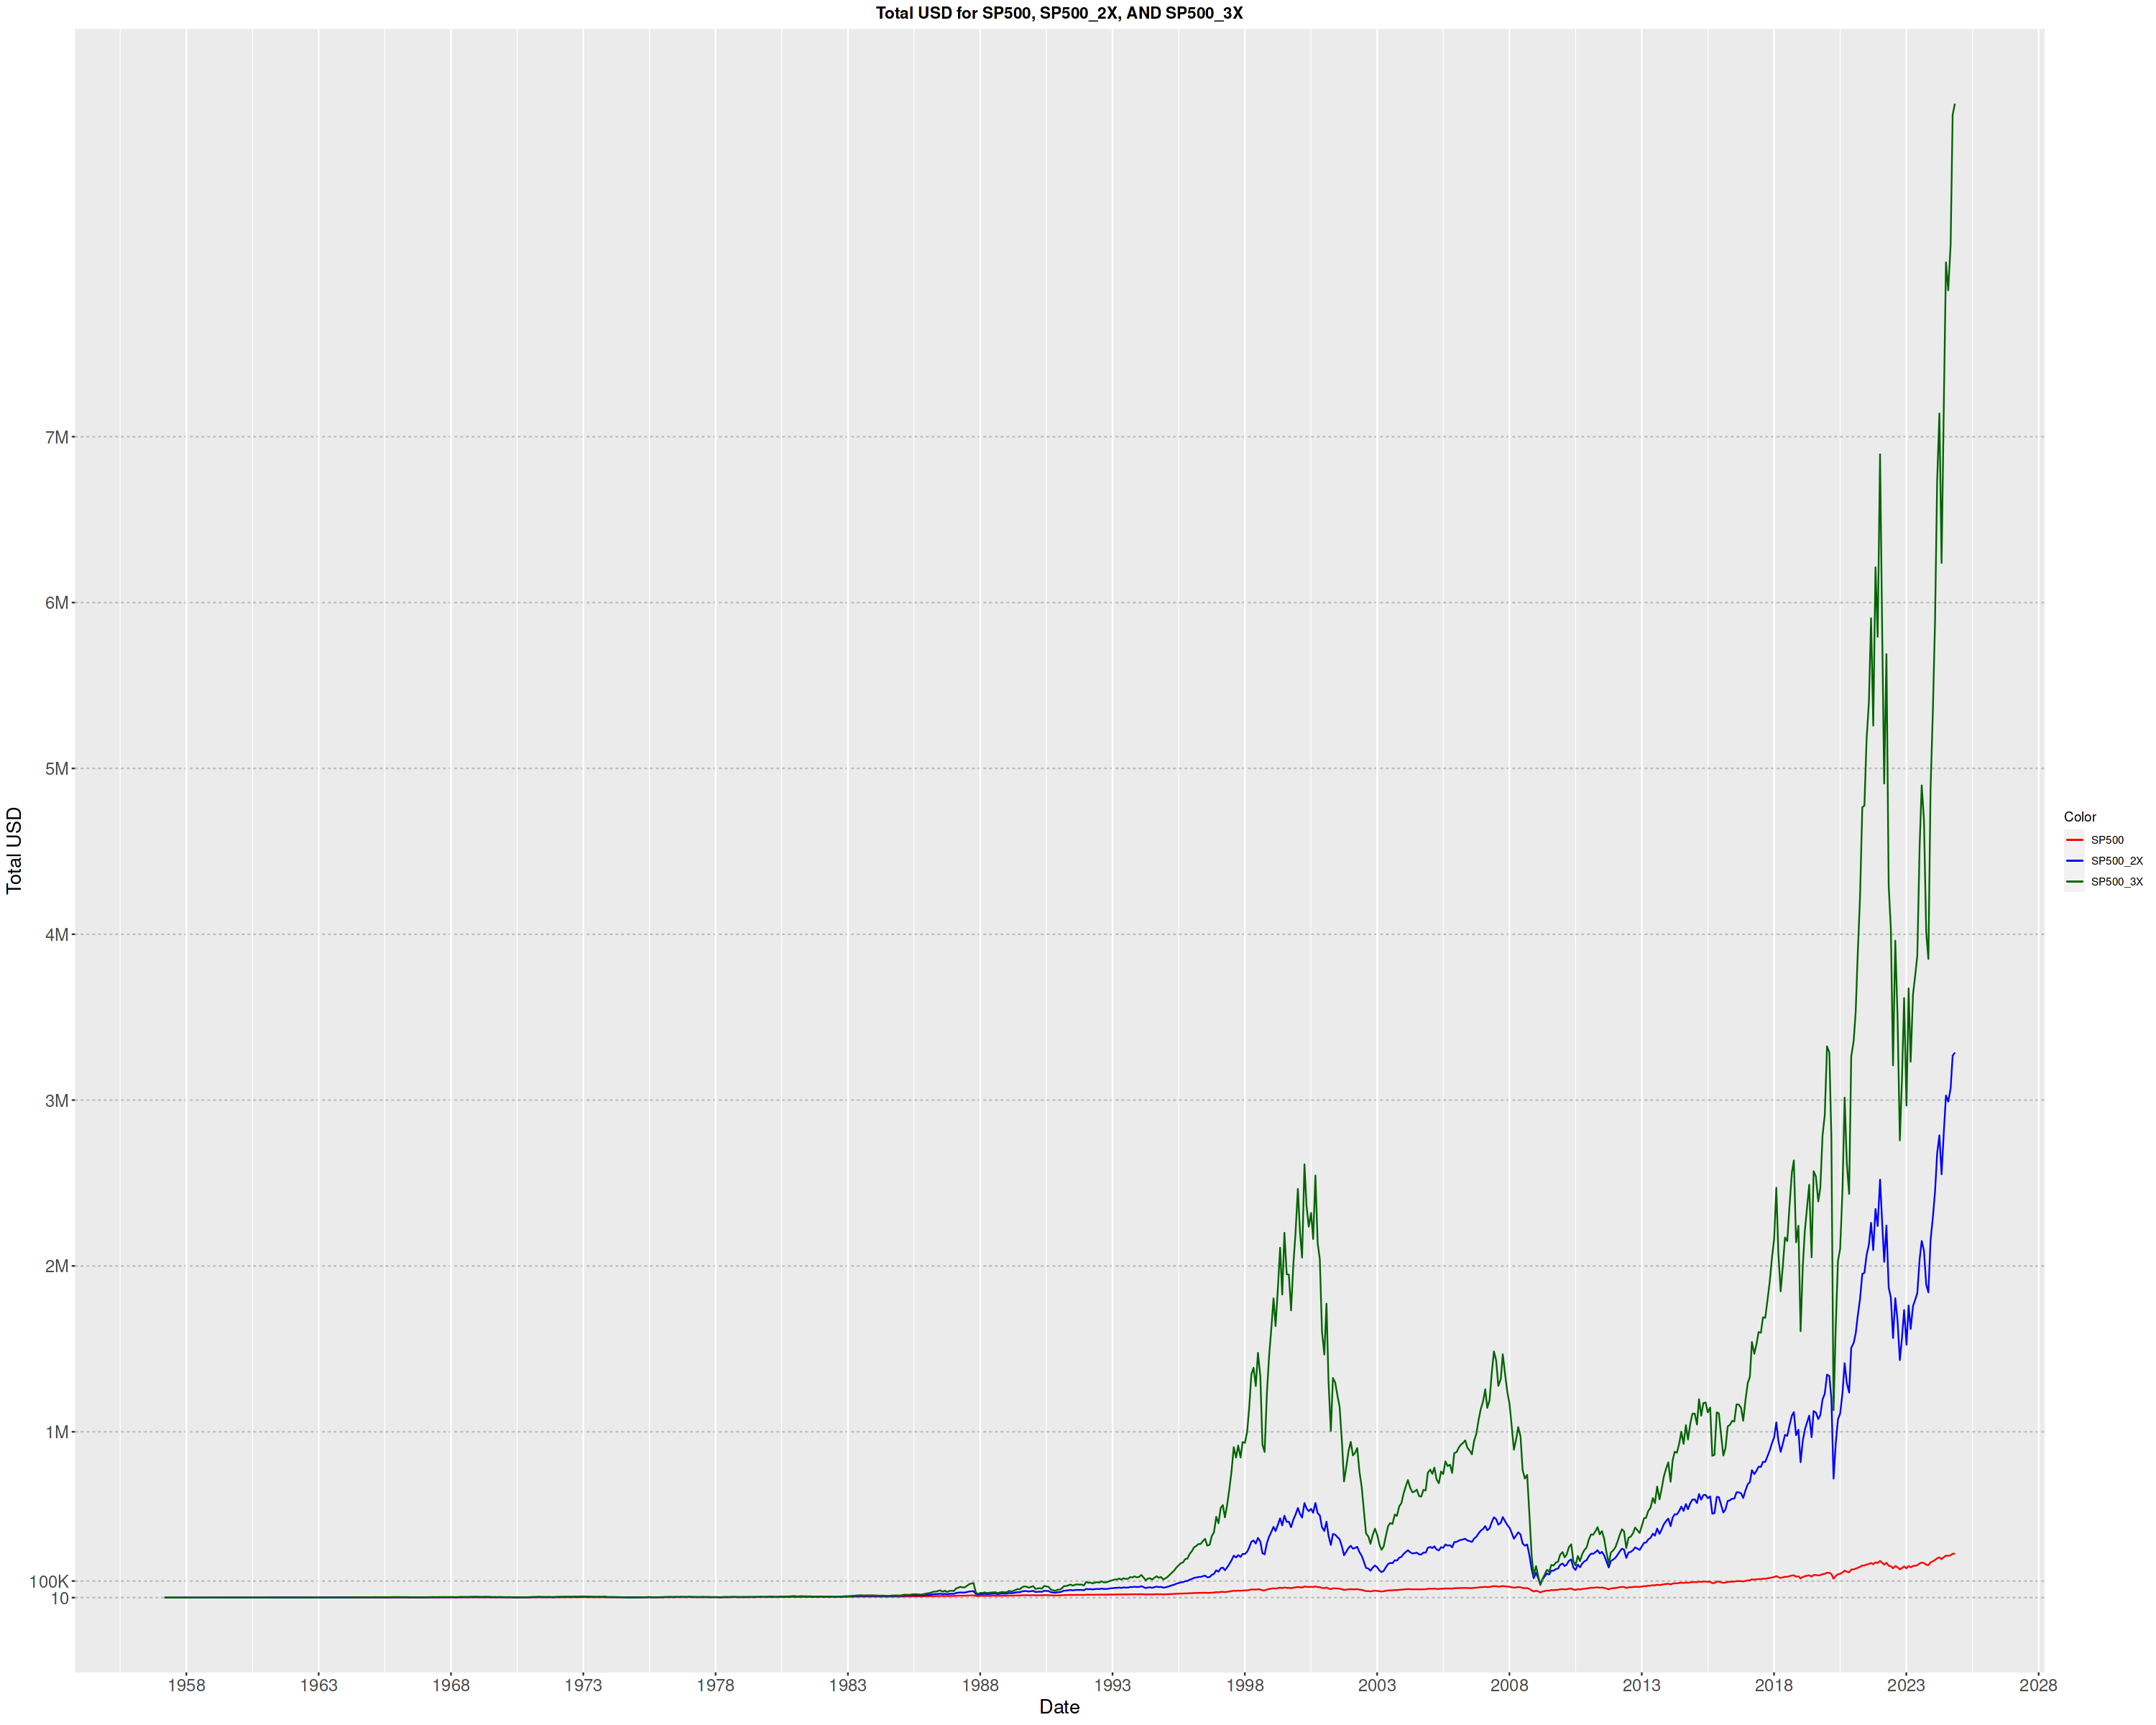

In [122]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_ALL_plot)

As with "Price USD for SP500, SP500_2X, AND SP500_3X" graph, the total<br>
USD value rises exponentially. Therefore, it is best to graph in log<br>
scale. The graph is more readible in log scale.

In [123]:
SP500_ALL_plot_log10 <- ggplot(data = SP500_ALL, aes(x = Date, y = Total_USD_SP500), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_ALL, aes(x = Date, y = Total_USD_SP5002X, color = "SP500_2X"), group = 1) +
  geom_line(data = SP500_ALL, aes(x = Date, y = Total_USD_SP5003X, color = "SP500_3X"), group = 1) +
  scale_y_log10(breaks = c(10, 100, 1000, 10000, 100000, 200000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000),
                labels = c("10", "100", "1K", "10K", "100K", "200K", "1M", "2M", "3M", "4M", "5M", "6M", "7M")) +
  labs(y = "Total USD Log Base 10", x = "Date") +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  scale_color_manual(values = c("SP500" = "red", "SP500_2X" = "blue", "SP500_3X" = "darkgreen"),
                     labels = c("SP500", "SP500_2X", "SP500_3X")) +
  guides(color = guide_legend(title = "Color")) +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_line(color = "gray", linetype = "dashed"),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16)) +
  ggtitle("log10(Total USD) for SP500, SP500_2X, AND SP500_3X")

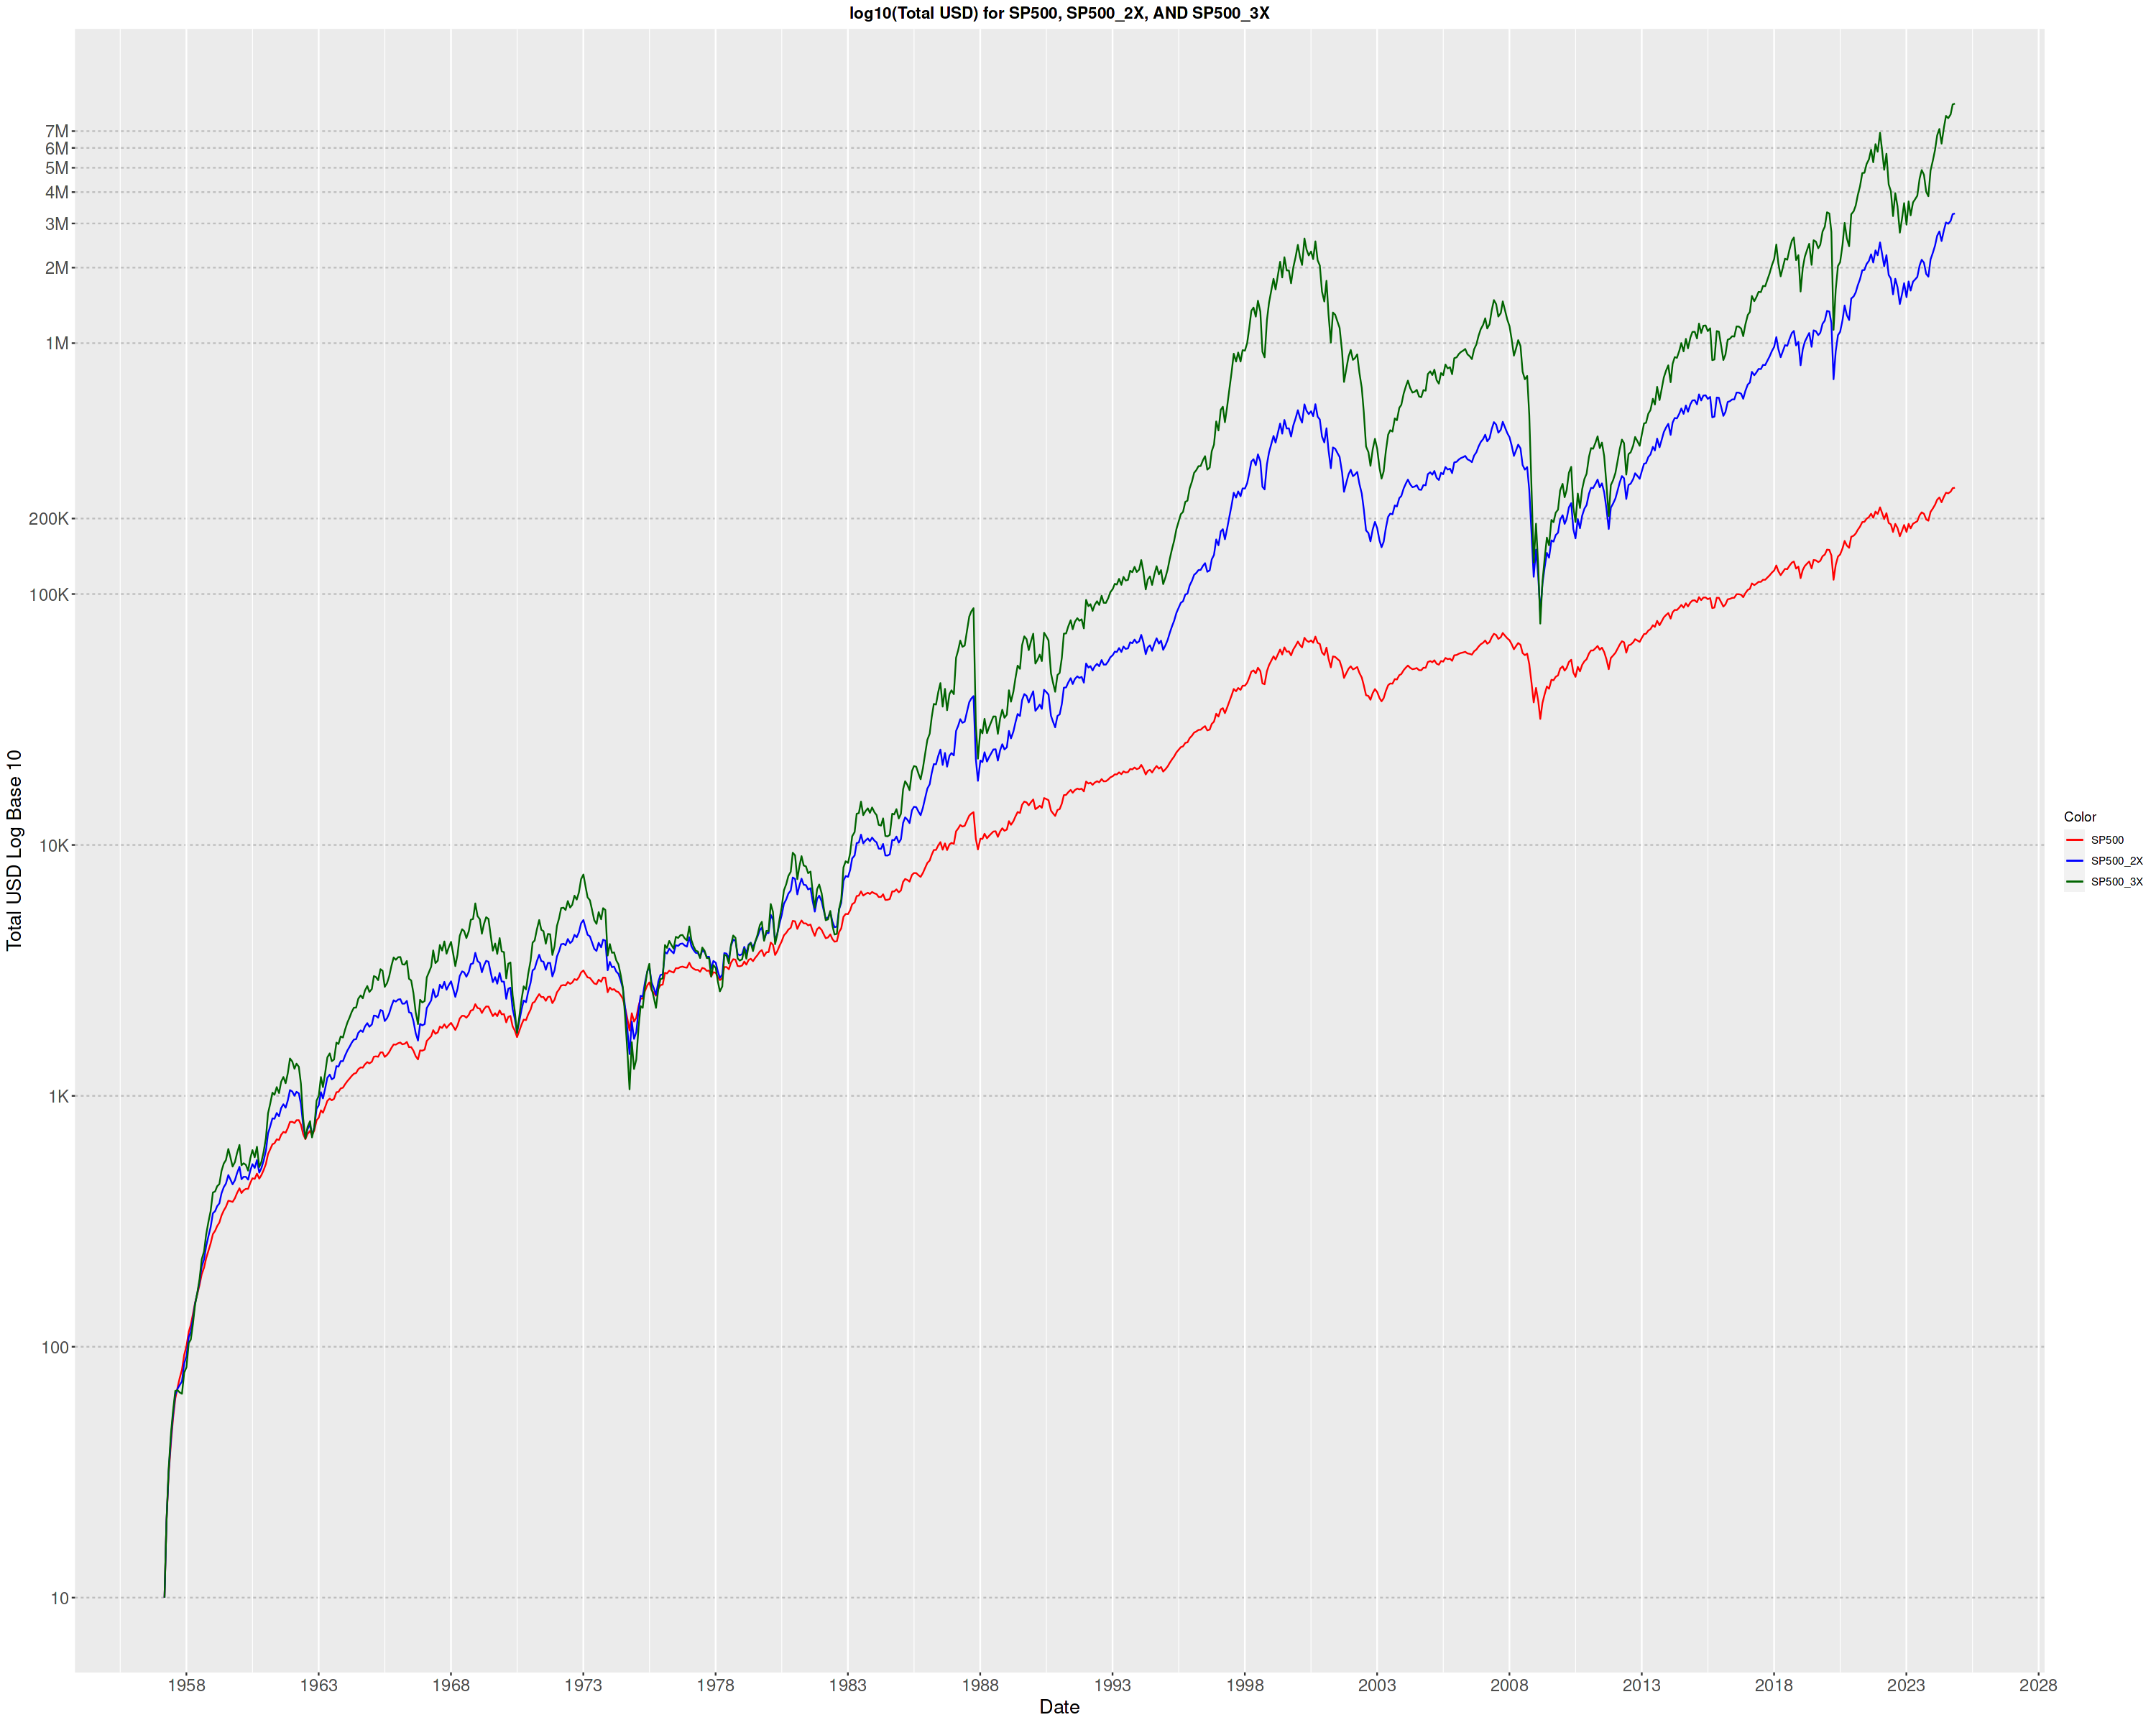

In [124]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_ALL_plot_log10)

## Latest Total USD Value For S&P 500 (1X, 2X, 3X).
### Latest Total USD Value For 1X S&P 500.

In [125]:
#big.mark argument specifies the character to use as the separator for thousands
# Define a function to format numbers with commas
comma_format <- function(x) {
  comma(x, big.mark = ",", decimal.mark = ".", accuracy = 1)
}

In [126]:
#return the date and Total_USD_SP500 value from the last row
Total_USD_SP500_latest <- SP500_ALL[nrow(SP500_ALL), c("Date", "Total_USD_SP500")]
# Format the Total_USD_SP500_latest value with commas and periods
Total_USD_SP500_latest_formatted <- comma_format(Total_USD_SP500_latest$Total_USD_SP500)
# Format the date in the Total_USD_SP500_latest data frame as a string in the format "YYYY-MM-DD"
Total_USD_SP500_latest_date <- format(Total_USD_SP500_latest$Date, "%Y-%m-%d")
# Print the formatted date and Total_USD_SP500_latest value to the console with the desired format
cat("Date Total_USD_SP500\n", Total_USD_SP500_latest_date, " ", Total_USD_SP500_latest_formatted, "\n")

Date Total_USD_SP500
 2024-11-01   265,158 


### Latest Total USD Value For S&P 500 2X.

In [127]:
#return the date and Total_USD_SP5002X value from the last row
Total_USD_SP5002X_latest <- SP500_ALL[nrow(SP500_ALL), c("Date", "Total_USD_SP5002X")]
# Format the Total_USD_SP5002X_latest value with commas and periods
Total_USD_SP5002X_latest_formatted <- comma_format(Total_USD_SP5002X_latest$Total_USD_SP5002X)
# Format the date in the Total_USD_SP5002X_latest data frame as a string in the format "YYYY-MM-DD"
Total_USD_SP5002X_latest_date <- format(Total_USD_SP5002X_latest$Date, "%Y-%m-%d")
# Print the formatted date and Total_USD_SP5002X_latest value to the console with the desired format
cat("Date Total_USD_SP5002X\n", Total_USD_SP5002X_latest_date, " ", Total_USD_SP5002X_latest_formatted, "\n")

Date Total_USD_SP5002X
 2024-11-01   3,286,771 


### Latest Total USD Value for S&P 500 3X.

In [128]:
#return the date and Total_USD_SP5003X value from the last row
Total_USD_SP5003X_latest <- SP500_ALL[nrow(SP500_ALL), c("Date", "Total_USD_SP5003X")]
# Format the Total_USD_SP5003X_latest value with commas and periods
Total_USD_SP5003X_latest_formatted <- comma_format(Total_USD_SP5003X_latest$Total_USD_SP5003X)
# Format the date in the Total_USD_SP5003X_latest data frame as a string in the format "YYYY-MM-DD"
Total_USD_SP5003X_latest_date <- format(Total_USD_SP5003X_latest$Date, "%Y-%m-%d")
# Print the formatted date and Total_USD_SP5003X_latest value to the console with the desired format
cat("Date Total_USD_SP5003X\n", Total_USD_SP5003X_latest_date, " ", Total_USD_SP5003X_latest_formatted, "\n")

Date Total_USD_SP5003X
 2024-11-01   9,008,161 


## Total Number of Months and Years With Lowest USD Value For Each ETF
Latest leverage ETF's values are higher than the 1X S&P 500's value. But<br>
is it always the case that the leverage ETF's values are higher than the<br>
1X S&P 500's value? Let's find out.

Sum counts the number of months on which SP500 is lowest in USD value for<br>
that month. Returns number of months that SP500 is lowest in USD value<br>

In [129]:
Count_Months_SP500_ALL <- data.frame(
  NumMonths_LowestUSD_SP500 = sum(SP500_ALL$Total_USD_SP500 < SP500_ALL$Total_USD_SP5002X & SP500_ALL$Total_USD_SP500 < SP500_ALL$Total_USD_SP5003X),
  NumMonths_LowestUSD_SP5002X = sum(SP500_ALL$Total_USD_SP5002X < SP500_ALL$Total_USD_SP500 & SP500_ALL$Total_USD_SP5002X < SP500_ALL$Total_USD_SP5003X),
  NumMonths_LowestUSD_SP5003X = sum(SP500_ALL$Total_USD_SP5003X < SP500_ALL$Total_USD_SP500 & SP500_ALL$Total_USD_SP5003X < SP500_ALL$Total_USD_SP5002X)
)

Divide each column in Count_Months_SP500_ALL by 12 to get the number of years.
Returns number of years that SP500 is lowest in USD value for that month.

In [130]:
Count_Years_SP500_ALL <- Count_Months_SP500_ALL / 12

Total number of months in which each ETF had the lowest USD value.

In [131]:
head(Count_Months_SP500_ALL)

,NumMonths_LowestUSD_SP500,NumMonths_LowestUSD_SP5002X,NumMonths_LowestUSD_SP5003X
,<int>,<int>,<int>
1,786,0,26


Total number of years in which each ETF had the lowest USD value.

In [132]:
head(Count_Years_SP500_ALL)

,NumMonths_LowestUSD_SP500,NumMonths_LowestUSD_SP5002X,NumMonths_LowestUSD_SP5003X
,<dbl>,<dbl>,<dbl>
1,65.5,0,2.166667


## Percent of Months and Years With Lowest USD Value For Each ETF

In [133]:
Total_Months_SP500_ALL <- Count_Months_SP500_ALL %>%
  summarise(Count_Months_SP500_ALL$NumMonths_LowestUSD_SP500 + Count_Months_SP500_ALL$NumMonths_LowestUSD_SP5002X + Count_Months_SP500_ALL$NumMonths_LowestUSD_SP5003X)
Percent_months_SP500_lowestUSD <- round((Count_Months_SP500_ALL$NumMonths_LowestUSD_SP500 / Total_Months_SP500_ALL)*100, digits = 2)
Percent_months_SP5002X_lowestUSD <- round((Count_Months_SP500_ALL$NumMonths_LowestUSD_SP5002X / Total_Months_SP500_ALL)*100, digits = 2)
Percent_months_SP5003X_lowestUSD <- round((Count_Months_SP500_ALL$NumMonths_LowestUSD_SP5003X / Total_Months_SP500_ALL)*100, digits = 2)

Percentage time in which 1X S&P 500 ETF had the lowest USD value.

In [134]:
print(Percent_months_SP500_lowestUSD)

  +...
1 96.8


Percentage time in which 2X S&P 500 ETF had the lowest USD value.

In [135]:
print(Percent_months_SP5002X_lowestUSD)

  +...
1    0


Percentage time in which 3X S&P 500 ETF had the lowest USD value.

In [136]:
print(Percent_months_SP5003X_lowestUSD)

  +...
1  3.2


1X S&P 500 ETF had the highest percentage time in which it had the lowest<br>
USD value at 96.73% of the time. 2X S&P 500 ETF had the lowest percentage<br>
time in which it had the lowest USD value at 0.00% of the time. 3X S&P<br>
500 ETF had the second highest percentage time in which it had the lowest<br>
USD value at 3.27% of the time.<br>

## Calculate Beta for 2X S&P 500 and 3X S&P 500.
Beta is a measure of a stock's volatility in relation to the overall<br>
market. It is used to determine the risk of a stock or portfolio in<br>
relation to the market as a whole. A beta of 1 indicates that the stock's<br>
price will be just as volatile as the market, while a beta greater than 1<br>
indicates that the stock is more volatile than the market, and a beta<br>
less than 1 indicates that the stock is less volatile than the market.<br>
Note that ETF's are not stocks, but they are traded like stocks. Beta<br>
can be applied just as well to ETF's as it can to stocks.<br>

Select the Date and SP500_DailyPercent for Beta calculation.<br>

In [137]:
SP500_USD_Beta_Select <- Lev_Percent_df %>%
  select(Date, SP500_DailyPercent)

SSO_USD_Beta_Select <- Lev_Percent_df %>% 
  select(Date, SP500_2X_DailyPercent)

UPRO_USD_Beta_Select <- Lev_Percent_df %>% 
  select(Date, SP500_3X_DailyPercent)

Create a new variable with the converted date values

In [138]:
SP500_date_covert <- as.POSIXct(SP500_USD_Beta_Select$Date)
SSO_date_covert <- as.POSIXct(SSO_USD_Beta_Select$Date)
UPRO_date_covert <- as.POSIXct(UPRO_USD_Beta_Select$Date)

Convert SP500_data_clean to xts using the new date variable.

In [139]:
SP500_xts <- xts(SP500_USD_Beta_Select$SP500_DailyPercent, order.by = SP500_date_covert)
SSO_xts <- xts(SSO_USD_Beta_Select$SP500_2X_DailyPercent, order.by = SSO_date_covert)
UPRO_xts <- xts(UPRO_USD_Beta_Select$SP500_3X_DailyPercent, order.by = UPRO_date_covert)

Calculate beta using the CAPM.beta().

In [140]:
Beta_SSO <- round(CAPM.beta(SSO_xts, SP500_xts),2)
Beta_UPRO <- round(CAPM.beta(UPRO_xts, SP500_xts),2)

Beta_SSO and Beta_UPRO

In [141]:
Beta_SSO_UPRO <- data.frame(Beta_SSO, Beta_UPRO)

In [142]:
print(Beta_SSO_UPRO)

  Beta_SSO Beta_UPRO
1     1.97      2.97


Suprisingly, but at the same time not suprisingly. Beta for SSO is 1.97<br>
and Beta for UPRO is 2.97. Which is the same as the median leverage for<br>
SSO and UPRO. This means that leverage is the same as the beta. Thus, 2X<br>
S&P 500 ETF is about twice as volatile as the 1X S&P 500 and 3X S&P 500<br>
ETF is about three times as volatile as the 1X S&P 500.<br>

## Neural Network (2x Leverage)
S&P500 price from 6/22/2006 onwards<br>

In [143]:
SP500_Price_Neural_Clean <-SP500_data_clean %>%
  filter(Date >= as.Date("2006-06-22", format = "%Y-%m-%d")) %>%
  select(SP500_Closing_Price)

S&P500 percent change from 6/22/2006 onwards

In [144]:
SP500_Percent_Neural_Clean <-SP500_Daily_Percent_Change_SSOdf %>%
  select(Daily_Percent_Change)

SSO leverage from 6/22/2006 onwards

In [145]:
head(SSOLev)

,SSO_Leverage
,<dbl>
1,2.0166946
2,0.1599896
3,1.1904031
4,1.9497527
5,1.6168513
6,1.9666733


Combine into a new data frame

In [146]:
SP500Price_SP500Percent_SSOLev <-cbind(SP500_Price_Neural_Clean, SP500_Percent_Neural_Clean, SSOLev)

Neural Network input data

In [147]:
Neural_Network_Input <-SP500Price_SP500Percent_SSOLev %>% 
  rename(x_1 = SP500_Closing_Price, x_2 = Daily_Percent_Change, y = SSO_Leverage)

Observations for unscaled Neural Network Input.

In [148]:
X_Input_Neurons <-Neural_Network_Input %>% 
  select(x_1, x_2)

Y_Output_Neurons <-Neural_Network_Input %>% 
  select(y)

Scale Neural_Network_Input to feed into Neural Network by using<br>
generalized min-max normalization. x_1, x_2, and y columns of the<br>
Neural_Network_Input data frame to be between lower and  upper bounds<br>
rescale = lower_bound + ( ((i - i_min)*(upper_bound - lower_bound)) / range of i),<br>
 where i is x_1, x_2, or y<br>

In [149]:
N_lower_bound <-0
N_upper_bound <-1
Neural_Network_Input_Scaled <-Neural_Network_Input %>%
  mutate(x_1 = N_lower_bound + ( ((x_1 - min(x_1))*(N_upper_bound - N_lower_bound)) / (max(x_1) - min(x_1))),
         x_2 = N_lower_bound + ( ((x_2 - min(x_2))*(N_upper_bound - N_lower_bound)) / (max(x_2) - min(x_2))),
         y = N_lower_bound + ( ((y - min(y))*(N_upper_bound - N_lower_bound)) / (max(y) - min(y))))

Observations for scaled Neural Network Input

In [150]:
X_Input_Neurons_Scaled <-Neural_Network_Input_Scaled %>% 
  select(x_1, x_2)

Y_Output_Neurons_Scaled <-Neural_Network_Input_Scaled %>%
  select(y)

yi is the output variable y for (x_1, x_2, y)

In [151]:
yi <-t(as.matrix(Y_Output_Neurons_Scaled))

size of yi

In [152]:
print(paste("yi size:", nrow(yi), "x", ncol(yi)))

[1] "yi size: 1 x 4634"


## Parameters for Gradient Descent (2x Leverage)
Number of observations per iteration

In [153]:
n <-nrow(Neural_Network_Input)

Total number of observations

In [154]:
Tb <-nrow(Neural_Network_Input)

In [155]:
print(Tb)

[1] 4634


Number of batches. Note the number of batches must be a positive whole<br>
number, thus the number of observations must be divisible by the number<br>
of observations per iteration.

In [156]:
Number_Batches <-Tb/n

Check if the number of batches is a positive whole number.

In [157]:
if (Number_Batches %% 1 == 0) {
  print("Number of batches is a positive whole number")
  print(paste("Number of Batches=", Number_Batches))
} else {
  print("Number of batches is not a positive whole number")
  print(paste("Number of Batches=", Number_Batches))
}

[1] "Number of batches is a positive whole number"
[1] "Number of Batches= 1"


Set the number of input neurons to the number of columns in the input<br>
data (x_1, x_2), not including the output column (y)<br>

In [158]:
Num_input_neurons <- ncol(Neural_Network_Input) - 1

Add 1 to the number of inputs to account for the bias.

In [159]:
Num_input_neurons_Plus_Bias <-Num_input_neurons + 1

Number of hidden layers

In [160]:
Number_Hidden_Layers <-2

Size of input layer

In [161]:
Size_input_layer <-n

Size of output layer, which is 1 for a regression problem with one output

In [162]:
Size_output_layer <-1

Number of neurons in the 1st hidden layer.

In [163]:
Number_Neurons_Hidden_Layer_1 <-1

In [164]:
print(paste("Number of neurons in the 1st hidden layer=", Number_Neurons_Hidden_Layer_1))

[1] "Number of neurons in the 1st hidden layer= 1"


Number of neurons in the 2nd hidden layer

In [165]:
Number_Neurons_Hidden_Layer_2 <-Number_Neurons_Hidden_Layer_1

In [166]:
print(paste("Number of neurons in the 2nd hidden layer=", Number_Neurons_Hidden_Layer_2))

[1] "Number of neurons in the 2nd hidden layer= 1"


**Size of matrices**

Size of matrix M1

In [167]:
M1_m_rows <-Number_Neurons_Hidden_Layer_1
M1_n_col <-Num_input_neurons_Plus_Bias

Size of matrix X1

In [168]:
X1_m_rows <-Num_input_neurons_Plus_Bias
X1_n_col <-n

Size of matrix Z2

In [169]:
Z2_m_rows <-M1_m_rows
Z2_n_col <-X1_n_col

Size of LeakyReLU1

In [170]:
LeakyReLU1_m_rows <-Z2_m_rows
LeakyReLU1_n_col <-Z2_n_col

Size of matrix M2

In [171]:
M2_m_rows <-Number_Neurons_Hidden_Layer_2
M2_n_col <-LeakyReLU1_m_rows + 1

Size of matrix X2<br>
Add 1 to the number of rows of LeakyReLU1 to account for the bias.<br>

In [172]:
X2_m_rows <-LeakyReLU1_m_rows + 1
X2_n_col <-LeakyReLU1_n_col

Size of matrix Z3

In [173]:
Z3_m_rows <-M2_m_rows
Z3_n_col <-X2_n_col

Size of LeakyReLU2

In [174]:
LeakyReLU2_m_rows <-Z3_m_rows
LeakyReLU2_n_col <-Z3_n_col

Size of matrix M3

In [175]:
M3_m_rows <-Size_output_layer
M3_n_col <-LeakyReLU2_m_rows + 1

Size of matrix X3<br>
Add 1 to the number of rows of LeakyReLU2 to account for the bias.<br>

In [176]:
X3_m_rows <-LeakyReLU2_m_rows + 1
X3_n_col <-LeakyReLU2_n_col

Size of matrix Z4

In [177]:
Z4_m_rows <-M3_m_rows
Z4_n_col <-X3_n_col

Size of matrix X4

In [178]:
X4_m_rows <-Z4_m_rows
X4_n_col <-Z4_n_col

In [179]:
print(paste("Size of matrix M1=", M1_m_rows, "x", M1_n_col))
print(paste("Size of matrix X1=", X1_m_rows, "x", X1_n_col))
print(paste("Size of matrix Z2=", Z2_m_rows, "x", Z2_n_col))
print(paste("Size of matrix LeakyReLU1=", LeakyReLU1_m_rows, "x", LeakyReLU1_n_col))
print(paste("Size of matrix X2=", X2_m_rows, "x", X2_n_col))
print(paste("Size of matrix M2=", M2_m_rows, "x", M2_n_col))
print(paste("Size of matrix Z3=", Z3_m_rows, "x", Z3_n_col))
print(paste("Size of matrix LeakyReLU2=", LeakyReLU2_m_rows, "x", LeakyReLU2_n_col))
print(paste("Size of matrix X3=", X3_m_rows, "x", X3_n_col))
print(paste("Size of matrix M3=", M3_m_rows, "x", M3_n_col))
print(paste("Size of matrix Z4=", Z4_m_rows, "x", Z4_n_col))
print(paste("Size of matrix X4=", X4_m_rows, "x", X4_n_col))

[1] "Size of matrix M1= 1 x 3"
[1] "Size of matrix X1= 3 x 4634"
[1] "Size of matrix Z2= 1 x 4634"
[1] "Size of matrix LeakyReLU1= 1 x 4634"
[1] "Size of matrix X2= 2 x 4634"
[1] "Size of matrix M2= 1 x 2"
[1] "Size of matrix Z3= 1 x 4634"
[1] "Size of matrix LeakyReLU2= 1 x 4634"
[1] "Size of matrix X3= 2 x 4634"
[1] "Size of matrix M3= 1 x 2"
[1] "Size of matrix Z4= 1 x 4634"
[1] "Size of matrix X4= 1 x 4634"


LeakyReLU hyperpameter

In [180]:
LeakyReLU_alpha <-0.1

## Neural network: Loop from 1 to Epochs. Used a variable learning rate.(2x Leverage)

In [181]:
Epochs <-13500
Alpha_ONE <-0.0000001

Set seed is used to make sure that the same random numbers are generated<br>
each time the code is run.<br>

In [182]:
set.seed(123)

Weight matrices M1, M2, M3

In [183]:
M1 <-matrix(rnorm(M1_m_rows * M1_n_col, mean = 0, sd = 1), nrow = M1_m_rows, ncol = M1_n_col)
M2 <-matrix(rnorm(M2_m_rows * M2_n_col, mean = 0, sd = 1), nrow = M2_m_rows, ncol = M2_n_col)
M3 <-matrix(rnorm(M3_m_rows * M3_n_col, mean = 0, sd = 1), nrow = M3_m_rows, ncol = M3_n_col)

Median is used to avoid the effect of outliers. Create an empty dataframe<br>
to store the median squared error for each epoch.<br>

In [184]:
Median_Squared_Error <-data.frame(epoch = numeric(Epochs), mse_x4 = numeric(Epochs), mse_sso = numeric(Epochs))

Create a list to store X4 matrix for each epoch.

In [185]:
X4_list <-vector("list", Epochs)

Create a list to store M1 matrix for each epoch.

In [186]:
M1_list <-vector("list", Epochs)

Create a list to store M2 matrix for each epoch.

In [187]:
M2_list <-vector("list", Epochs)

Create a list to store M3 matrix for each epoch.

In [188]:
M3_list <-vector("list", Epochs)

## Parameters for Median Squared Error for SSO Price

Calculate the range of the original data.

In [189]:
range_i <-max(Y_Output_Neurons) - min(Y_Output_Neurons)

Matrix for S&P500 percent change from 6/22/2006 onwards.

In [190]:
SP500_Percent_Neural_Clean_Matrix <-as.matrix(SP500_Percent_Neural_Clean)

SSO date and price from 6/21/2006 onwards.

In [191]:
SSO_Date_Closing_Price <-SSO_data_clean %>%
  select(Date, SSO_Closing_Price)

Extract the first day price of SSO, 1st day is 6/21/2006.

In [192]:
first_day_price_SSO <-SSO_Date_Closing_Price$SSO_Closing_Price[1]

SSO Price

In [193]:
SSO_Price <-SSO_data_clean %>%
  select(SSO_Closing_Price)  %>% 
  as.matrix()

## Loop For Neural network (2x Leverage)
Neural network uses 1 neuron in each hidden layer. Neural network has an<br>
input layer, 2 hidden layers and 1 output layer. Even though each hidden<br>
layer only uses 1 neuron, the code is generalized to use more than 1<br> 
neuron in each hidden layer. Median squared error for SSO Price is used<br> 
as validation for the neural network. Use a pseudo early stopping technique,<br>
it is not really early stopping because the neural network is not actually<br>
stopped. But rather neural network is overfitted to the training data.<br> 
All the weights for every epoch is stored. The best weight matrices are<br>
selected based on the best median squared error for SSO Price.<br>

SSO Neural Network Training Loop<br>

In [194]:
for (epoch in 1:Epochs) {
  ###############################################
  # Code for forward pass
  ###############################################
X1 <-t(as.matrix(cbind(X_Input_Neurons_Scaled, x_3 = 1)))

Z2 <-M1 %*% X1

LeakyReLU1 <- t(apply(Z2, 1, function(x) ifelse(x >= 0, x, LeakyReLU_alpha * x))) %>% 
  as.matrix()

X2 <-rbind(LeakyReLU1, 1)  %>% 
  as.matrix()

Z3 <-M2 %*% X2

LeakyReLU2 <- t(apply(Z3, 1, function(x) ifelse(x >= 0, x, LeakyReLU_alpha * x))) %>% 
  as.matrix()

X3 <-rbind(LeakyReLU2, 1) %>% 
  as.matrix()

Z4 <-M3 %*% X3

X4 <-Z4 %>% 
  as.matrix()

  #Store X4 for each epoch
X4_list[[epoch]] <-X4
  ###############################################
  # Code for backpropagation
  ###############################################
DC_DX4 <--2*(yi - X4)  %>% 
  as.matrix()

DZ4_DM3 <-t(X3)

DC_DM3 <-DC_DX4 %*% DZ4_DM3

DC_DX4_2nd_Hidden_Layer <-matrix(0, nrow = Z3_m_rows, ncol = ncol(DC_DX4))
for (i in 1:(Z3_m_rows)) {
  DC_DX4_2nd_Hidden_Layer[i,] <-DC_DX4
}

M3_Transpose_MinusBias <-t(M3)  %>% 
  head(-1)

DZ4_DX3 <-matrix(0, nrow = Z3_m_rows, ncol = ncol(DC_DX4))

for (i in seq_len(ncol(DC_DX4))) {
  DZ4_DX3[,i] <-M3_Transpose_MinusBias
}

DX3_DZ3_element_wise <-t(apply(X3, 1, function(x) ifelse(x >= 0, 1, LeakyReLU_alpha))) %>%
  as.matrix()

if (Number_Neurons_Hidden_Layer_1>1) {
DX3_DZ3 <-DX3_DZ3_element_wise[-nrow(DX3_DZ3_element_wise),]  %>% 
  as.matrix()
} else {
DX3_DZ3 <-t(DX3_DZ3_element_wise[-nrow(DX3_DZ3_element_wise),]) %>% as.matrix()
}

DZ3_DM2 <-t(X2)

DC_DZ3 <-((DC_DX4_2nd_Hidden_Layer * DZ4_DX3) * DX3_DZ3)

DC_DM2 <-DC_DZ3 %*% DZ3_DM2

DZ3_DX2 <-M2[,-ncol(M2)] %>% 
  as.matrix()

DX2_DZ2_element_wise <-t(apply(X2, 1, function(x) ifelse(x >= 0, 1, LeakyReLU_alpha))) %>%
  as.matrix()

if (Number_Neurons_Hidden_Layer_1>1) {
DX2_DZ2 <-DX2_DZ2_element_wise[-nrow(DX2_DZ2_element_wise),]  %>% 
  as.matrix()
} else {
DX2_DZ2 <-t(DX2_DZ2_element_wise[-nrow(DX2_DZ2_element_wise),])  %>% 
  as.matrix()
}

DZ2_DM1 <-t(X1)

DC_DM1 <-(DC_DZ3 * (DZ3_DX2 %*% DX2_DZ2)) %*% DZ2_DM1
  ###############################################
  #Update weights and biases (based on backpropagation)
  #Used a variable learning rate for each epoch
  ###############################################
  #variable learning rate (1/x) helps to converge faster
for (i in 1:Epochs){
  # Update the learning rate for each epoch
Learning_Rate <-Alpha_ONE * (1/i)

M3 <-M3 - (Learning_Rate * DC_DM3)
M2 <-M2 - (Learning_Rate * DC_DM2)
M1 <-M1 - (Learning_Rate * DC_DM1)
}

  #Store M3 for each epoch
M3_list[[epoch]] <-M3
  #Store M2 for each epoch
M2_list[[epoch]] <-M2
  #Store M1 for each epoch
M1_list[[epoch]] <-M1
  ###############################################
  # Compute median squared error and store it in the Median_Squared_Error matrix
  ###############################################
  #Calculates the median squared error for output X4, for each epoch
MedSE_Epoch <-median((yi - X4)^2)
  #Stores epoch number for each epoch
Median_Squared_Error$epoch[epoch] <-epoch
  #Stores median squared error X4 for each epoch
Median_Squared_Error$mse_x4[epoch] <-MedSE_Epoch
  ###############################################
  # Compute median squared error for SSO Price and store it in the Median_Squared_Error matrix
  ###############################################
  #unscale = (([Rs - lower_bound] * [range of i])/[upper_bound - lower_bound]) + min(i), where i is x_1, x_2, or y
  #Rs = rescaled
  # X4 is the output of the neural network, which is the predicted SSO leverage
  # X4 is scaled, thus we need to unscale it to get the predicted SSO leverage
X4_unscaled_SSO <-(((X4 - N_lower_bound)*(range_i))/(N_upper_bound - N_lower_bound)) + min(Y_Output_Neurons)

  #Predicted SSO leverage
Lev_Predicted_SSO <-t(X4_unscaled_SSO)

  #predicted SSO Percentage change from 6/22/2006 onwards
  #We have the percentage change for S&P500 and the predicted SSO leverage
  #Thus to find the predicted SSO percentage change, we need to multiply the percentage change for S&P500 and the predicted SSO leverage
SSO_PredPerChange_6_22_2006_Onwards <-SP500_Percent_Neural_Clean_Matrix * Lev_Predicted_SSO %>%
  as.data.frame() %>%
  setNames("Percent_Change")

  #calculates predicted percentage change for SSO
  #Next day price = (first day price) * (100 + predicted SSO percentage change) / 100
SSO_Closing_Price_Pred_df <-data.frame(SSO_Closing_Price_Pred = Reduce(function(x, y) x * (100 + y) / 100, SSO_PredPerChange_6_22_2006_Onwards$Percent_Change, accumulate = TRUE, init = first_day_price_SSO))

SSO_Price_Prediction <-SSO_Closing_Price_Pred_df %>%
  as.matrix()

  #Calculates the median squared error for SSO Price, for each epoch
MedSE_SSO_Price <-median((SSO_Price - SSO_Price_Prediction)^2)
  #Stores median squared error for each epoch
Median_Squared_Error$mse_sso[epoch] <-MedSE_SSO_Price

  #Comment out #cat() will make results not being printed out on console                                                                        
  #cat("Epoch:", epoch, "Median Squared Error X4:", MedSE_Epoch, "Median Squared Error SSO Price:", MedSE_SSO_Price, "\n")
}

## Plot The Median Squared Error For Each Epoch (2x Leverage)

Filter out infinities<br>

In [195]:
 Median_Sqaured_Error_SSO <-Median_Squared_Error %>%
  filter(mse_sso != Inf)

Number of rows with infinity for mse_sso

In [196]:
rows_with_infinity <-nrow(Median_Squared_Error) - nrow(Median_Sqaured_Error_SSO)

Epoch with lowest median squared error for SSO.<br>
Value of min median squared error for SSO.<br>

In [197]:
Epoch_lowest_error_SSO <-which.min(Median_Sqaured_Error_SSO$mse_sso)+rows_with_infinity
Min_Median_Squared_Error_SSO <-min(Median_Sqaured_Error_SSO$mse_sso)

In [198]:
print(paste("Epoch:", Epoch_lowest_error_SSO))
print(paste("Median Squared Error SSO Price:", Min_Median_Squared_Error_SSO))

[1] "Epoch: 13500"
[1] "Median Squared Error SSO Price: 4.50229419865043"


Plot the median squared error for X4 for each epoch in log scale

In [199]:
MSE_X4 <- ggplot(data = Median_Squared_Error, aes(x = epoch, y = mse_x4)) +
  geom_line(color = "darkgreen") +
  geom_point(data = subset(Median_Squared_Error, epoch == Epoch_lowest_error_SSO), aes(x = epoch, y = mse_x4), color = "red", size = 4) +
  geom_text(data = subset(Median_Squared_Error, epoch == Epoch_lowest_error_SSO), aes(x = epoch, y = mse_x4, label = "Min_MSE_X4"), vjust = -1) +
  scale_y_log10() +
  labs(x = "Epoch", y = "Median Squared Error X4", title = "Median Squared Error X4") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

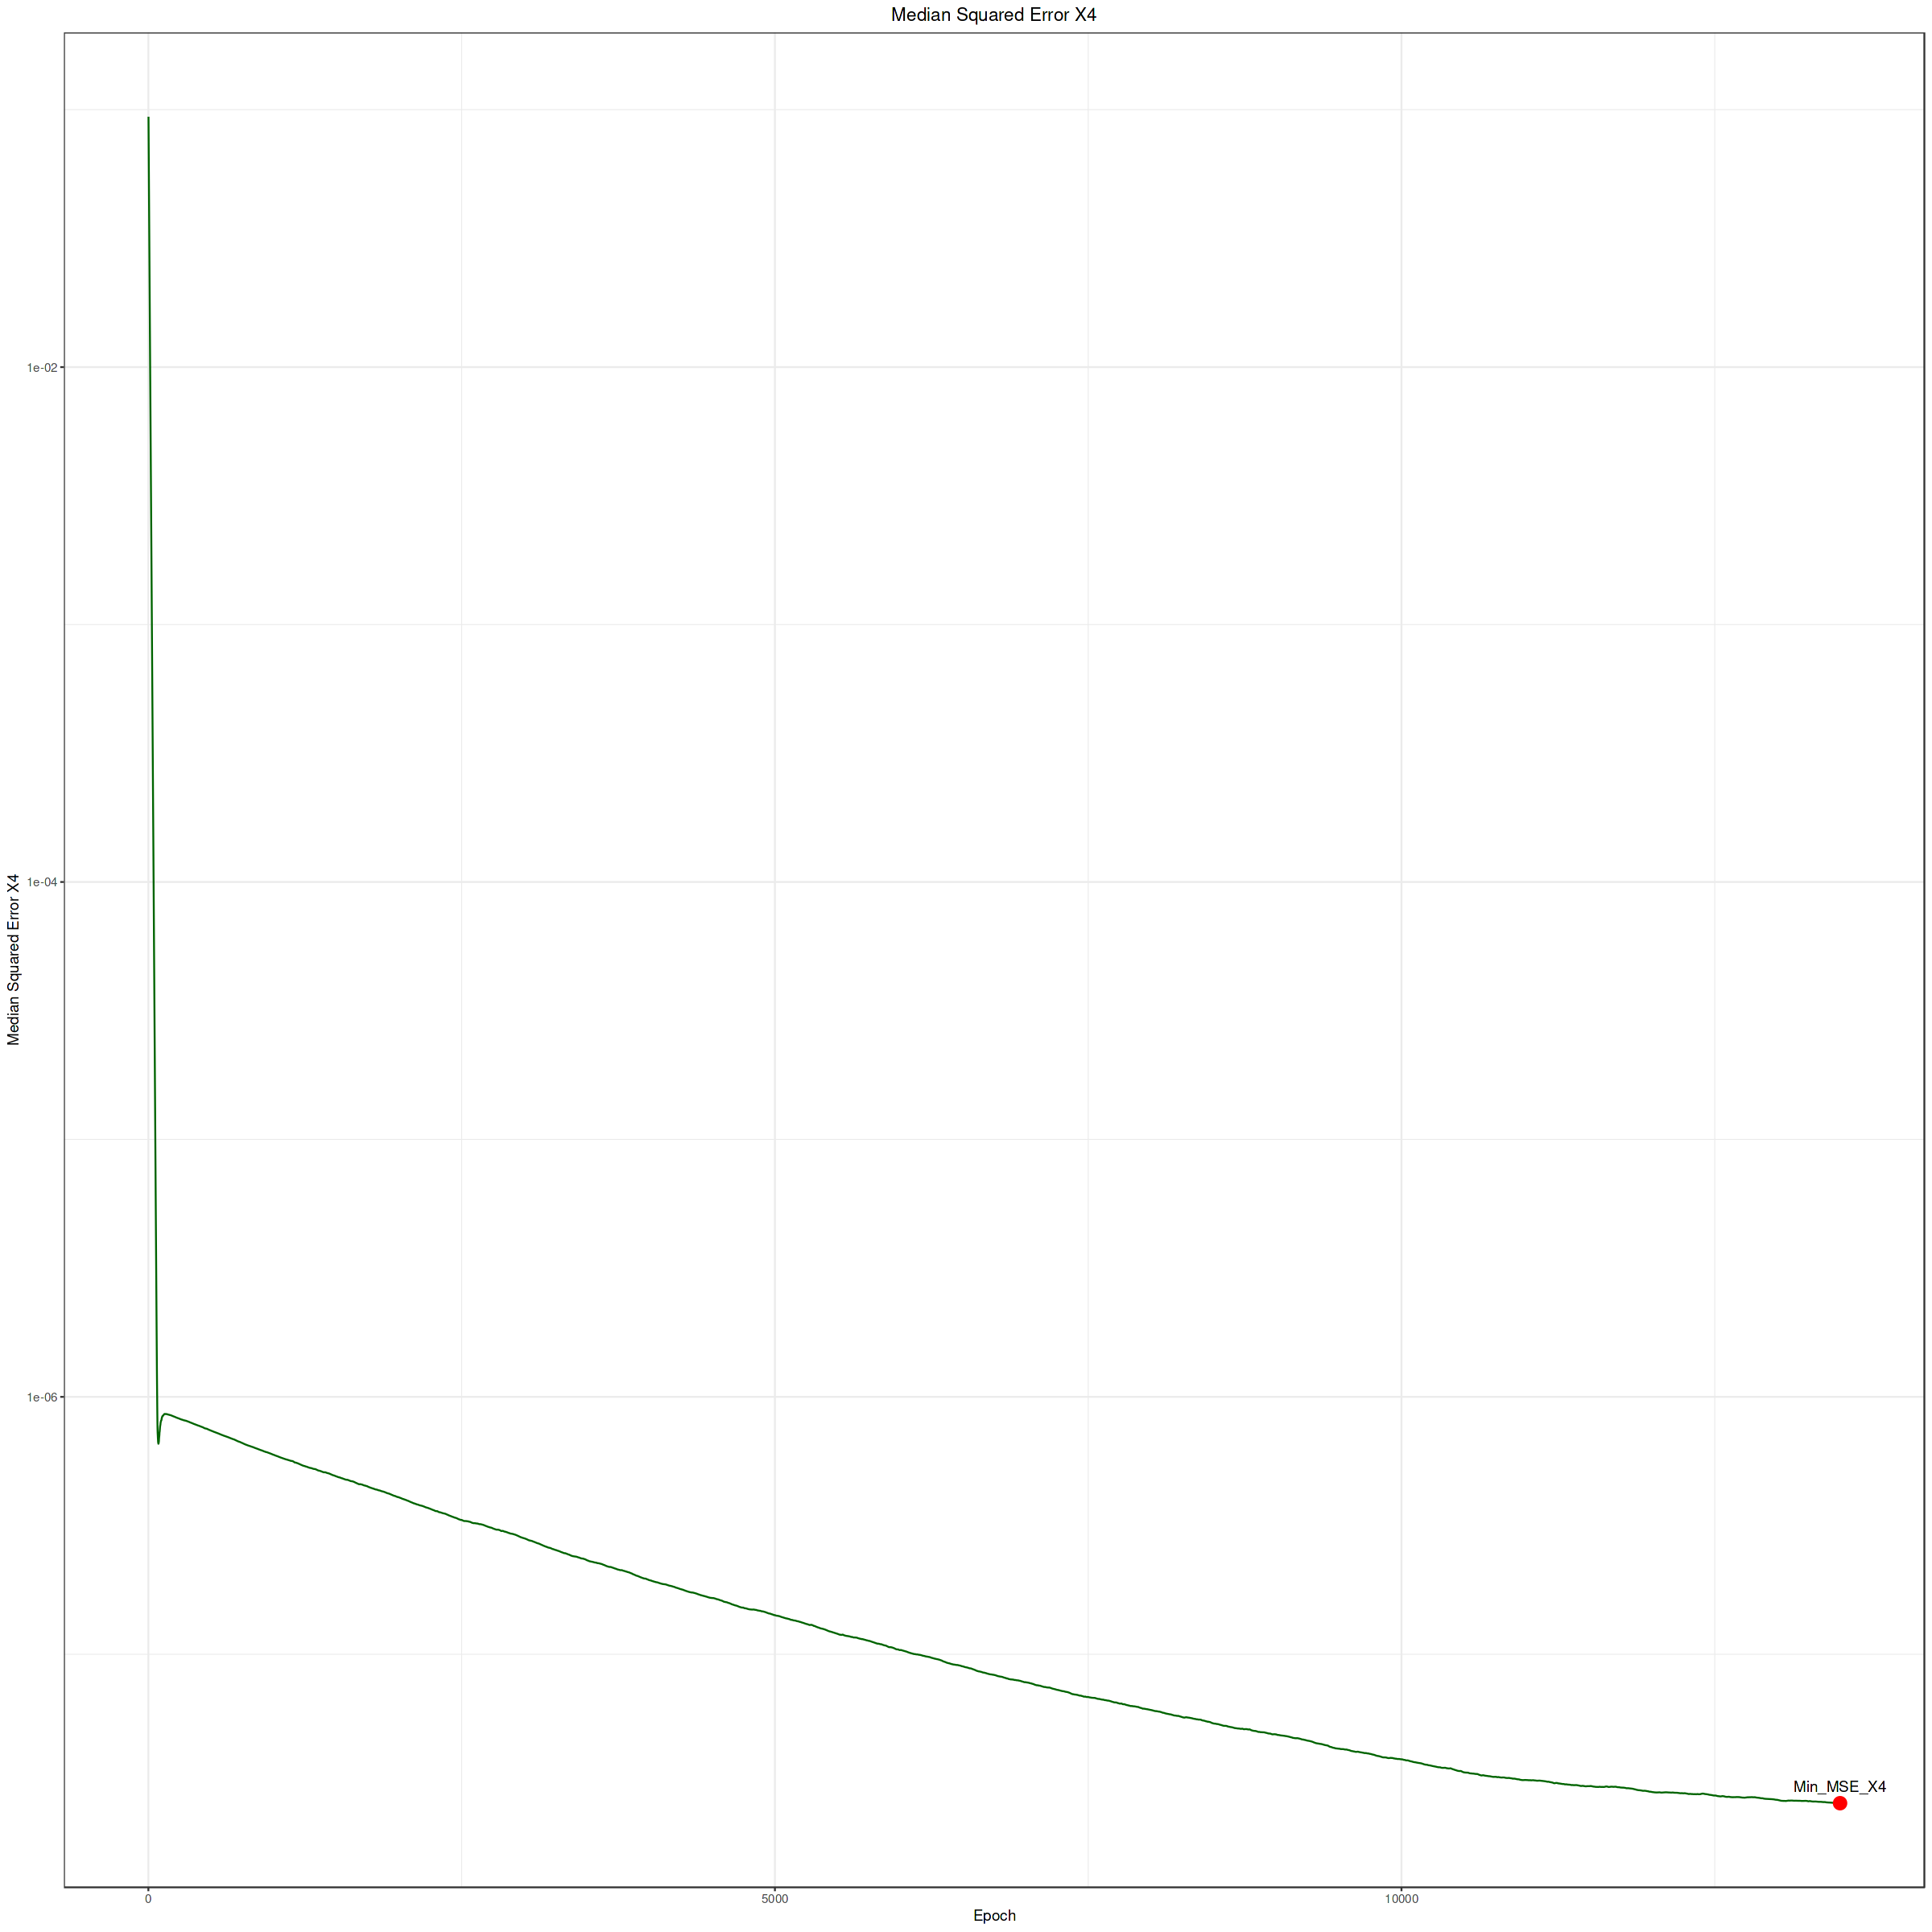

In [200]:
options(repr.plot.width = 20, repr.plot.height = 20)

print(MSE_X4)

Plot the median squared error for SSO Price for each epoch in log scale.

In [201]:
MSE_SSO_Price <-ggplot(data = Median_Squared_Error, aes(x = epoch, y = mse_sso)) +
  geom_line(color = "darkgreen") +
  geom_point(data = subset(Median_Squared_Error, epoch == Epoch_lowest_error_SSO), aes(x = epoch, y = mse_sso), color = "red", size = 4) +
  geom_text(data = subset(Median_Squared_Error, epoch == Epoch_lowest_error_SSO), aes(x = epoch, y = mse_sso, label = "Min_MSE_SSO_Price"), vjust = -1) +
  scale_y_log10() +
  labs(x = "Epoch", y = "Median Squared Error SSO Price", title = "Median Squared Error SSO Price") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

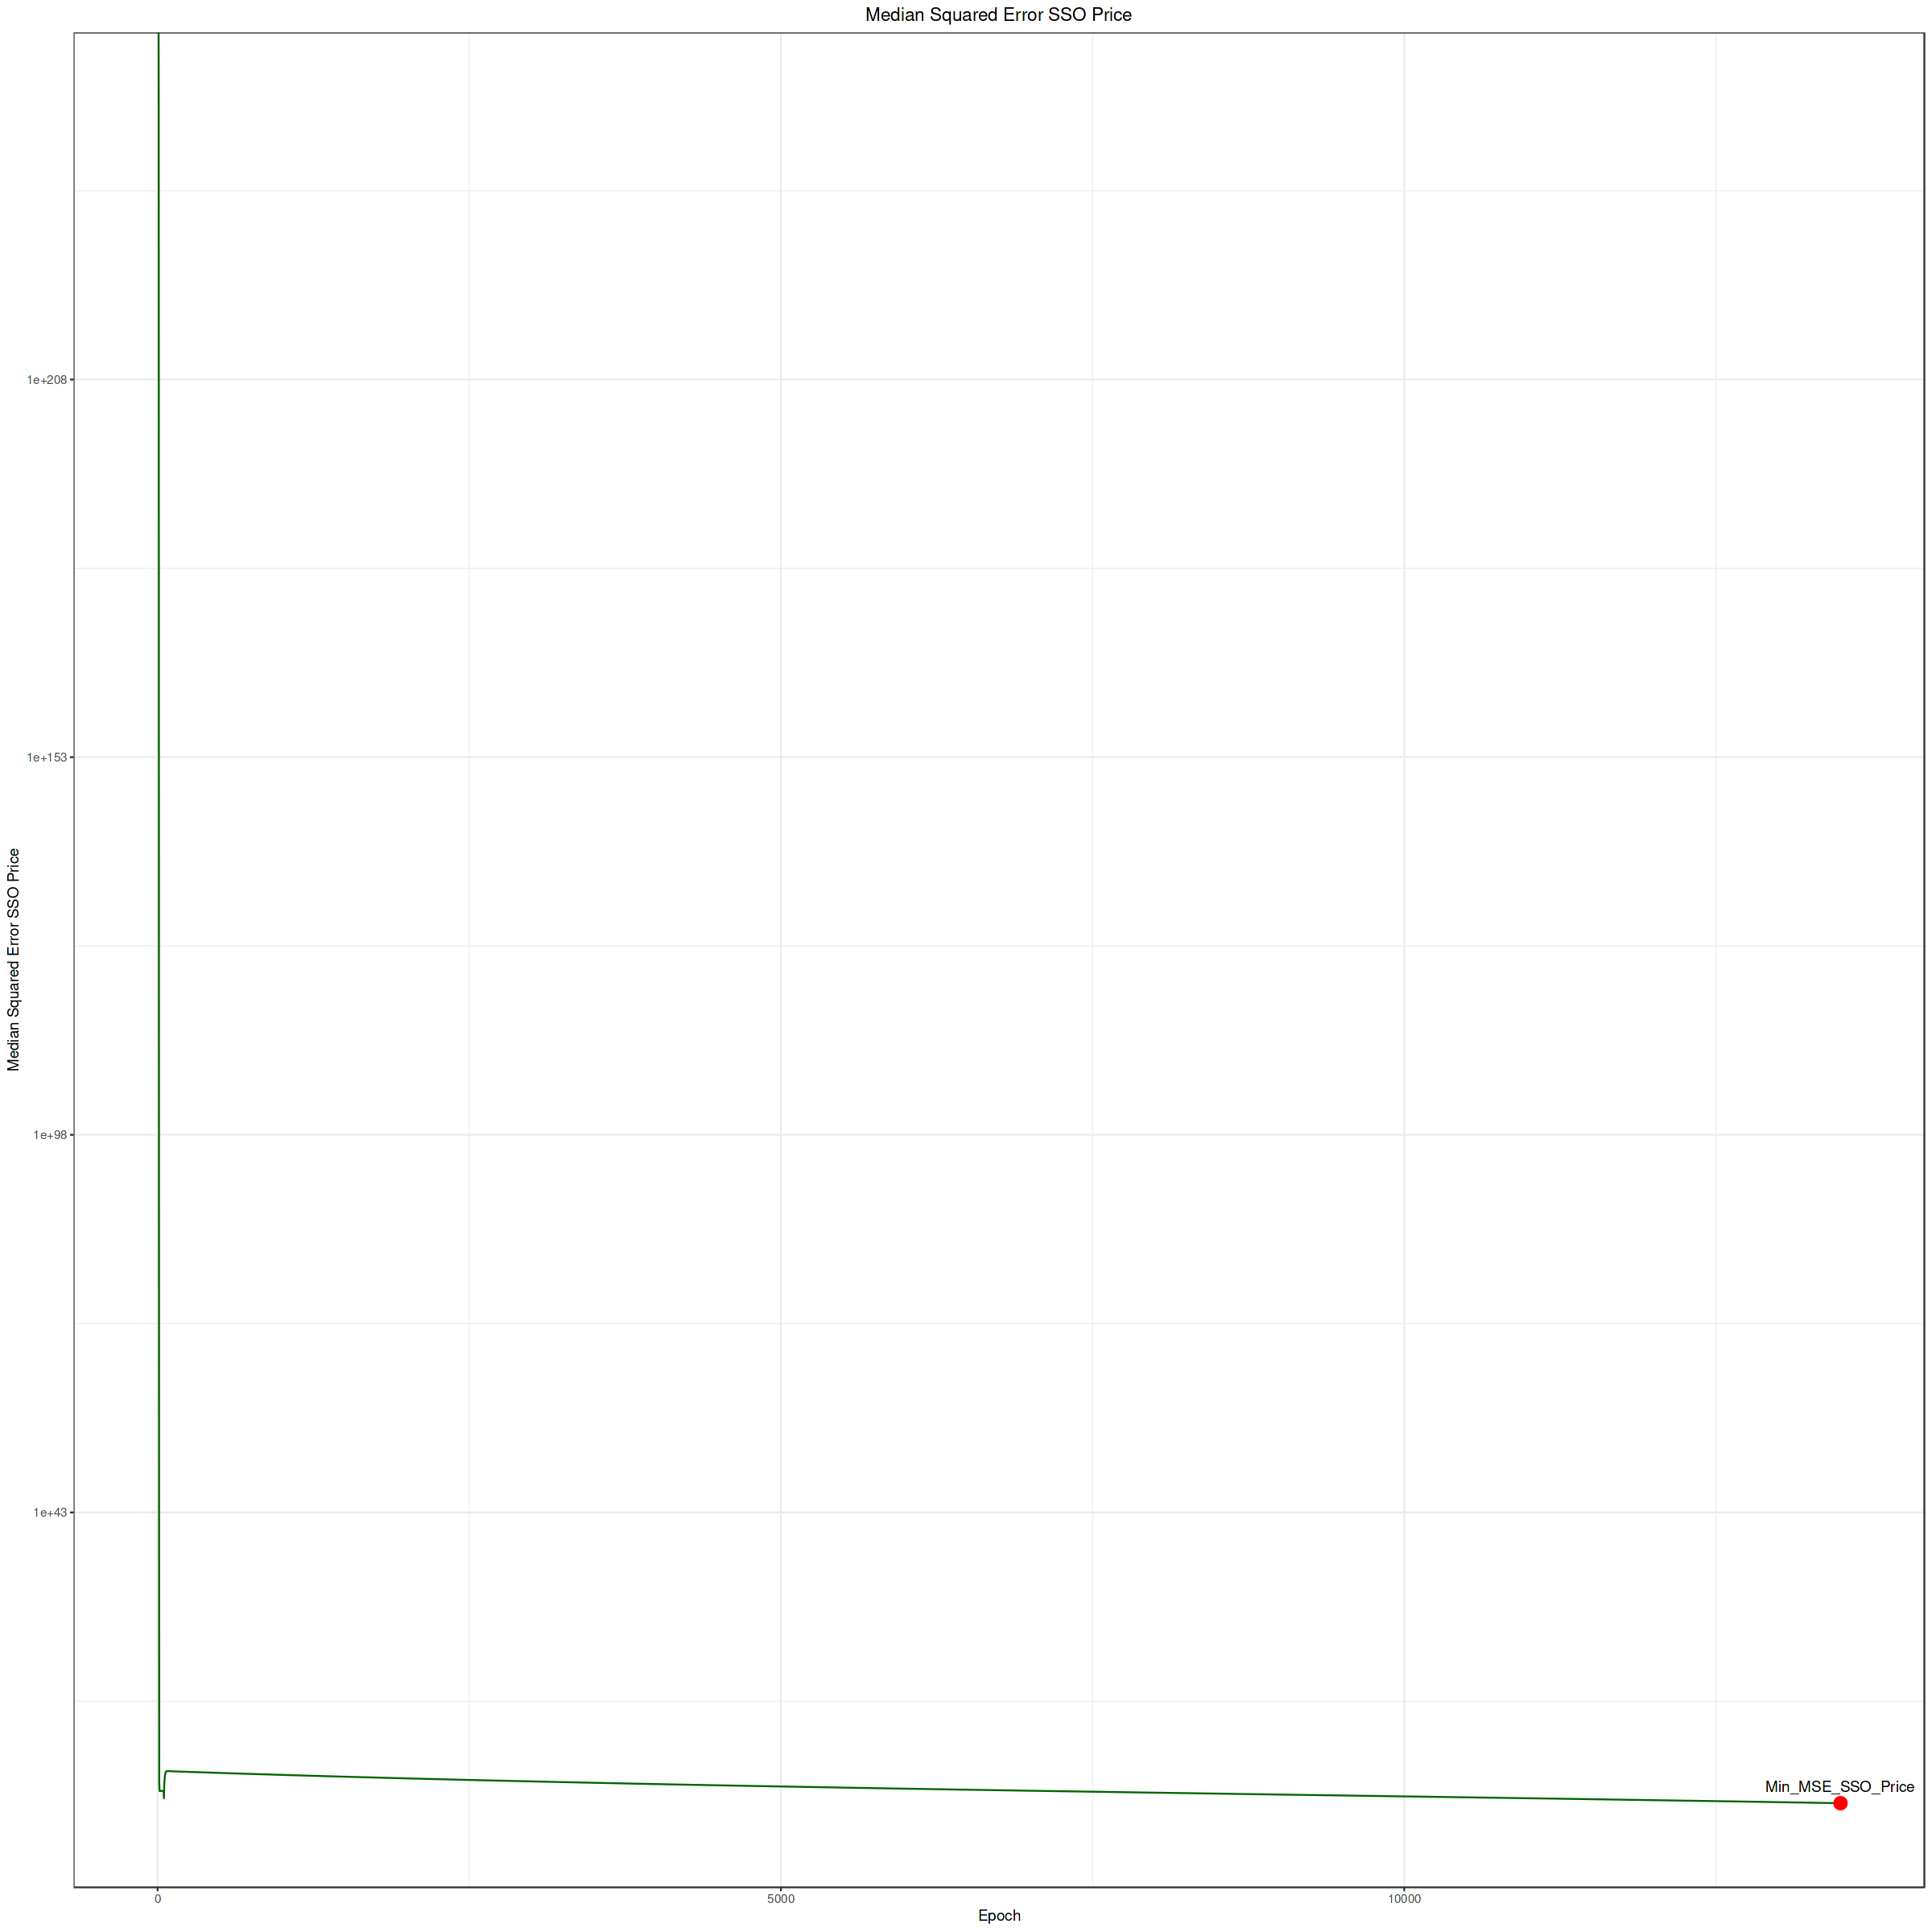

In [202]:
options(repr.plot.width = 20, repr.plot.height = 20)

print(MSE_SSO_Price)

##  Graph for best prediction for SSO Price vs Actual SSO Price
X4 output with the lowest median squared error for SSO

In [203]:
X4_min <-X4_list[[Epoch_lowest_error_SSO]]

In [204]:
X4_unscaled_SSO_min <-(((X4_min - N_lower_bound)*(range_i))/(N_upper_bound - N_lower_bound)) + min(Y_Output_Neurons)

Predicted_Leverage_SSO <-t(X4_unscaled_SSO_min)

SSO_PredPerChange_6_22_2006_Onwards <-SP500_Percent_Neural_Clean_Matrix * Predicted_Leverage_SSO %>%
  as.data.frame() %>%
  setNames("Percent_Change")

SSO_Closing_Price_Prediction <-data.frame(SSO_Closing_Price_Pred = Reduce(function(x, y) x * (100 + y) / 100, SSO_PredPerChange_6_22_2006_Onwards$Percent_Change, accumulate = TRUE, init = first_day_price_SSO))

Predicted SSO Closing Price

In [205]:
SSO_Pred_ClosingPrice_df <-cbind(SSO_Date_Closing_Price, SSO_Closing_Price_Prediction)

Plot SSO_Pred_ClosingPrice_df

In [206]:
SSO_Pred_ClosingPrice_df_DateConvert <-SSO_Pred_ClosingPrice_df
SSO_Pred_ClosingPrice_df_DateConvert$Date <-as.Date(SSO_Pred_ClosingPrice_df_DateConvert$Date, format = "%Y-%m-%d")

SSO_Closing_Price_Pred_df_plot <-ggplot(data = SSO_Pred_ClosingPrice_df_DateConvert, aes(x = Date, y = SSO_Closing_Price), group=1) +
  geom_line(aes(color = "SSO")) +
  geom_line(data = SSO_Pred_ClosingPrice_df_DateConvert, aes(x = Date, y = SSO_Closing_Price_Pred, color = "SSO Predicted"), group = 1) +
  labs(x = "Date", y = "Closing Price", title = "SSO Closing Price vs. Predicted Closing Price") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

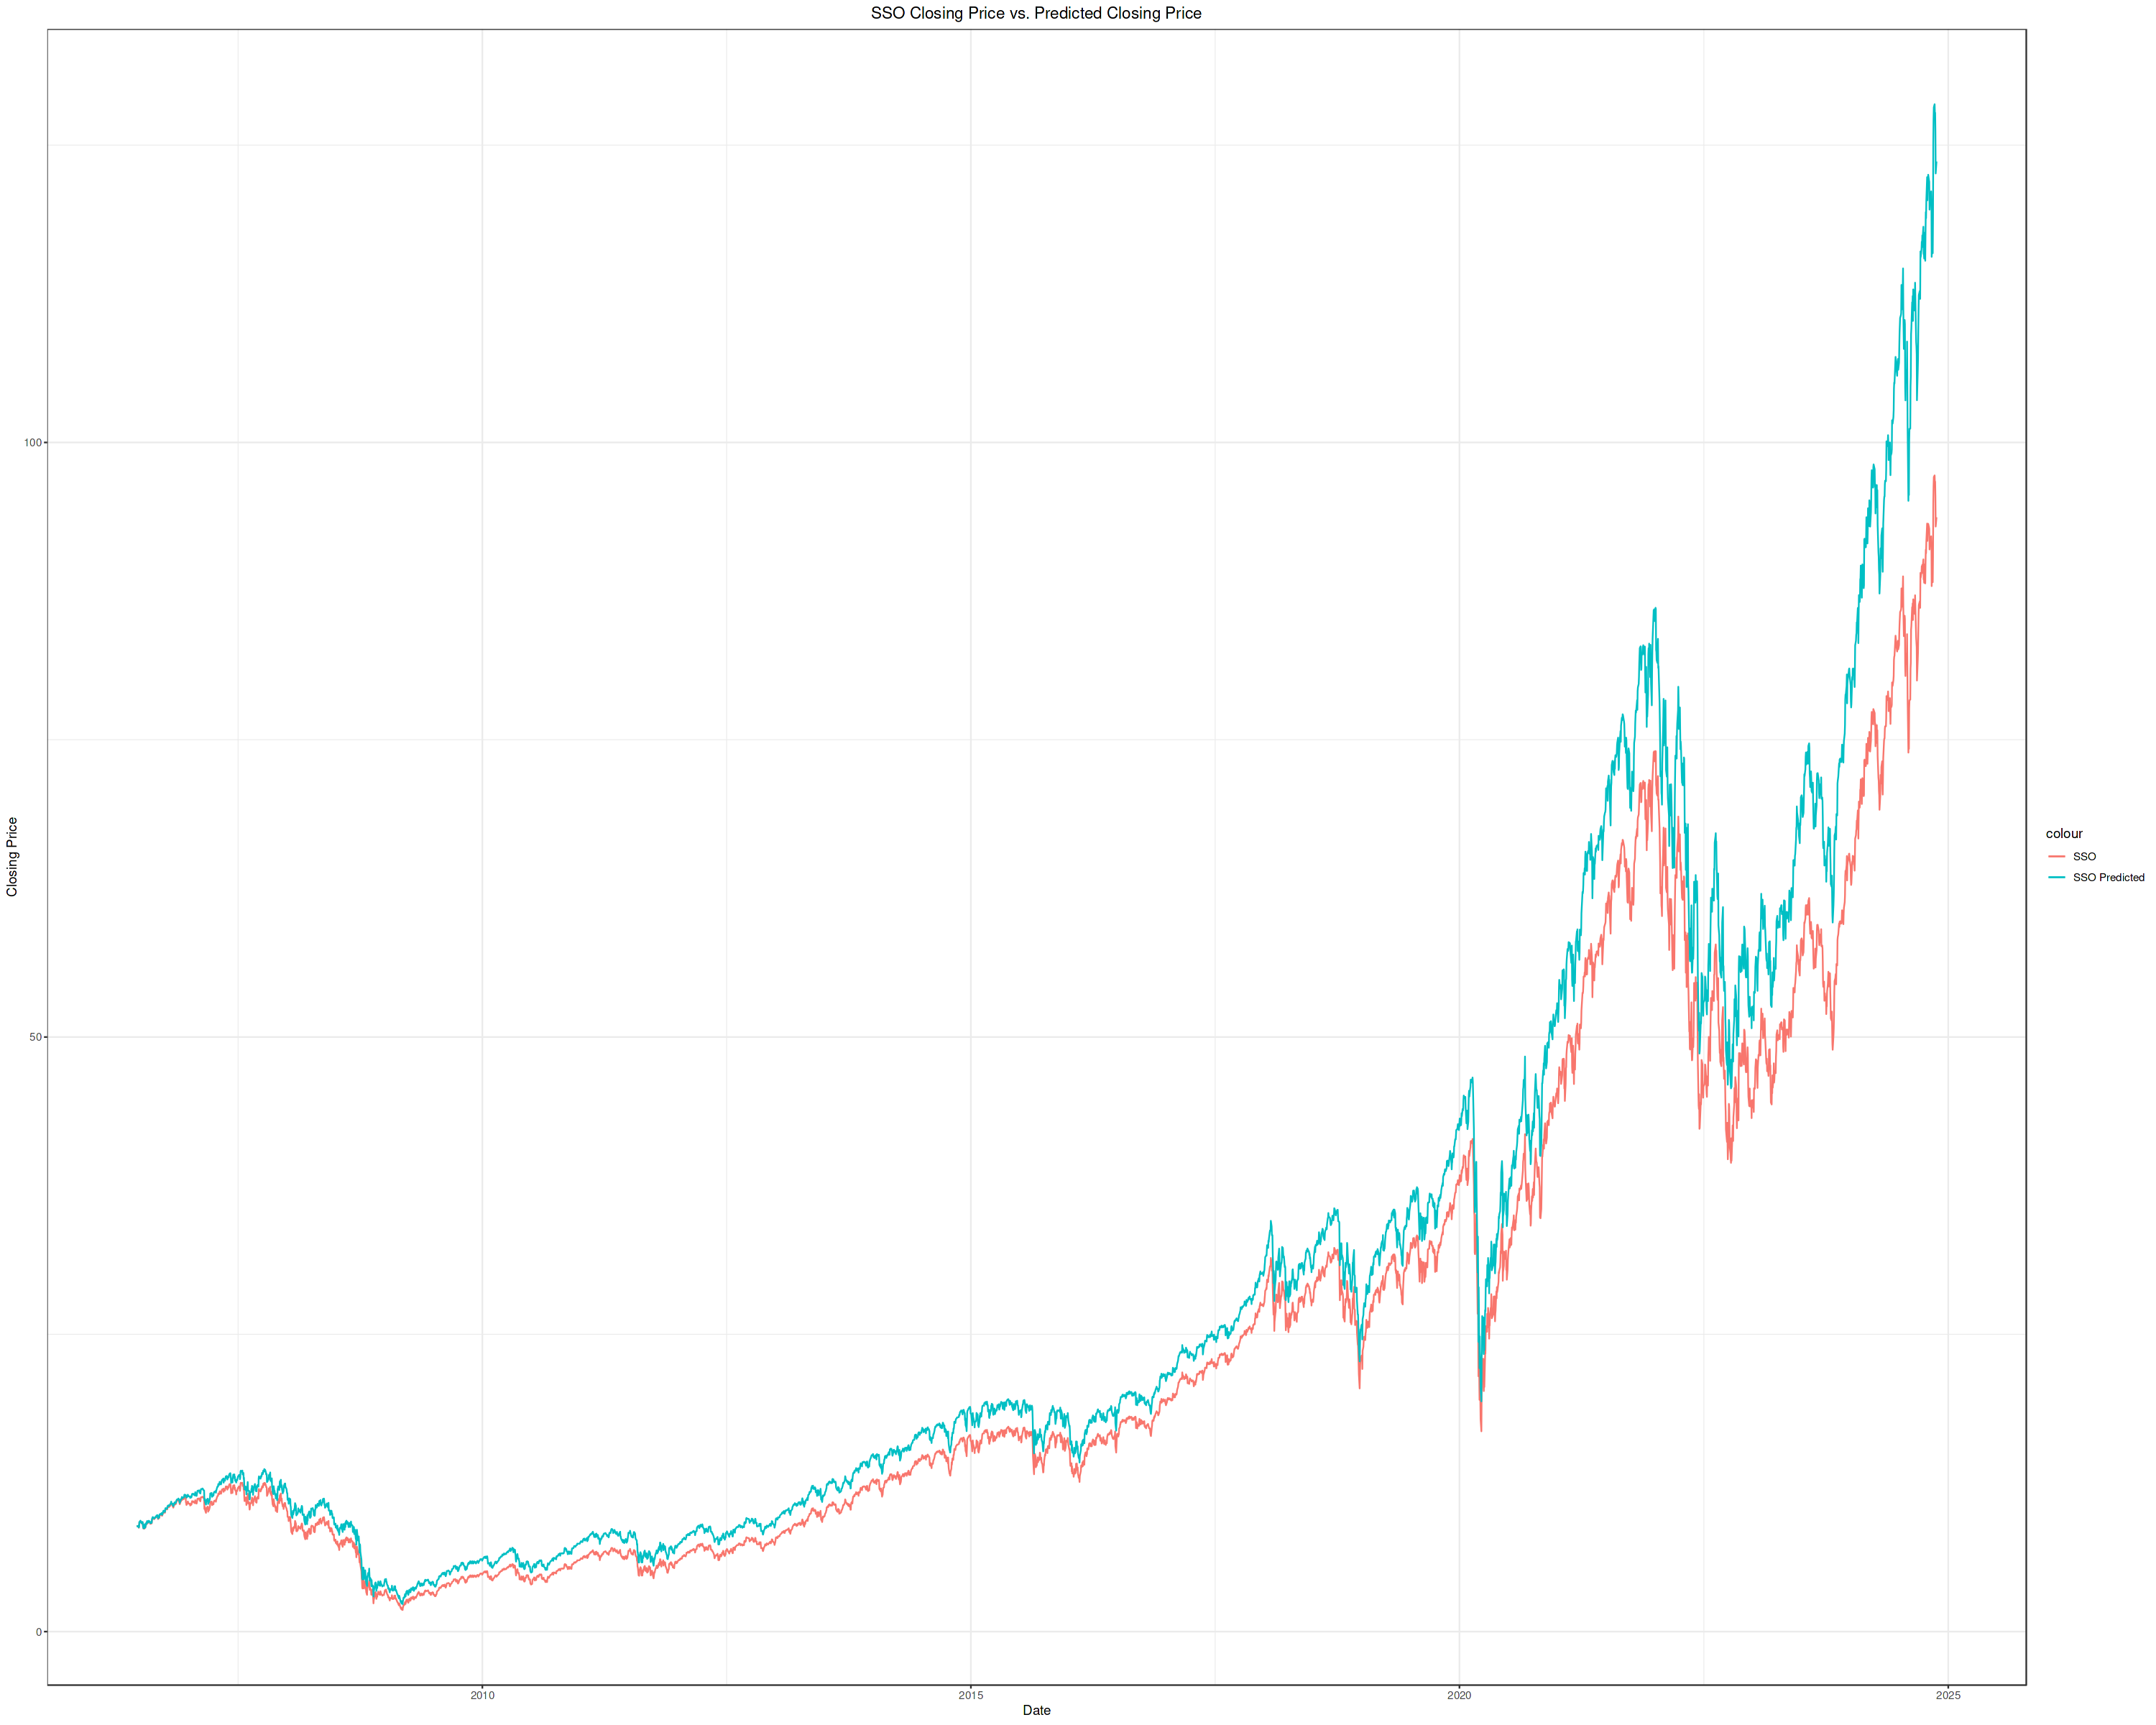

In [207]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SSO_Closing_Price_Pred_df_plot)

## Feedforward Parameters to Make Predictions For S&P500 From 1957-03-04 Onwards (2x Leverage)

S&P500 price from 1957-03-05 onwards.

In [208]:
SP500_Price_feedforward <-SP500_data_clean %>%
  filter(Date >= as.Date("1957-03-05", format = "%Y-%m-%d"))  %>% 
  select(SP500_Closing_Price)

S&P500 percent change from 1957-03-05 onwards.

In [209]:
SP500_Daily_Percent_Change_feedforward <-SP500_Daily_Percent_Changedf  %>% 
  select(Daily_Percent_Change)

S&P500 closing price and percent change from 1957-03-05 onwards

In [210]:
SP500Price_SP500Percent_feedforward <-cbind(SP500_Price_feedforward, SP500_Daily_Percent_Change_feedforward)

Rename columns to x_1=closing price and x_2=percent change

In [211]:
Neural_Network_Input_Feedforward <-SP500Price_SP500Percent_feedforward %>% 
  rename(x_1 = SP500_Closing_Price, x_2 = Daily_Percent_Change)

UNSCALED Neural Network Input for feedforward prediction.

In [212]:
X_Input_Neurons_feedforward <-Neural_Network_Input_Feedforward

SCALED Neural_Network_Input_Feedforward to feed into Neural Network.

In [213]:
Neural_Network_Input_feedforward_Scaled <-Neural_Network_Input_Feedforward   %>%
  mutate(x_1 = N_lower_bound + ( ((x_1 - min(x_1))*(N_upper_bound - N_lower_bound)) / (max(x_1) - min(x_1))),
         x_2 = N_lower_bound + ( ((x_2 - min(x_2))*(N_upper_bound - N_lower_bound)) / (max(x_2) - min(x_2))))

Weight matrix M1, M2, M3 from the epoch with the lowest median squared error for SSO

In [214]:
M1_min <-M1_list[[Epoch_lowest_error_SSO]]

M2_min <-M2_list[[Epoch_lowest_error_SSO]]

M3_min <-M3_list[[Epoch_lowest_error_SSO]]

## Forward pass feedforward prediction (2x Leverage)
SSO Neural Network Feedforward Prediction.<br>
_f=feedforward<br>

In [215]:
X1_f <-t(as.matrix(cbind(Neural_Network_Input_feedforward_Scaled, x_3 = 1)))

Z2_f <-M1_min %*% X1_f

LeakyReLU1_f <- t(apply(Z2_f, 1, function(x) ifelse(x >= 0, x, LeakyReLU_alpha * x))) %>% 
  as.matrix()

X2_f <-rbind(LeakyReLU1_f, 1)  %>% 
  as.matrix()

Z3_f <-M2_min %*% X2_f

LeakyReLU2_f <- t(apply(Z3_f, 1, function(x) ifelse(x >= 0, x, LeakyReLU_alpha * x))) %>% 
  as.matrix()

X3_f <-rbind(LeakyReLU2_f, 1) %>% 
  as.matrix()

Z4_f <-M3_min %*% X3_f

X4_f <-Z4_f %>% 
  as.matrix()

X4_f must be unscaled. Range of i is the range of yi. X4_f is the output<br>
of the neural network, which is the predicted SSO leverage. X4_f is the<br>
unscaled 2x S&P500 leverage prediction.<br>

In [216]:
X4_unscaled_f <-(((X4_f - N_lower_bound)*(range_i))/(N_upper_bound - N_lower_bound)) + min(Y_Output_Neurons)

Predicted 2X S&P500 leverage.

In [217]:
Lev_2X_Predicted <-t(X4_unscaled_f)

Min, Max, Median of predicted 2X S&P500 leverage

In [218]:
print(paste("Minimum SSO leverage=", round(min(Lev_2X_Predicted),2)))
print(paste("Max SSO leverage=", round(max(Lev_2X_Predicted),2)))
print(paste("Median SSO leverage=", round(median(Lev_2X_Predicted),2)))

[1] "Minimum SSO leverage= 1.92"
[1] "Max SSO leverage= 2.11"
[1] "Median SSO leverage= 1.96"


Predicted 2x leverage S&P500 Percentage change from 1957-03-05 onwards

In [219]:
Lev2x_PredPerChange <-SP500_Daily_Percent_Change_feedforward * Lev_2X_Predicted  %>% 
  as.data.frame()

SP500 full date and price

In [220]:
SP500_Date_ClosingPrice <-SP500_data_clean %>%
  select(Date, SP500_Closing_Price)

Extract the first day price of SP&500

In [221]:
first_day_price_SP500_f <-SP500_Date_ClosingPrice$SP500_Closing_Price[1]

Calculates predicted percentage change for 2x S&P500<br>
Next day price = (first day price) * (100 + predicted SSO percentage change) / 100<br>
This is price calculated through neural network.<br>
S&P500 2X Closing Price was calculated by multiplying SSO lev median by<br>
S&P500 percent change.<br>

In [222]:
SP500_2X_Closing_Price_Pred_df <-data.frame(SP500_2XClosing_Price_NeuralNet = Reduce(function(x, y) x * (100 + y) / 100,
  Lev2x_PredPerChange$Daily_Percent_Change, accumulate = TRUE, init = first_day_price_SP500_f))

Comparison of S&P500 Closing Price with Median and Neural Network Predictions(2X)

In [223]:
SP500_2XClosingPrice_Median <-rbind(first_day_price_SP500_f, SP500_2XClosingPrice_df)

SP500_1xVs2X_Closing_Price_Pred_df <-cbind(SP500_Date_ClosingPrice, SP500_2XClosingPrice_Median, SP500_2X_Closing_Price_Pred_df)

SP500_1xVs2X_Closing_Price_Pred_df_DateConvert <-SP500_1xVs2X_Closing_Price_Pred_df
SP500_1xVs2X_Closing_Price_Pred_df_DateConvert$Date <- as.Date(SP500_1xVs2X_Closing_Price_Pred_df_DateConvert$Date, format = "%Y-%m-%d")

SP500_1xVs2X_Closing_Price_Pred_plot <-ggplot(data = SP500_1xVs2X_Closing_Price_Pred_df_DateConvert, aes(x = Date, y = SP500_Closing_Price), group=1) +
  geom_line(aes(color = "S&P500")) +
  geom_line(data = SP500_1xVs2X_Closing_Price_Pred_df_DateConvert, aes(x = Date, y = SP500_2XClosing_Price, color = "S&P500 2X Median"), group = 1) +
  geom_line(data = SP500_1xVs2X_Closing_Price_Pred_df_DateConvert, aes(x = Date, y = SP500_2XClosing_Price_NeuralNet, color = "S&P500 2X NeuralNetwork"), group = 1) +
  scale_y_log10() +
  scale_color_manual(values = c("S&P500" = "red", "S&P500 2X Median" = "blue", "S&P500 2X NeuralNetwork" = "green")) +
  labs(title = "Comparison of S&P500 Closing Price with Median and Neural Network Predictions(2X)") +
  theme(plot.title = element_text(hjust = 0.5))

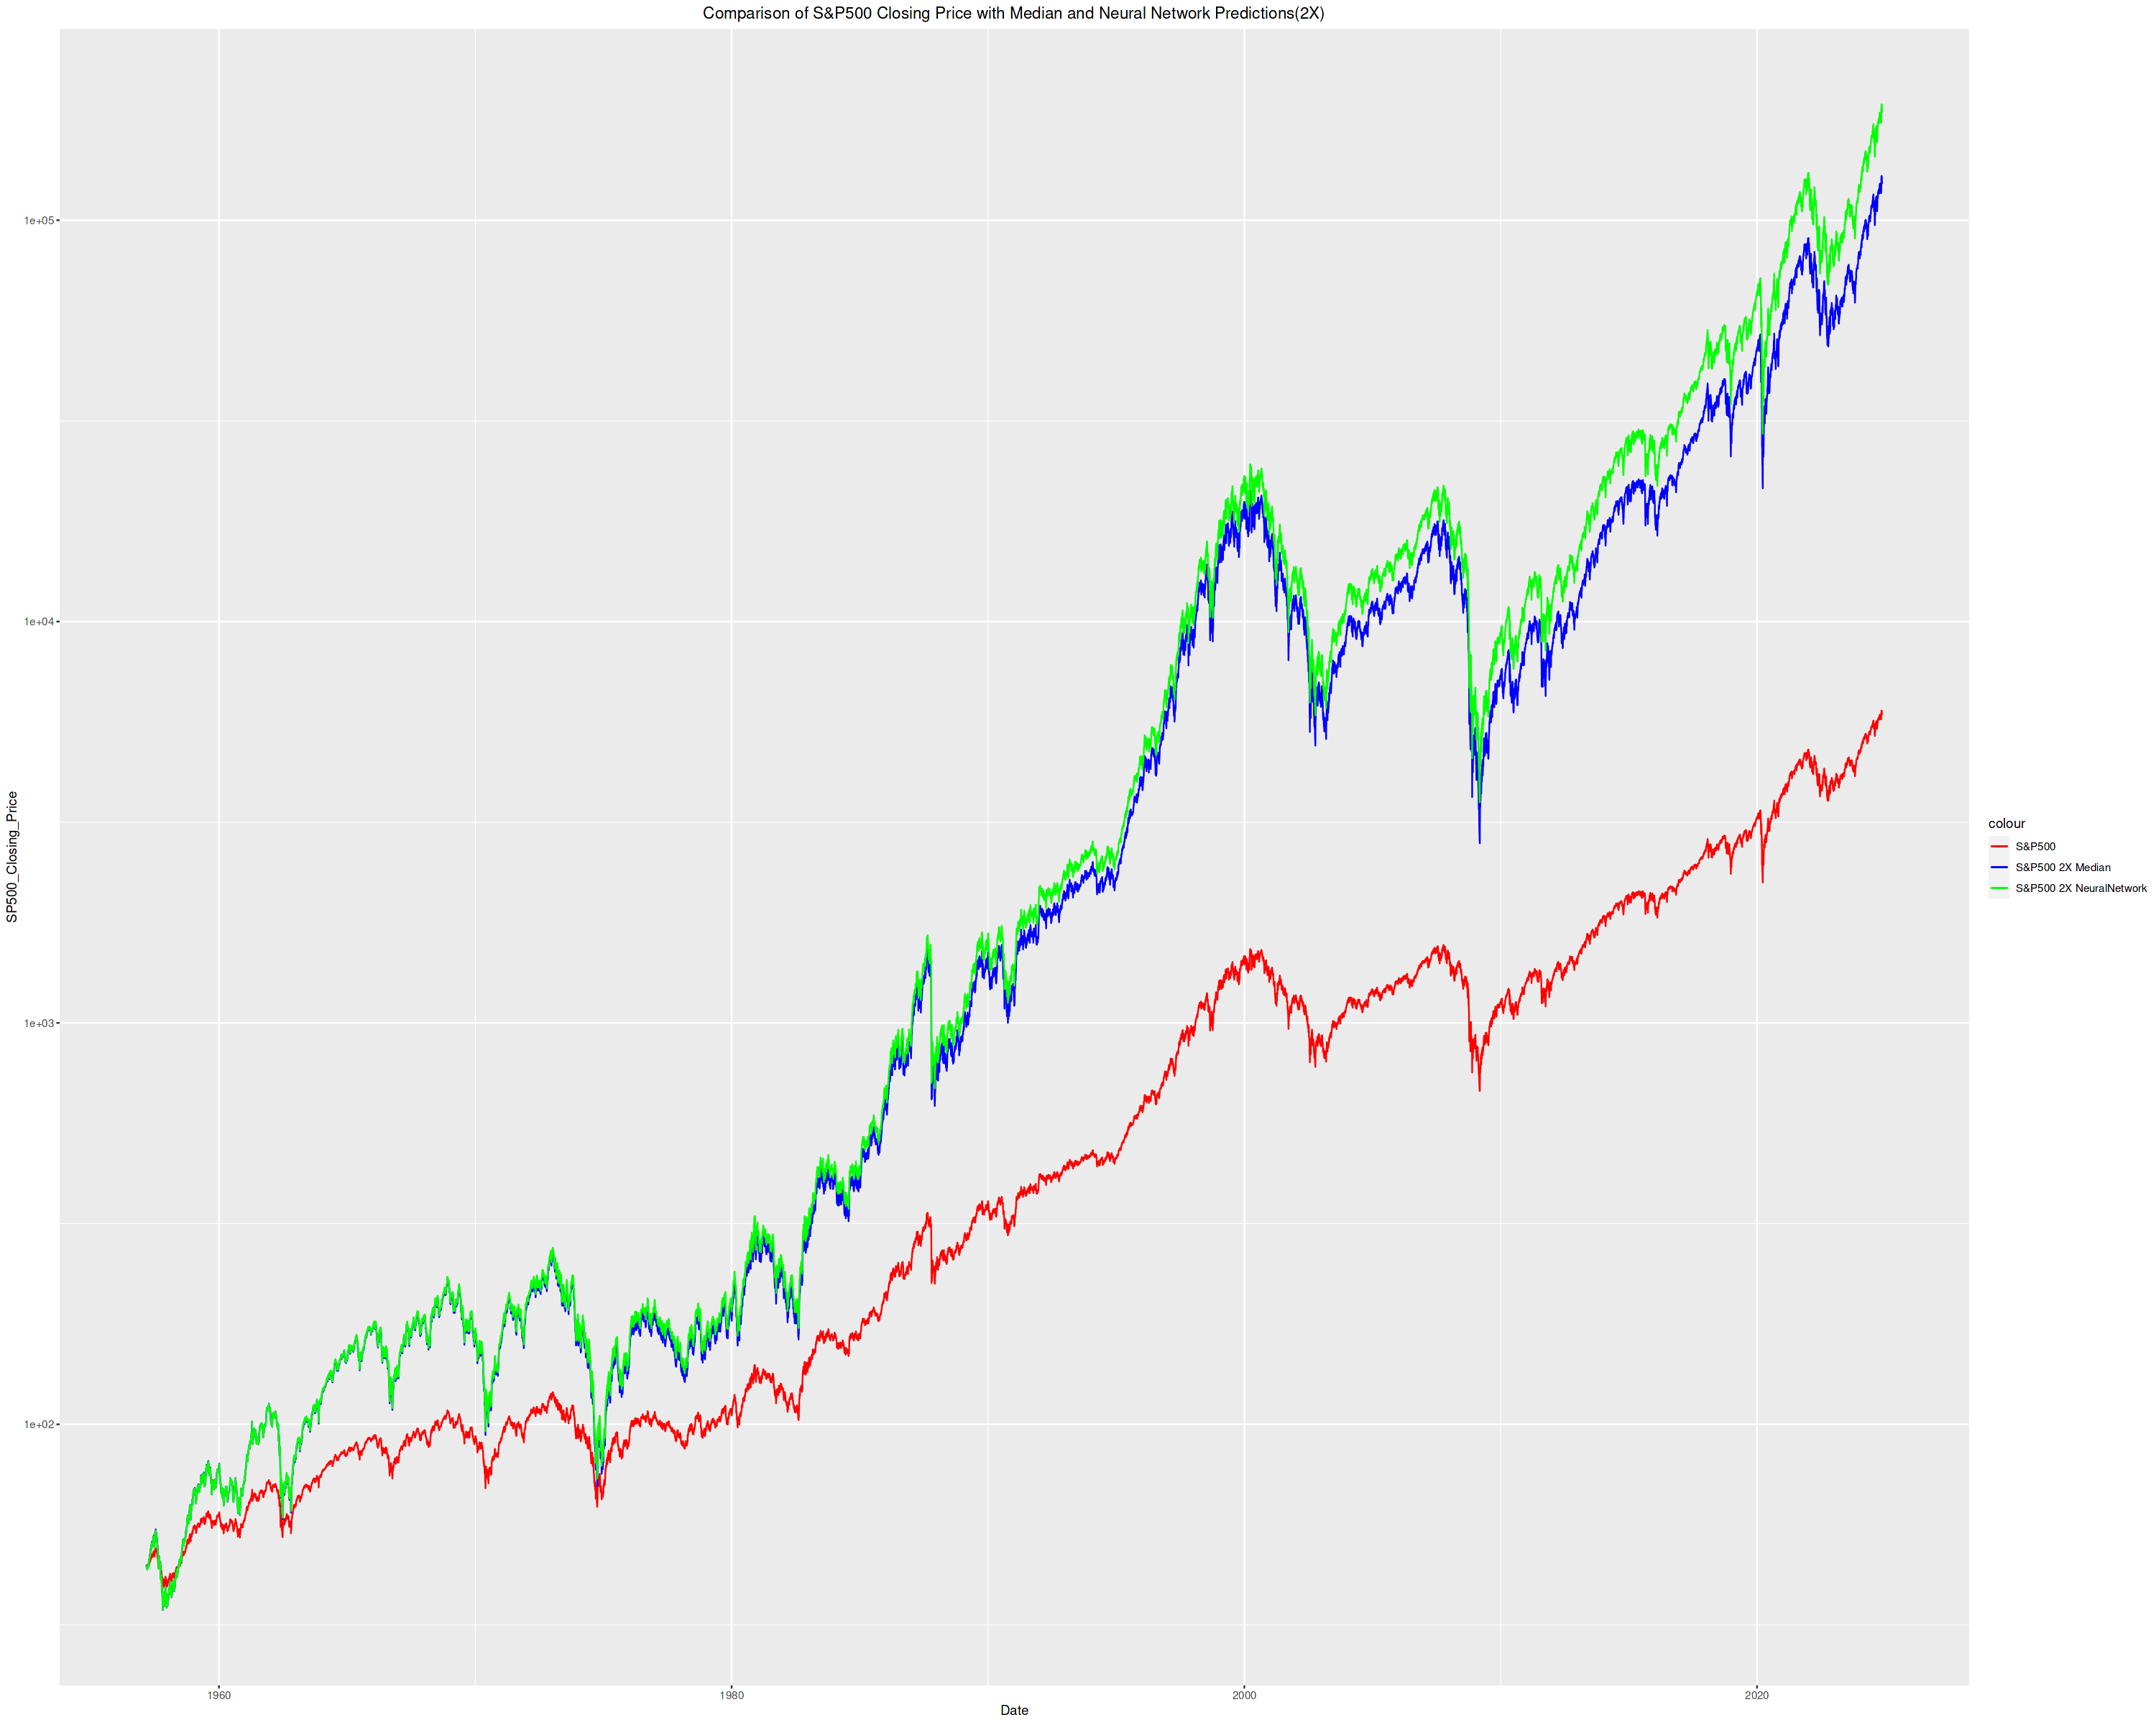

In [224]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_1xVs2X_Closing_Price_Pred_plot)

## Neural Network (3X Leverage)
SP500 price from 6/26/2009 onwards.<br>
_U indicates data used for UPRO calculations<br>
Fisrt day is 6/25/2009 for UPRO -> 6/26/2009 for SP500<br>

In [225]:
SP500_Price_Neural_Clean_U <-SP500_data_clean %>%
  filter(Date >= as.Date("2009-06-26", format = "%Y-%m-%d")) %>%
  select(SP500_Closing_Price)

S&P500 percent change from 6/26/2009 onwards.

In [226]:
SP500_Percent_Neural_Clean_U <-SP500_Daily_Percent_Change_UPROdf %>%
  select(Daily_Percent_Change)

UPRO leverage from 6/26/2009 onwards.

In [227]:
head(UPROLev)

,UPRO_Leverage
,<dbl>
1,3.508089
2,3.129817
3,2.798521
4,2.459789
5,2.831579
6,1.066543


In [228]:
SP500Price_SP500Percent_UPROLev <-cbind(SP500_Price_Neural_Clean_U, SP500_Percent_Neural_Clean_U, UPROLev)

Neural Network input data

In [229]:
Neural_Network_Input_U <-SP500Price_SP500Percent_UPROLev %>% 
  rename(x_1 = SP500_Closing_Price, x_2 = Daily_Percent_Change, y = UPRO_Leverage)

Observations for unscaled Neural Network Input.

In [230]:
X_Input_Neurons_U <-Neural_Network_Input_U %>% 
  select(x_1, x_2)

Y_Output_Neurons_U <-Neural_Network_Input_U %>% 
  select(y)

In [231]:
N_lower_bound_U <-0
N_upper_bound_U <-1
Neural_Network_Input_Scaled_U <-Neural_Network_Input_U %>%
  mutate(x_1 = N_lower_bound_U + ( ((x_1 - min(x_1))*(N_upper_bound_U - N_lower_bound_U)) / (max(x_1) - min(x_1))),
         x_2 = N_lower_bound_U + ( ((x_2 - min(x_2))*(N_upper_bound_U - N_lower_bound_U)) / (max(x_2) - min(x_2))),
         y = N_lower_bound_U + ( ((y - min(y))*(N_upper_bound_U - N_lower_bound_U)) / (max(y) - min(y))))

Observations for scaled Neural Network Input.

In [232]:
X_Input_Neurons_Scaled_U <-Neural_Network_Input_Scaled_U %>% 
  select(x_1, x_2)

Y_Output_Neurons_Scaled_U <-Neural_Network_Input_Scaled_U %>%
  select(y)

yi is the output variable y for (x_1, x_2, y)

In [233]:
yi_U <-t(as.matrix(Y_Output_Neurons_Scaled_U))

Size of yi

In [234]:
print(paste("yi size:", nrow(yi_U), "x", ncol(yi_U)))

[1] "yi size: 1 x 3876"


## Parameters for Batch Gradient Descent (3X Leverage)
Number of observations per iteration

In [235]:
n_U <-nrow(Neural_Network_Input_U)

Total number of observations

In [236]:
Tb_U <-nrow(Neural_Network_Input_U)

Number of batches

In [237]:
Number_Batches_U <-Tb_U/n_U

Check if the number of batches is a positive whole number

In [238]:
if (Number_Batches_U %% 1 == 0) {
  print("Number of batches is a positive whole number")
  print(paste("Number of Batches=", Number_Batches_U))
} else {
  print("Number of batches is not a positive whole number")
  print(paste("Number of Batches=", Number_Batches_U))
}

[1] "Number of batches is a positive whole number"
[1] "Number of Batches= 1"


Set the number of input neurons to the number of columns in the input<br> 
data (x_1, x_2), not including the output column (y).<br>

In [239]:
Num_input_neurons_U <-ncol(Neural_Network_Input_U) - 1

Add 1 to the number of inputs to account for the bias

In [240]:
Num_input_neurons_Plus_Bias_U <-Num_input_neurons_U + 1

Number of hidden layers

In [241]:
Number_Hidden_Layers_U <-2

Size of input layer

In [242]:
Size_input_layer_U <-n_U

Size of output layer, which is 1 for a regression problem with one output<br> 
variable.<br>

In [243]:
Size_output_layer_U <-1

Number of neurons in the 1st hidden layer

In [244]:
Number_Neurons_Hidden_Layer_1_U <-1

In [245]:
print(paste("Number of neurons in the 1st hidden layer=", Number_Neurons_Hidden_Layer_1_U))

[1] "Number of neurons in the 1st hidden layer= 1"


Number of neurons in the 2nd hidden layer

In [246]:
Number_Neurons_Hidden_Layer_2_U <-Number_Neurons_Hidden_Layer_1_U

In [247]:
print(paste("Number of neurons in the 2nd hidden layer=", Number_Neurons_Hidden_Layer_2_U))

[1] "Number of neurons in the 2nd hidden layer= 1"


**Size of Matrices**

Size of matrix M1

In [248]:
M1_m_rows_U <-Number_Neurons_Hidden_Layer_1_U
M1_n_col_U <-Num_input_neurons_Plus_Bias_U

Size of matrix X1

In [249]:
X1_m_rows_U <-Num_input_neurons_Plus_Bias_U
X1_n_col_U <-n_U

Size of matrix Z2

In [250]:
Z2_m_rows_U <-M1_m_rows_U
Z2_n_col_U <-X1_n_col_U

Size of LeakyReLU1

In [251]:
LeakyReLU1_m_rows_U <-Z2_m_rows_U
LeakyReLU1_n_col_U <-Z2_n_col_U

Size of matrix M2

In [252]:
M2_m_rows_U <-Number_Neurons_Hidden_Layer_2_U
M2_n_col_U <-LeakyReLU1_m_rows_U + 1

Size of matrix X2<br>
Add 1 to the number of rows of LeakyReLU1 to account for the bias<br>

In [253]:
X2_m_rows_U <-LeakyReLU1_m_rows_U + 1
X2_n_col_U <-LeakyReLU1_n_col_U

Size of matrix Z3

In [254]:
Z3_m_rows_U <-M2_m_rows_U
Z3_n_col_U <-X2_n_col_U

Size of LeakyReLU2

In [255]:
LeakyReLU2_m_rows_U <-Z3_m_rows_U
LeakyReLU2_n_col_U <-Z3_n_col_U

Size of matrix M3

In [256]:
M3_m_rows_U <-Size_output_layer_U
M3_n_col_U <-LeakyReLU2_m_rows_U + 1

Size of matrix X3<br>
Add 1 to the number of rows of LeakyReLU2 to account for the bias<br>

In [257]:
X3_m_rows_U <-LeakyReLU2_m_rows_U + 1
X3_n_col_U <-LeakyReLU2_n_col_U

Size of matrix Z4

In [258]:
Z4_m_rows_U <-M3_m_rows_U
Z4_n_col_U <-X3_n_col_U

Size of matrix X4

In [259]:
X4_m_rows_U <-Z4_m_rows_U
X4_n_col_U <-Z4_n_col_U

In [260]:
print(paste("Size of matrix M1=", M1_m_rows_U, "x", M1_n_col_U))
print(paste("Size of matrix X1=", X1_m_rows_U, "x", X1_n_col_U))
print(paste("Size of matrix Z2=", Z2_m_rows_U, "x", Z2_n_col_U))
print(paste("Size of matrix LeakyReLU1=", LeakyReLU1_m_rows_U, "x", LeakyReLU1_n_col_U))
print(paste("Size of matrix X2=", X2_m_rows_U, "x", X2_n_col_U))
print(paste("Size of matrix M2=", M2_m_rows_U, "x", M2_n_col_U))
print(paste("Size of matrix Z3=", Z3_m_rows_U, "x", Z3_n_col_U))
print(paste("Size of matrix LeakyReLU2=", LeakyReLU2_m_rows_U, "x", LeakyReLU2_n_col_U))
print(paste("Size of matrix X3=", X3_m_rows_U, "x", X3_n_col_U))
print(paste("Size of matrix M3=", M3_m_rows_U, "x", M3_n_col_U))
print(paste("Size of matrix Z4=", Z4_m_rows_U, "x", Z4_n_col_U))
print(paste("Size of matrix X4=", X4_m_rows_U, "x", X4_n_col_U))

[1] "Size of matrix M1= 1 x 3"
[1] "Size of matrix X1= 3 x 3876"
[1] "Size of matrix Z2= 1 x 3876"
[1] "Size of matrix LeakyReLU1= 1 x 3876"
[1] "Size of matrix X2= 2 x 3876"
[1] "Size of matrix M2= 1 x 2"
[1] "Size of matrix Z3= 1 x 3876"
[1] "Size of matrix LeakyReLU2= 1 x 3876"
[1] "Size of matrix X3= 2 x 3876"
[1] "Size of matrix M3= 1 x 2"
[1] "Size of matrix Z4= 1 x 3876"
[1] "Size of matrix X4= 1 x 3876"


LeakyReLU hyperpameter

In [261]:
LeakyReLU_alpha_U <-0.1

## Neural Network: Loop From 1 to Epochs for 3X Leverage. Used Variable Learning Rate

In [262]:
Epochs_U <-16800
Alpha_ONE_U <-0.000001

Set seed

In [263]:
set.seed(123)

Weight matrices M1, M2, M3

In [264]:
M1_U <-matrix(rnorm(M1_m_rows_U * M1_n_col_U, mean = 0, sd = 1), nrow = M1_m_rows_U, ncol = M1_n_col_U)
M2_U <-matrix(rnorm(M2_m_rows_U * M2_n_col_U, mean = 0, sd = 1), nrow = M2_m_rows_U, ncol = M2_n_col_U)
M3_U <-matrix(rnorm(M3_m_rows_U * M3_n_col_U, mean = 0, sd = 1), nrow = M3_m_rows_U, ncol = M3_n_col_U)

Create an empty dataframe to store the median squared error for each epoch

In [265]:
Median_Squared_Error_U <-data.frame(epoch = numeric(Epochs_U), mse_x4 = numeric(Epochs_U), mse_upro = numeric(Epochs_U))

Create a list to store X4 for each epoch

In [266]:
X4_list_U <-vector("list", Epochs_U)

Create a list to store M1 for each epoch

In [267]:
M1_list_U <-vector("list", Epochs_U)

Create a list to store M2 for each epoch

In [268]:
M2_list_U <-vector("list", Epochs_U)

Create a list to store M3 for each epoch

In [269]:
M3_list_U <-vector("list", Epochs_U)

## Parameters for Median Squared Error for UPRO Price

Calculate the range of the original data

In [270]:
range_i_U <-max(Y_Output_Neurons_U) - min(Y_Output_Neurons_U)

Matrix for S&P500 percent change from 6/26/2009 onwards

In [271]:
SP500_Percent_Neural_Clean_Matrix_U <-as.matrix(SP500_Percent_Neural_Clean_U)

UPRO date and price from 6/26/2009 onwards

In [272]:
UPRO_Date_Closing_Price <-UPRO_data_clean %>%
  select(Date, UPRO_Closing_Price)

Extract the first day price of UPRO, 1st day is 6/26/2009

In [273]:
first_day_price_UPRO <-UPRO_Date_Closing_Price$UPRO_Closing_Price[1]

UPRO Price

In [274]:
UPRO_Price <-UPRO_data_clean %>%
  select(UPRO_Closing_Price)  %>% 
  as.matrix()

## Loop For Neural network (3X Leverage)

Neural network uses 1 neuron in each hidden layer. Neural network has an<br>
input layer, 2 hidden layers and 1 output layer. Even though each hidden<br>
layer only uses 1 neuron, the code is generalized to use more than 1<br> 
neuron in each hidden layer. Median squared error for UPRO Price is used<br> 
as validation for the neural network. Use a pseudo early stopping technique,<br>
it is not really early stopping because the neural network is not actually<br>
stopped. But rather neural network is overfitted to the training data.<br> 
All the weights for every epoch is stored. The best weight matrices are<br>
selected based on the best median squared error for UPRO Price.<br>

UPRO Neural Network Training Loop.<br>

In [275]:
for (epoch_U in 1:Epochs_U) {
  ###############################################
  # Code for one forward pass
  ###############################################
X1_U <-t(as.matrix(cbind(X_Input_Neurons_Scaled_U, x_3 = 1)))

Z2_U <-M1_U %*% X1_U

LeakyReLU1_U <- t(apply(Z2_U, 1, function(x) ifelse(x >= 0, x, LeakyReLU_alpha_U * x))) %>% 
  as.matrix()

X2_U <-rbind(LeakyReLU1_U, 1)  %>% 
  as.matrix()

Z3_U <-M2_U %*% X2_U

LeakyReLU2_U <- t(apply(Z3_U, 1, function(x) ifelse(x >= 0, x, LeakyReLU_alpha_U * x))) %>% 
  as.matrix()

X3_U <-rbind(LeakyReLU2_U, 1) %>% 
  as.matrix()

Z4_U <-M3_U %*% X3_U

X4_U <-Z4_U %>% 
  as.matrix()

#Store X4 for each epoch
  X4_list_U[[epoch_U]] <-X4_U
###############################################
  # Code for one backpropagation
###############################################
DC_DX4_U <--2*(yi_U - X4_U)  %>% 
  as.matrix()

DZ4_DM3_U <-t(X3_U)

DC_DM3_U <-DC_DX4_U %*% DZ4_DM3_U

DC_DX4_2nd_Hidden_Layer_U <-matrix(0, nrow = Z3_m_rows_U, ncol = ncol(DC_DX4_U))
for (i in 1:(Z3_m_rows_U)) {
  DC_DX4_2nd_Hidden_Layer_U[i,] <-DC_DX4_U
}

M3_Transpose_MinusBias_U <-t(M3_U)  %>% 
  head(-1)

DZ4_DX3_U <-matrix(0, nrow = Z3_m_rows_U, ncol = ncol(DC_DX4_U))
for (i in seq_len(ncol(DC_DX4_U))) {
  DZ4_DX3_U[,i] <-M3_Transpose_MinusBias_U
}

DX3_DZ3_element_wise_U <-t(apply(X3_U, 1, function(x) ifelse(x >= 0, 1, LeakyReLU_alpha_U))) %>%
  as.matrix()

if (Number_Neurons_Hidden_Layer_1_U>1) {
DX3_DZ3_U <-DX3_DZ3_element_wise_U[-nrow(DX3_DZ3_element_wise_U),]  %>% 
  as.matrix()
} else {
DX3_DZ3_U <-t(DX3_DZ3_element_wise_U[-nrow(DX3_DZ3_element_wise_U),]) %>% as.matrix()
}

DZ3_DM2_U <-t(X2_U)

DC_DZ3_U <-((DC_DX4_2nd_Hidden_Layer_U * DZ4_DX3_U) * DX3_DZ3_U)

DC_DM2_U <-DC_DZ3_U %*% DZ3_DM2_U

DZ3_DX2_U <-M2_U[,-ncol(M2_U)] %>% 
  as.matrix()

DX2_DZ2_element_wise_U <-t(apply(X2_U, 1, function(x) ifelse(x >= 0, 1, LeakyReLU_alpha_U))) %>%
  as.matrix()

if (Number_Neurons_Hidden_Layer_1_U>1) {
DX2_DZ2_U <-DX2_DZ2_element_wise_U[-nrow(DX2_DZ2_element_wise_U),]  %>% 
  as.matrix()
} else {
DX2_DZ2_U <-t(DX2_DZ2_element_wise_U[-nrow(DX2_DZ2_element_wise_U),])  %>% 
  as.matrix()
}

DZ2_DM1_U <-t(X1_U)

DC_DM1_U <-(DC_DZ3_U * (DZ3_DX2_U %*% DX2_DZ2_U)) %*% DZ2_DM1_U
  ###############################################
  # Update weights and biases (based on backpropagation)
  #Used a variable learning rate for each epoch
  ###############################################
#variable learning rate (1/x) helps to converge faster
for (i in 1:Epochs_U){
  # Update the learning rate for each epoch
  Learning_Rate_U <-Alpha_ONE_U * (1/i)

  M3_U <-M3_U - (Learning_Rate_U * DC_DM3_U)
  M2_U <-M2_U - (Learning_Rate_U * DC_DM2_U)
  M1_U <-M1_U - (Learning_Rate_U * DC_DM1_U)
}

  #Store M3 for each epoch
  M3_list_U[[epoch_U]] <-M3_U
  #Store M2 for each epoch
  M2_list_U[[epoch_U]] <-M2_U
  #Store M1 for each epoch
  M1_list_U[[epoch_U]] <-M1_U
  ###############################################
  # Compute median squared error and store it in the Median_Squared_Error matrix
  ###############################################
#Calculates the median squared error for output X4, for each epoch
MedSE_Epoch_U <-median((yi_U - X4_U)^2)
  #Stores epoch number for each epoch
  Median_Squared_Error_U$epoch[epoch_U] <-epoch_U
  #Stores median squared error for each epoch
  Median_Squared_Error_U$mse_x4[epoch_U] <-MedSE_Epoch_U
  ###############################################
  # Compute median squared error for UPRO Price and store it in the Median_Squared_Error matrix
  ###############################################
  #unscale = (([Rs - lower_bound] * [range of i])/[upper_bound - lower_bound]) + min(i), where i is x_1, x_2, or y
  #Rs = rescaled
  # X4 is the output of the neural network, which is the predicted UPRO leverage
  # X4 is scaled, thus we need to unscale it to get the predicted UPRO leverage
  X4_unscaled_UPRO <-(((X4_U - N_lower_bound_U)*(range_i_U))/(N_upper_bound_U - N_lower_bound_U)) + min(Y_Output_Neurons_U)

  #Predicted UPRO leverage
  Lev_Predicted_UPRO <-t(X4_unscaled_UPRO)
 
  #predicted UPRO Percentage change from 6/26/2009 onwards
  #We have the percentage change for S&P500 and the predicted UPRO leverage
  #Thus to find the predicted UPRO percentage change, we need to multiply the percentage change for S&P500 and the predicted UPRO leverage
  UPRO_PredPerChange_6_26_2009_Onwards <-SP500_Percent_Neural_Clean_Matrix_U * Lev_Predicted_UPRO %>%
  as.data.frame() %>%
  setNames("Percent_Change")

  #calculates predicted percentage change for UPRO
  #Next day price = (first day price) * (100 + predicted SSO percentage change) / 100
  UPRO_Closing_Price_Pred_df <-data.frame(UPRO_Closing_Price_Pred = Reduce(function(x, y) x * (100 + y) / 100, UPRO_PredPerChange_6_26_2009_Onwards$Percent_Change, accumulate = TRUE, init = first_day_price_UPRO))

  UPRO_Price_Prediction <-UPRO_Closing_Price_Pred_df %>%
  as.matrix()

  #Calculates the median squared error for UPRO Price, for each epoch
  MedSE_UPRO_Price <-median((UPRO_Price - UPRO_Price_Prediction)^2)
  #Stores median squared error for each epoch
  Median_Squared_Error_U$mse_upro[epoch_U] <-MedSE_UPRO_Price

  #Comment out #cat() will make results not being printed out on console
  #cat("Epoch:", epoch_U, "Median Squared Error X4:", MedSE_Epoch_U, "Median Squared Error UPRO Price:", MedSE_UPRO_Price, "\n")
}

## Plot The Median Squared Error For Each Epoch (3X Leverage)

Filter out infinities.

In [276]:
Median_Squared_Error_UPRO <-Median_Squared_Error_U %>%
  filter(mse_upro != Inf)

Number of rows with infinity for mse_upro

In [277]:
rows_with_infinity_U <-nrow(Median_Squared_Error_U) - nrow(Median_Squared_Error_UPRO)

Epoch with lowest median squared error for UPRO.<br>
Value of min median squared error for UPRO.<br>

In [278]:
Epoch_lowest_error_UPRO <-which.min(Median_Squared_Error_UPRO$mse_upro)+rows_with_infinity_U
Minimum_Median_Squared_Error_UPRO <-min(Median_Squared_Error_UPRO$mse_upro)

In [279]:
print(paste("Epoch:", Epoch_lowest_error_UPRO))
print(paste("Median Squared Error UPRO Price:", Minimum_Median_Squared_Error_UPRO))

[1] "Epoch: 16800"
[1] "Median Squared Error UPRO Price: 2.97211515836649"


Plot the median squared error for X4 for each epoch in log scale (3X Leverage)

In [280]:
MSE_X4_U <- ggplot(data = Median_Squared_Error_U, aes(x = epoch, y = mse_x4)) +
  geom_line(color = "darkgreen") +
  geom_point(data = subset(Median_Squared_Error_U, epoch == Epoch_lowest_error_UPRO), aes(x = epoch, y = mse_x4), color = "red", size = 4) +
  geom_text(data = subset(Median_Squared_Error_U, epoch == Epoch_lowest_error_UPRO), aes(x = epoch, y = mse_x4, label = "Min_MSE_X4"), vjust = -1) +
  scale_y_log10() +
  labs(x = "Epoch", y = "Median Squared Error X4", title = "Median Squared Error X4") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

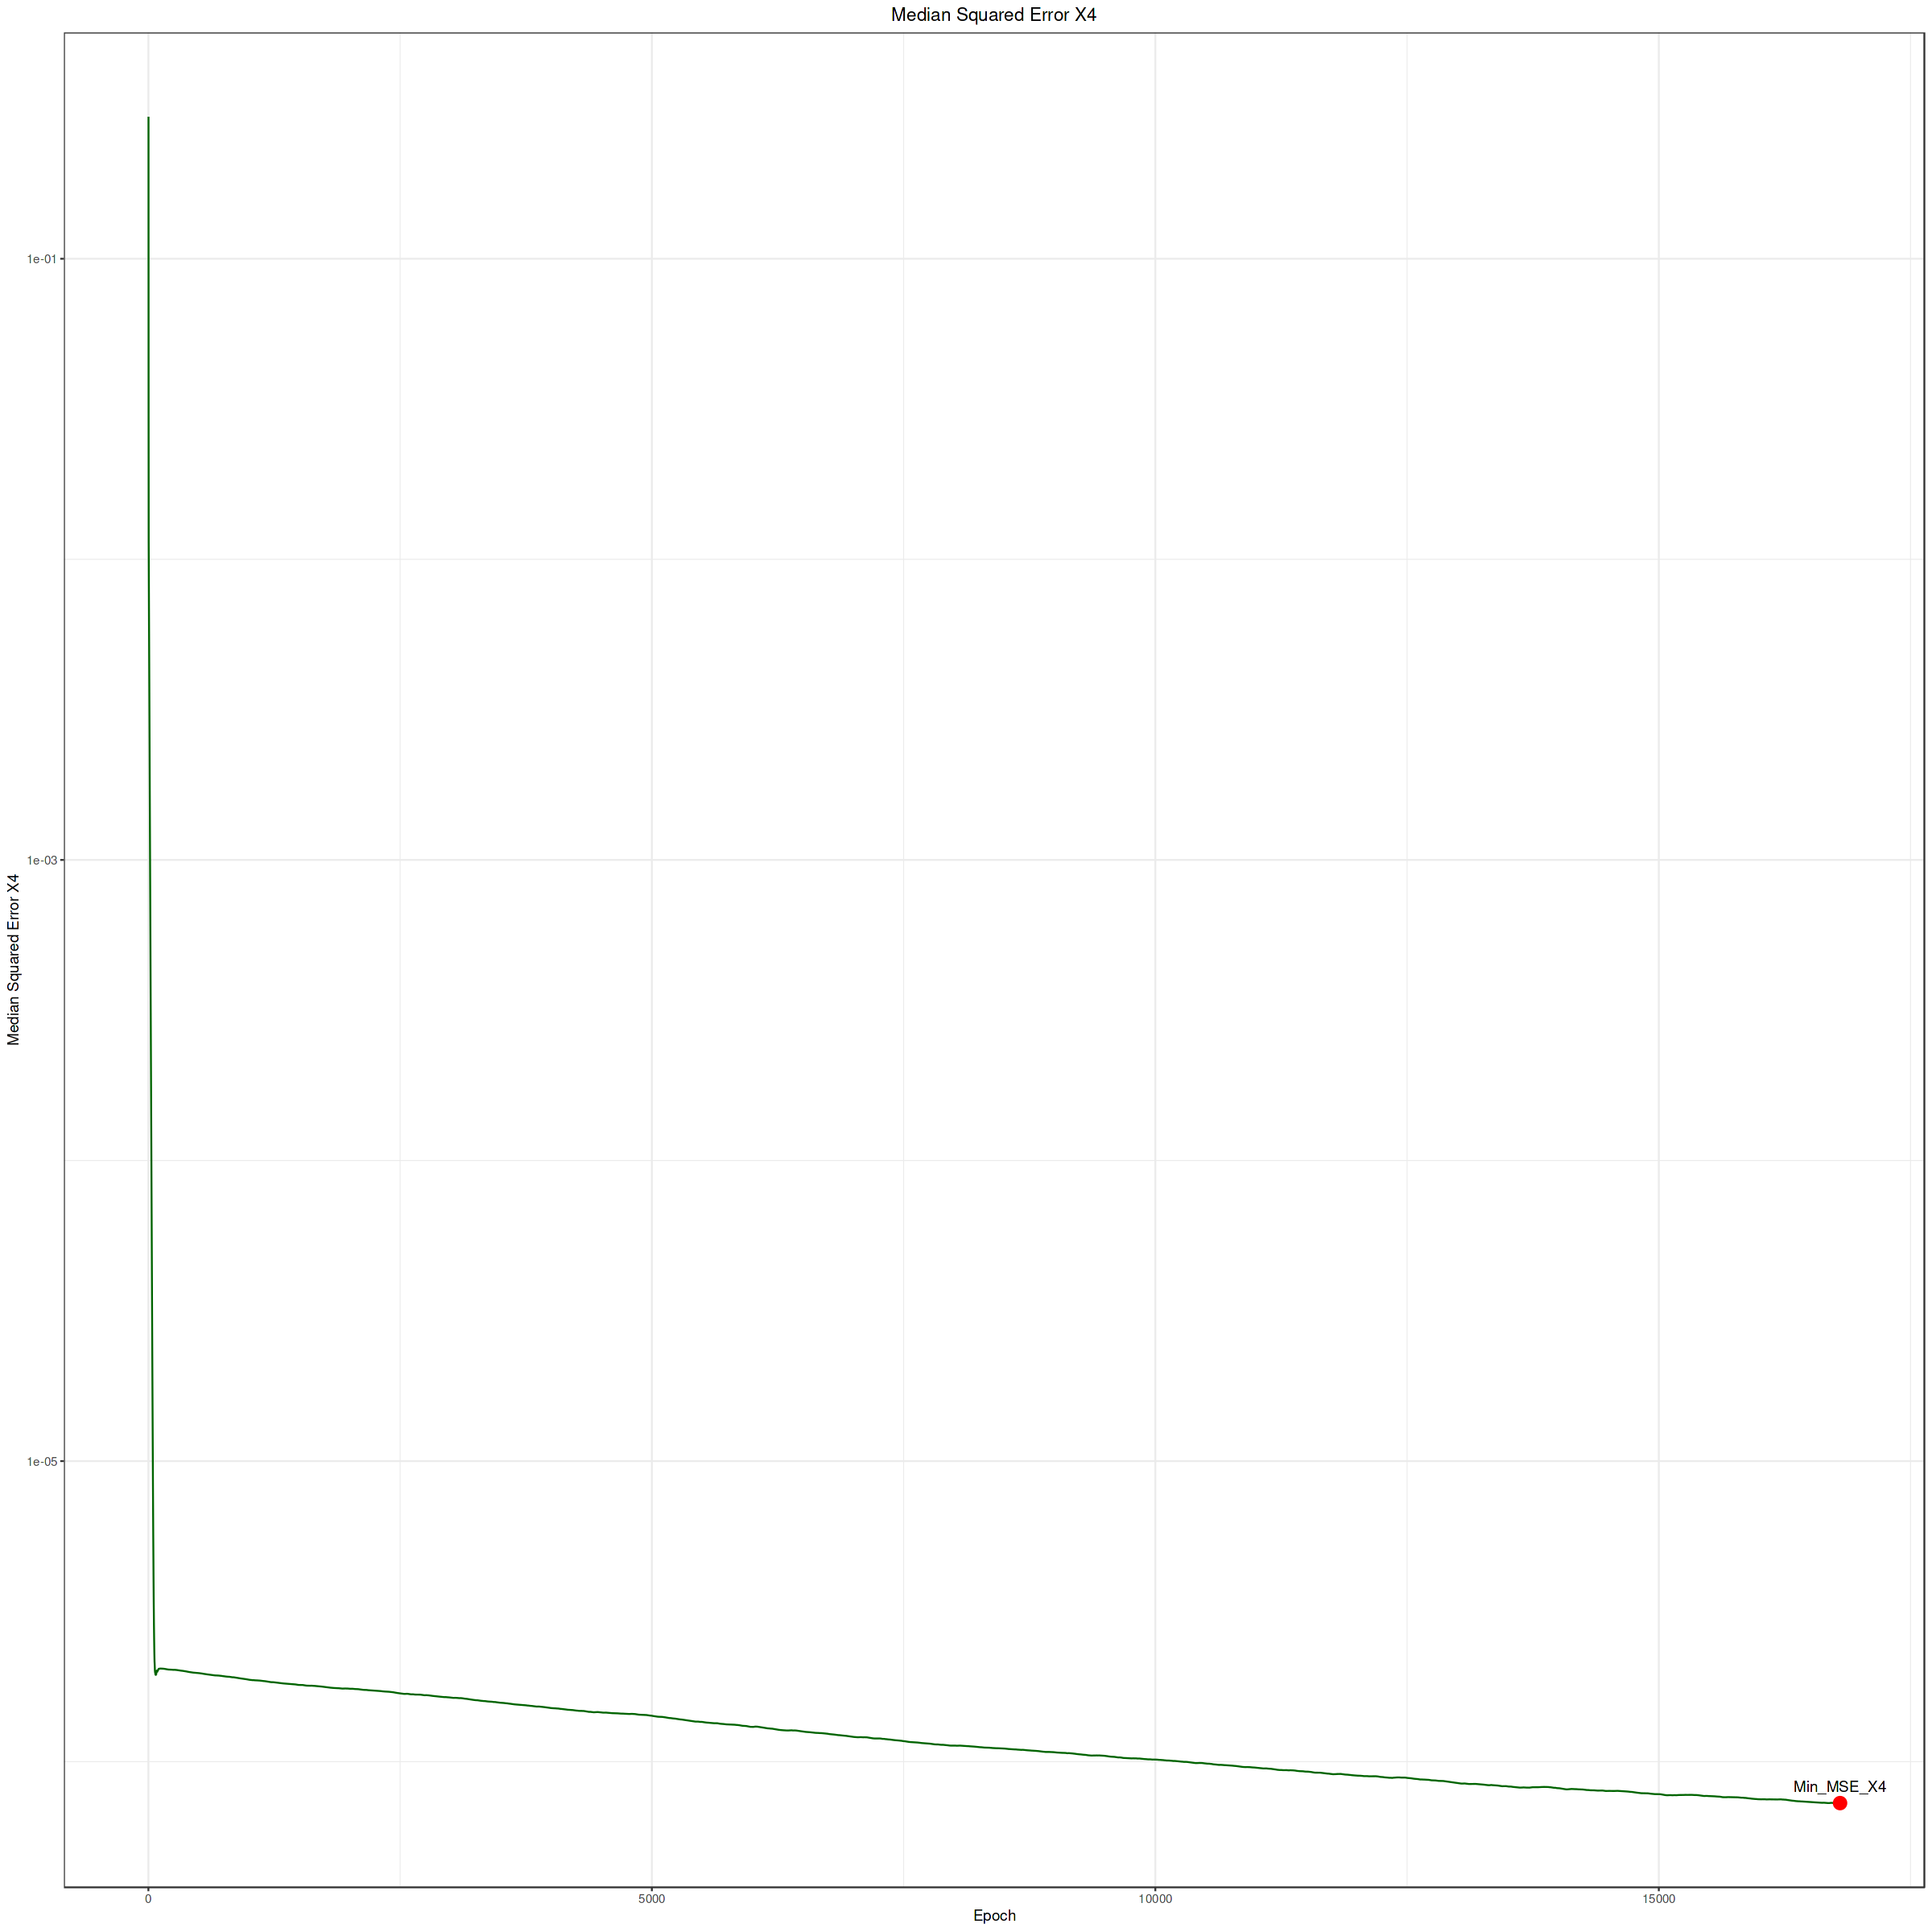

In [281]:
options(repr.plot.width = 20, repr.plot.height = 20)

print(MSE_X4_U)

Plot the median squared error for UPRO Price for each epoch in log scale.

In [282]:
MSE_UPRO_Price <-ggplot(data = Median_Squared_Error_U, aes(x = epoch, y = mse_upro)) +
  geom_line(color = "darkgreen") +
  geom_point(data = subset(Median_Squared_Error_U, epoch == Epoch_lowest_error_UPRO), aes(x = epoch, y = mse_upro), color = "red", size = 4) +
  geom_text(data = subset(Median_Squared_Error_U, epoch == Epoch_lowest_error_UPRO), aes(x = epoch, y = mse_upro, label = "Min_MSE_UPRO_Price"), vjust = -1) +
  scale_y_log10() +
  labs(x = "Epoch", y = "Median Squared Error UPRO Price", title = "Median Squared Error UPRO Price") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

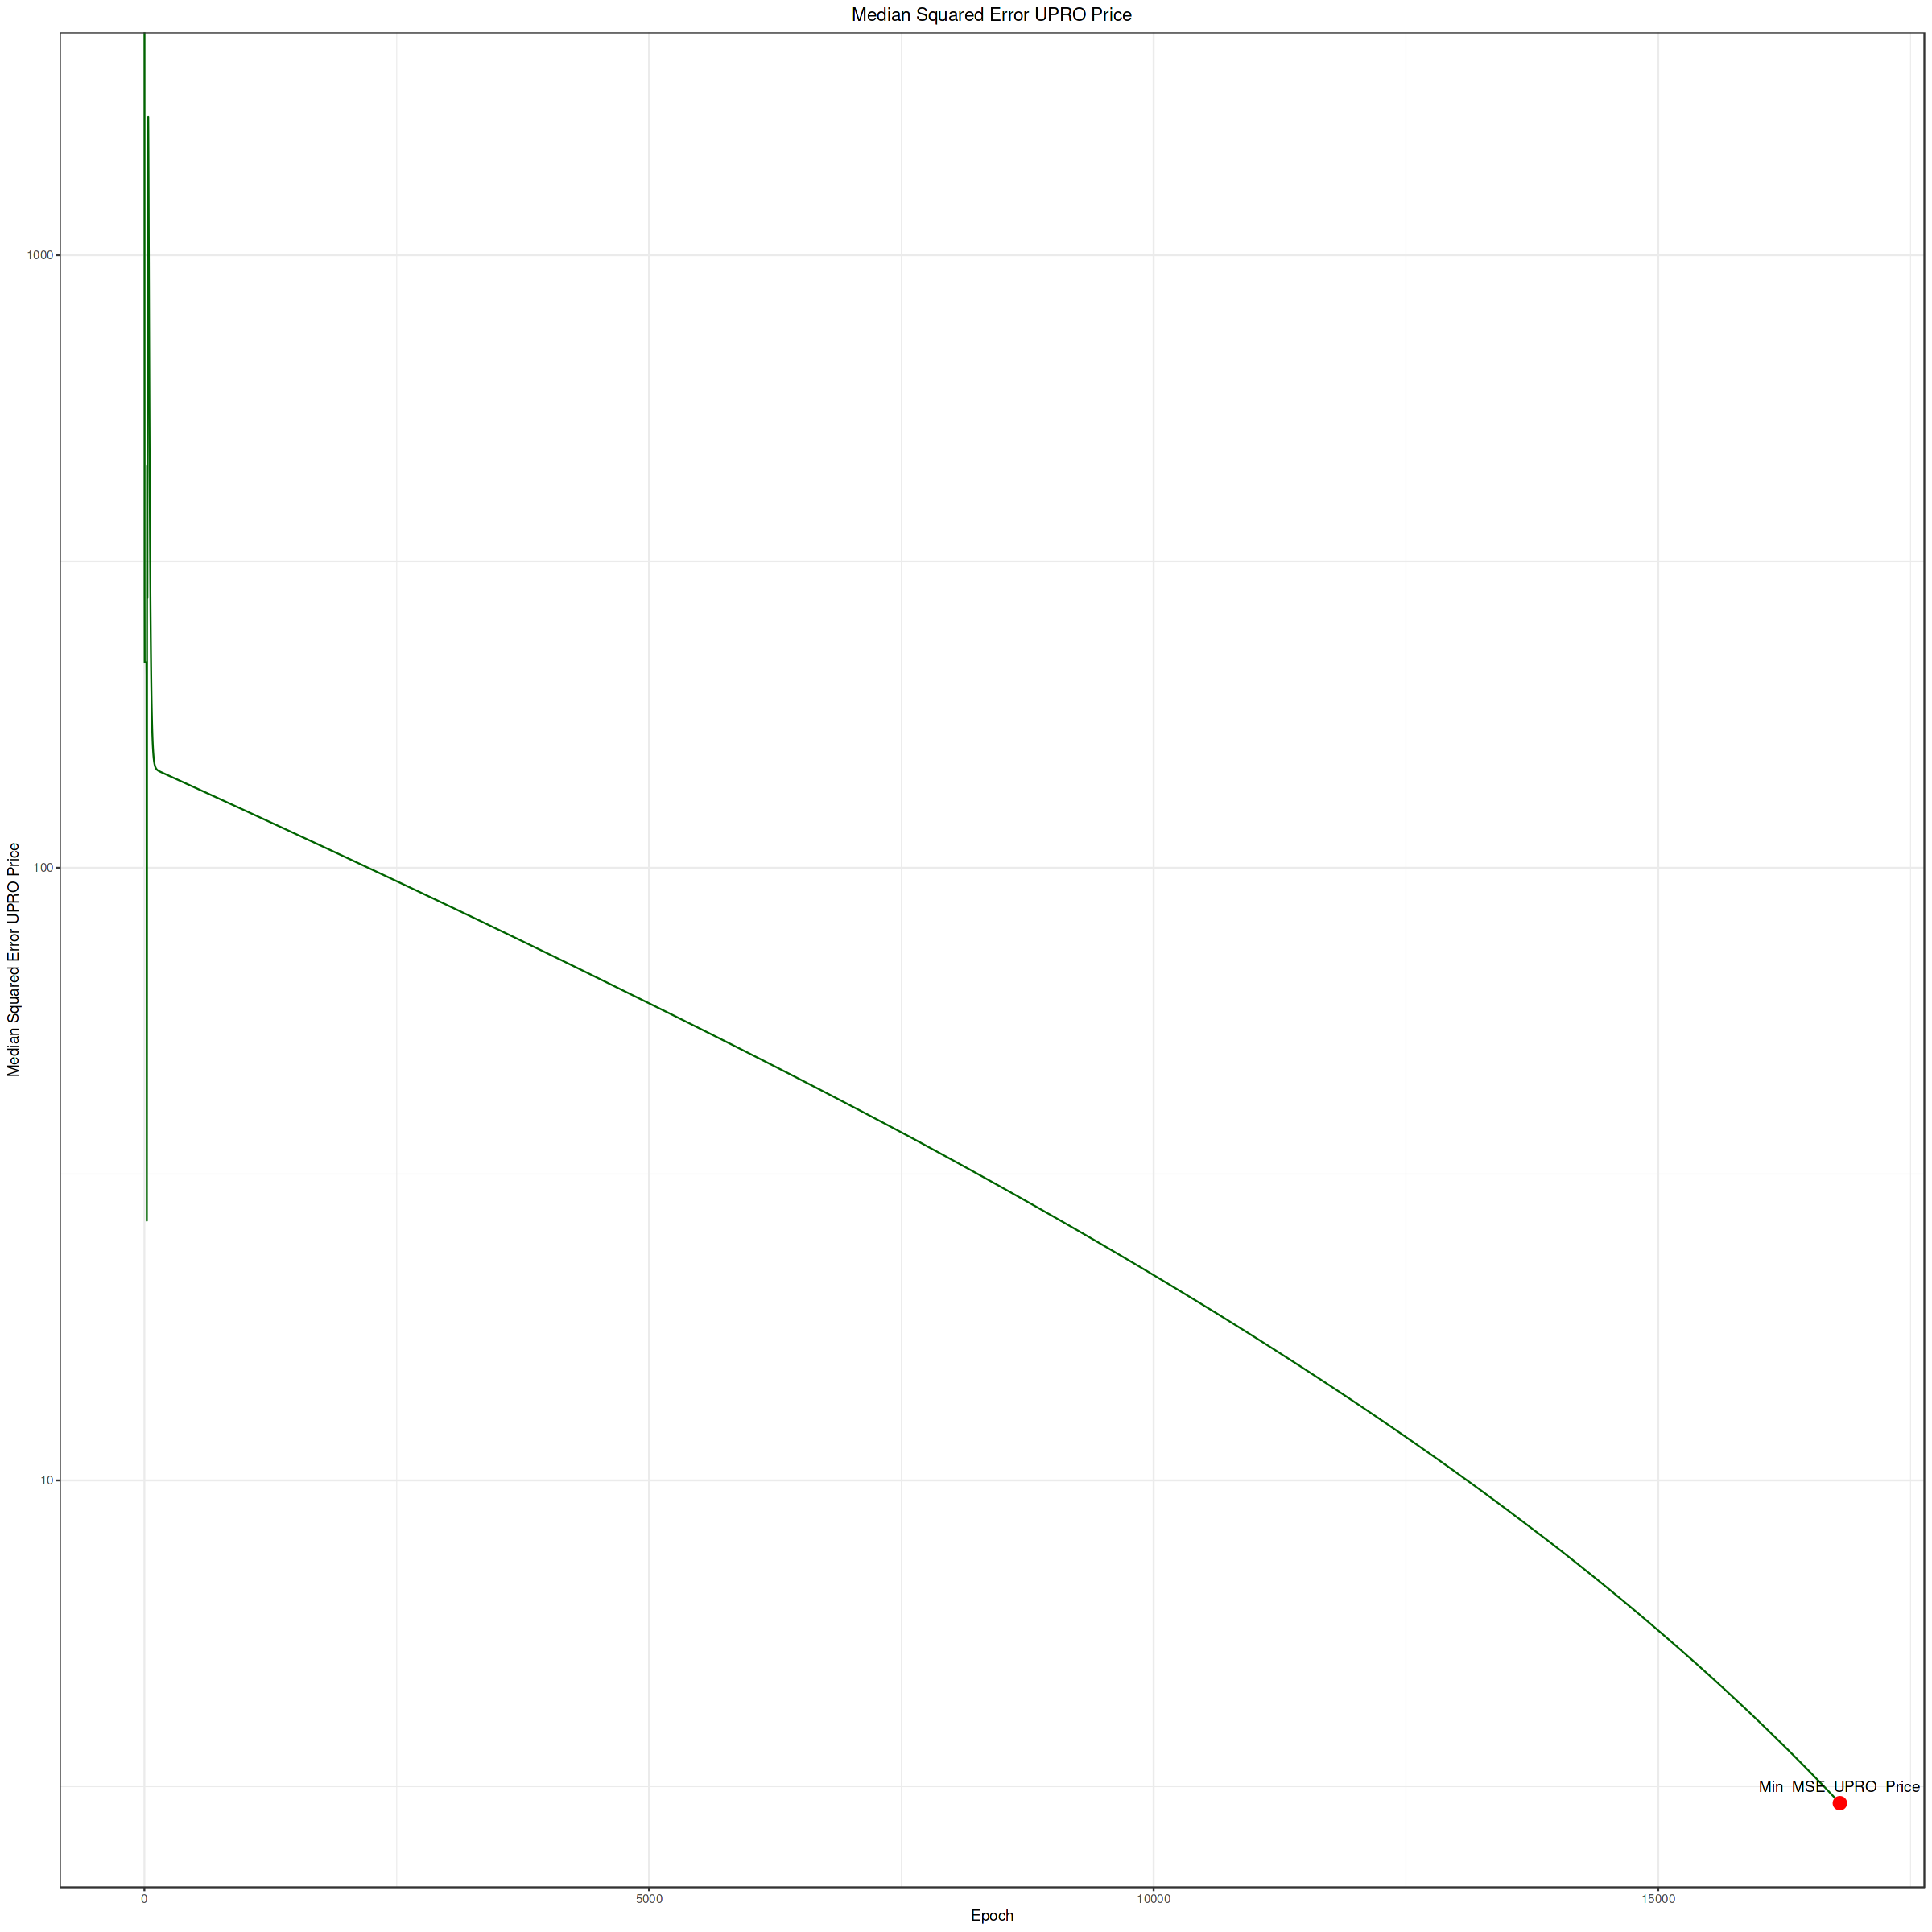

In [283]:
options(repr.plot.width = 20, repr.plot.height = 20)

print(MSE_UPRO_Price)

## Graph best prediction for UPRO Price vs Actual UPRO Price

X4 output with the lowest median squared error for UPRO.

In [284]:
X4_min_U <-X4_list_U[[Epoch_lowest_error_UPRO]]

In [285]:
X4_unscaled_UPRO_min <-(((X4_min_U - N_lower_bound_U)*(range_i_U))/(N_upper_bound_U - N_lower_bound_U)) + min(Y_Output_Neurons_U)

Predicted_Leverage_UPRO <-t(X4_unscaled_UPRO_min)

UPRO_PredPerChange_6_26_2009_Onwards <-SP500_Percent_Neural_Clean_Matrix_U * Predicted_Leverage_UPRO %>%
  as.data.frame() %>%
  setNames("Percent_Change")

UPRO_Closing_Price_Prediction <-data.frame(UPRO_Closing_Price_Pred = Reduce(function(x, y) x * (100 + y) / 100, UPRO_PredPerChange_6_26_2009_Onwards$Percent_Change, accumulate = TRUE, init = first_day_price_UPRO))

Predicted UPRO Closing Price.

In [286]:
UPRO_Pred_ClosingPrice_df <-cbind(UPRO_Date_Closing_Price, UPRO_Closing_Price_Prediction)

Plot UPRO_Pred_ClosingPrice_df

In [287]:
UPRO_Pred_ClosingPrice_df_DateConvert <-UPRO_Pred_ClosingPrice_df
UPRO_Pred_ClosingPrice_df_DateConvert$Date <-as.Date(UPRO_Pred_ClosingPrice_df_DateConvert$Date, format = "%Y-%m-%d")

UPRO_Closing_Price_Pred_df_plot <-ggplot(data = UPRO_Pred_ClosingPrice_df_DateConvert, aes(x = Date, y = UPRO_Closing_Price), group=1) +
  geom_line(aes(color = "UPRO")) +
  geom_line(data = UPRO_Pred_ClosingPrice_df_DateConvert, aes(x = Date, y = UPRO_Closing_Price_Pred, color = "UPRO Predicted"), group = 1) +
  labs(x = "Date", y = "Closing Price", title = "UPRO Closing Price vs. Predicted Closing Price") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

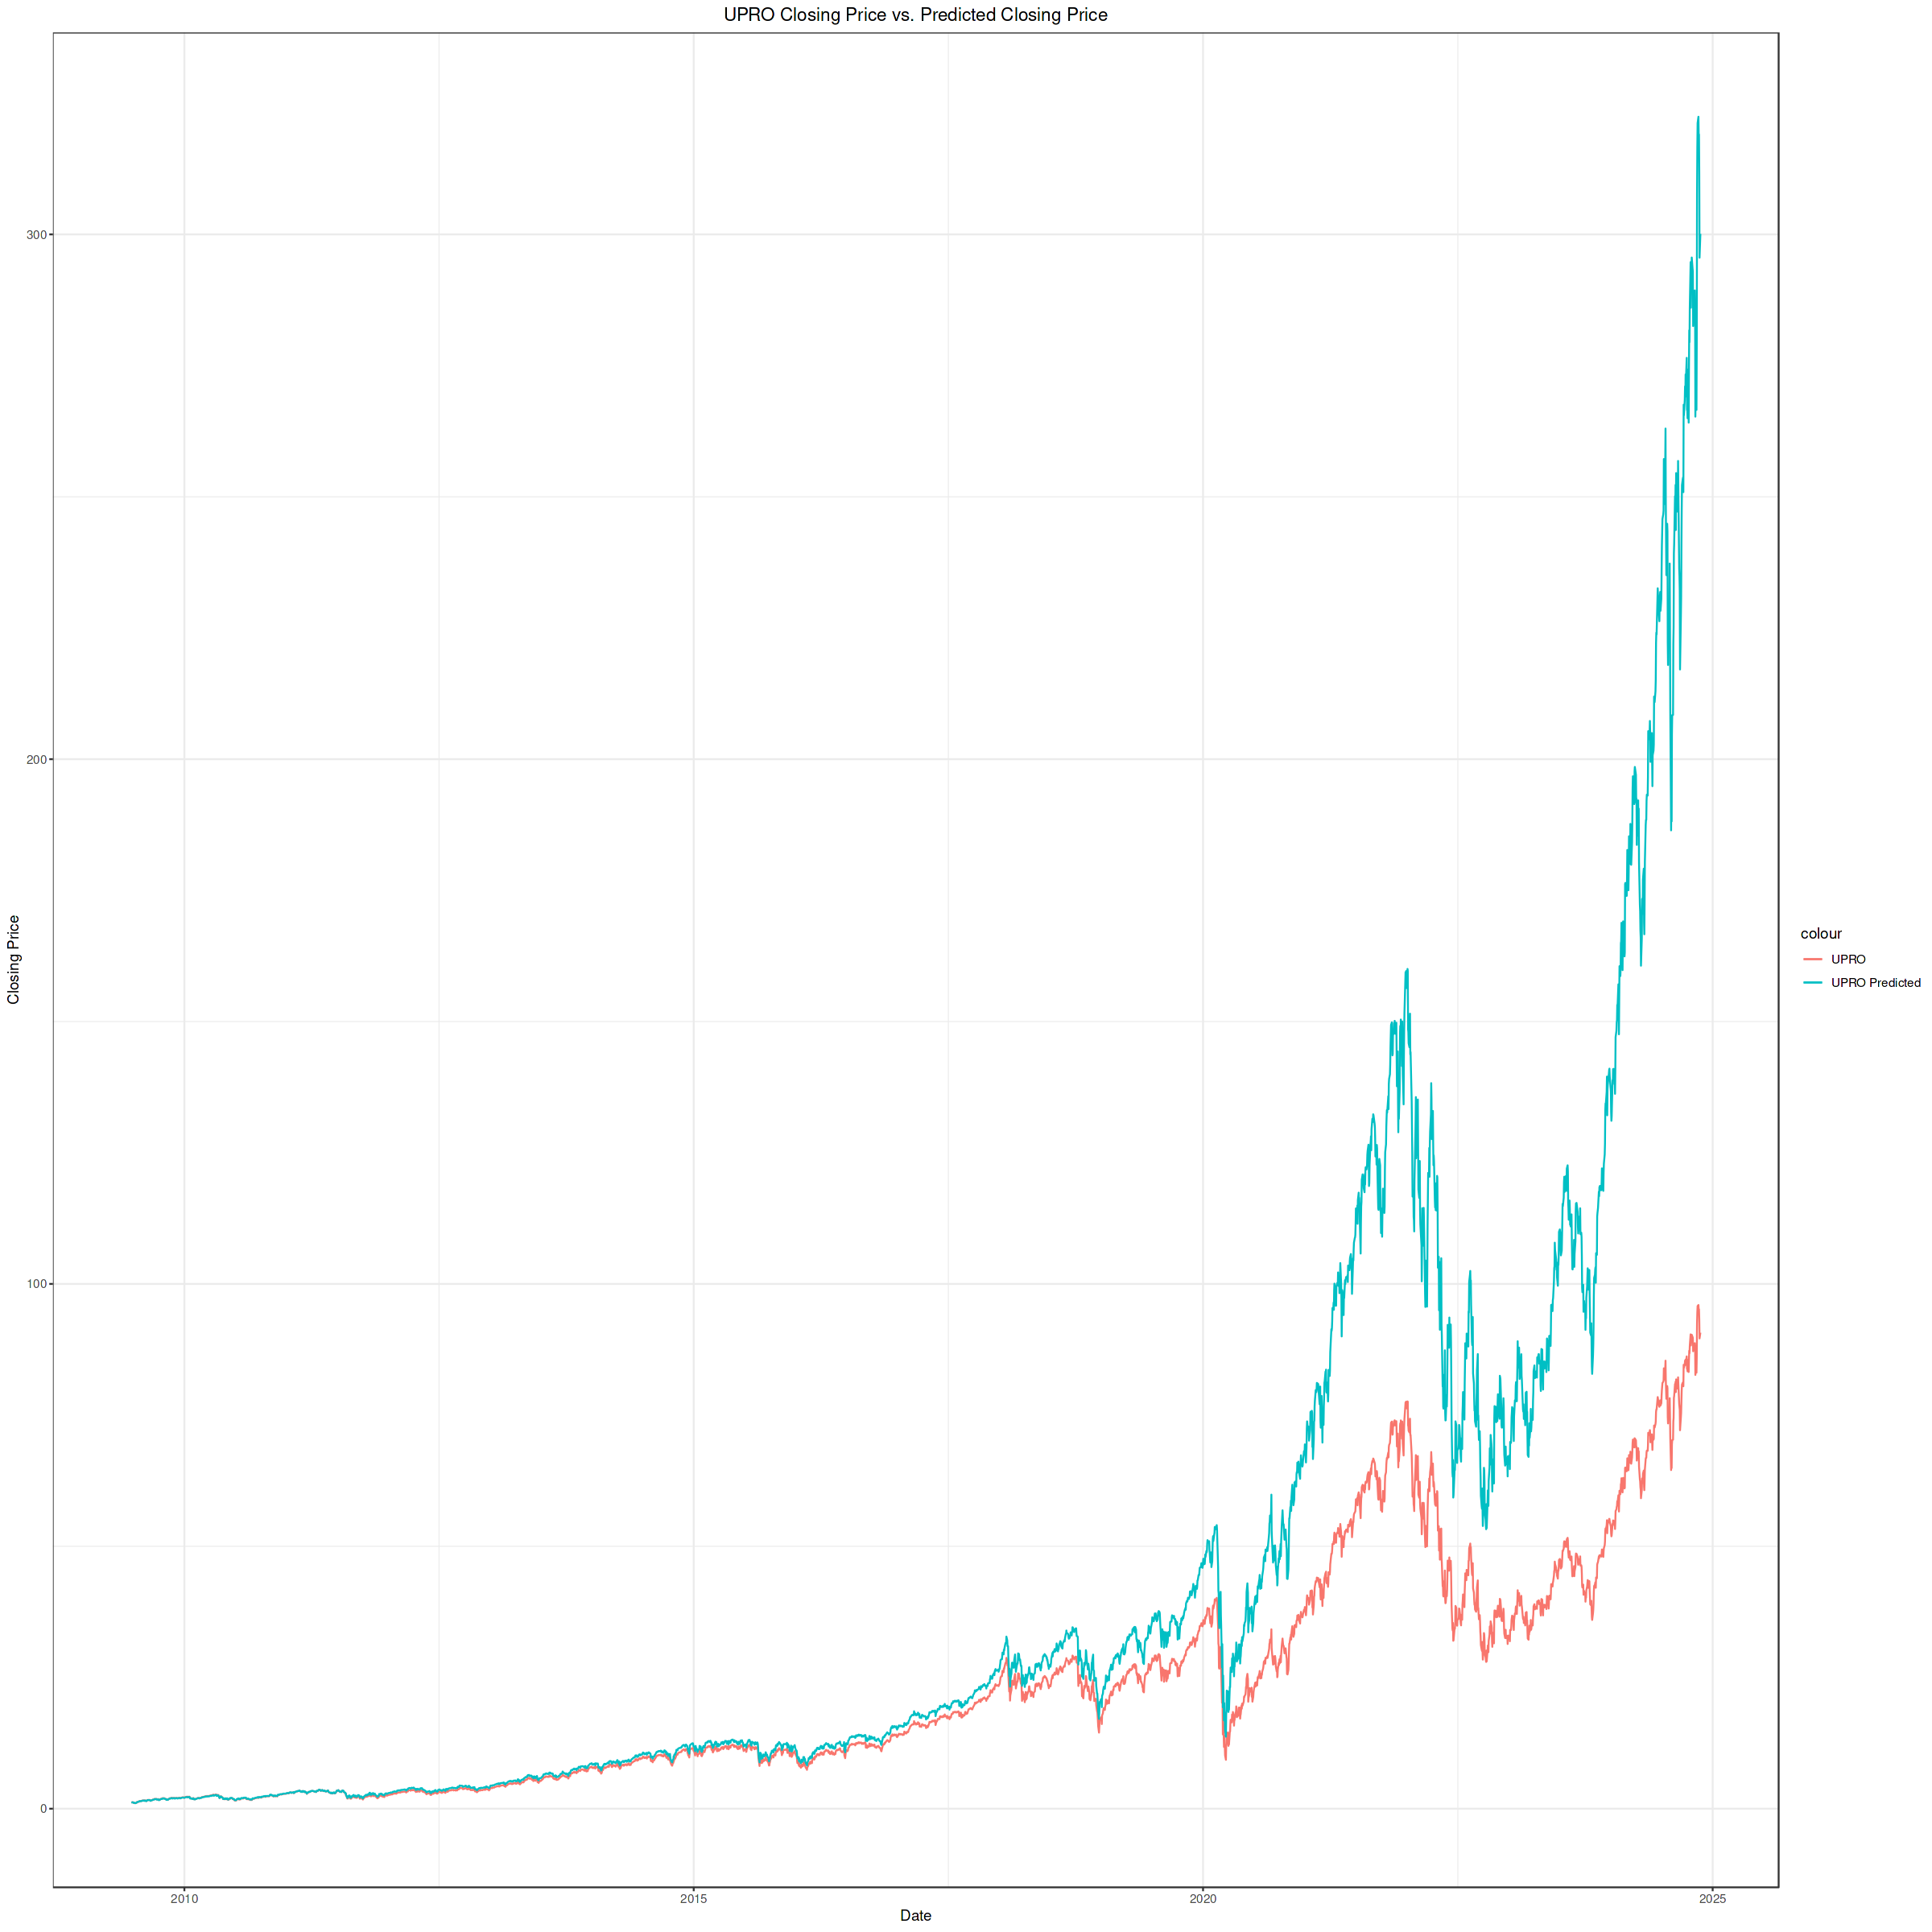

In [288]:
options(repr.plot.width = 20, repr.plot.height = 20)

print(UPRO_Closing_Price_Pred_df_plot)

## Feedforward parameters to make predictions for S&P500 from 1957-03-04 Onwards (3X Leverage)

UNSCALED Neural Network Input for feedforward prediction

In [289]:
X_Input_Neurons_feedforward_U <-Neural_Network_Input_Feedforward

Scaled Neural_Network_Input_Feedforward to feed into Neural Network

In [290]:
Neural_Network_Input_feedforward_Scaled_U <-Neural_Network_Input_Feedforward   %>%
  mutate(x_1 = N_lower_bound_U + ( ((x_1 - min(x_1))*(N_upper_bound_U - N_lower_bound_U)) / (max(x_1) - min(x_1))),
         x_2 = N_lower_bound_U + ( ((x_2 - min(x_2))*(N_upper_bound_U - N_lower_bound_U)) / (max(x_2) - min(x_2))))

Weight matrix M1, M2, M3 from the epoch with the lowest median squared error for UPRO

In [291]:
M1_min_U <-M1_list_U[[Epoch_lowest_error_UPRO]]

M2_min_U <-M2_list_U[[Epoch_lowest_error_UPRO]]

M3_min_U <-M3_list_U[[Epoch_lowest_error_UPRO]]

## Forward Pass Feedforward Prediction (3X Leverage)

UPRO Neural Network Feedforward Prediction<br>
_f=feedforward<br>

In [292]:
X1_f_U <-t(as.matrix(cbind(Neural_Network_Input_feedforward_Scaled_U, x_3 = 1)))

Z2_f_U <-M1_min_U %*% X1_f_U

LeakyReLU1_f_U <- t(apply(Z2_f_U, 1, function(x) ifelse(x >= 0, x, LeakyReLU_alpha_U * x))) %>% 
  as.matrix()

X2_f_U <-rbind(LeakyReLU1_f_U, 1)  %>% 
  as.matrix()

Z3_f_U <-M2_min_U %*% X2_f_U

LeakyReLU2_f_U <- t(apply(Z3_f_U, 1, function(x) ifelse(x >= 0, x, LeakyReLU_alpha_U * x))) %>% 
  as.matrix()

X3_f_U <-rbind(LeakyReLU2_f_U, 1) %>% 
  as.matrix()

Z4_f_U <-M3_min_U %*% X3_f_U

X4_f_U <-Z4_f_U %>% 
  as.matrix()

X4_f_U must be unscaled. Range of i is the range of yi_U. X4_f_U is the<br> 
output of the neural network, which is the predicted UPRO leverage.<br>
X4_f_U is the unscaled 3x S&P500 leverage prediction.<br>

In [293]:
X4_unscaled_f_U <-(((X4_f_U - N_lower_bound_U)*(range_i_U))/(N_upper_bound_U - N_lower_bound_U)) + min(Y_Output_Neurons_U)

Predicted 3X S&P500 leverage.

In [294]:
Lev_3X_Predicted <-t(X4_unscaled_f_U)

Min, max and median of predicted 3x leverage S&P500.

In [295]:
print(paste("Min of predicted 3x leverage S&P500:", round(min(Lev_3X_Predicted),2)))
print(paste("Max of predicted 3x leverage S&p500:", round(max(Lev_3X_Predicted),2)))
print(paste("Median of predicted 3x leverage S&p500:", round(median(Lev_3X_Predicted),2)))

[1] "Min of predicted 3x leverage S&P500: 2.5"
[1] "Max of predicted 3x leverage S&p500: 4"
[1] "Median of predicted 3x leverage S&p500: 2.85"


Predicted 3x leverage S&P500 Percentage change from 1957-03-05 onwards.

In [296]:
Lev3x_PredPerChange <-SP500_Daily_Percent_Change_feedforward * Lev_3X_Predicted  %>% 
  as.data.frame()

Calculates predicted percentage change for 3x S&P500.<br>
Next day price = (first day price) * (100 + predicted UPRO percentage change) / 100.<br>
This is price calculated through neural network.<br>
SP&500 3X Closing Price was calculated by multiplying UPRO lev median by S&P500 percent change.<br>

In [297]:
SP500_3X_Closing_Price_Pred_df <-data.frame(SP500_3XClosing_Price_NeuralNet = Reduce(function(x, y) x * (100 + y) / 100,
  Lev3x_PredPerChange$Daily_Percent_Change, accumulate = TRUE, init = first_day_price_SP500_f))

Comparison of S&P500 Closing Price with Median and Neural Network Predictions(3X)

In [298]:
SP500_3XClosingPrice_Median <-rbind(first_day_price_SP500_f, SP500_3XClosingPrice_df)

SP500_1xVs3X_Closing_Price_Pred_df <-cbind(SP500_Date_ClosingPrice, SP500_3XClosingPrice_Median, SP500_3X_Closing_Price_Pred_df)

SP500_1xVs3X_Closing_Price_Pred_df_DateConvert <-SP500_1xVs3X_Closing_Price_Pred_df
SP500_1xVs3X_Closing_Price_Pred_df_DateConvert$Date <- as.Date(SP500_1xVs3X_Closing_Price_Pred_df_DateConvert$Date, format = "%Y-%m-%d")

SP500_1xVs3X_Closing_Price_Pred_plot <-ggplot(data = SP500_1xVs3X_Closing_Price_Pred_df_DateConvert, aes(x = Date, y = SP500_Closing_Price), group=1) +
  geom_line(aes(color = "SP500")) +
  geom_line(data = SP500_1xVs3X_Closing_Price_Pred_df_DateConvert, aes(x = Date, y = SP500_3XClosing_Price, color = "SP500 3X Median"), group = 1) +
  geom_line(data = SP500_1xVs3X_Closing_Price_Pred_df_DateConvert, aes(x = Date, y = SP500_3XClosing_Price_NeuralNet, color = "SP500 3X NeuralNetwork"), group = 1) +
  scale_y_log10() +
  scale_color_manual(values = c("SP500" = "red", "SP500 3X Median" = "blue", "SP500 3X NeuralNetwork" = "green")) +
  labs(title = "Comparison of S&P500 Closing Price with Median and Neural Network Predictions(3X)") +
  theme(plot.title = element_text(hjust = 0.5))

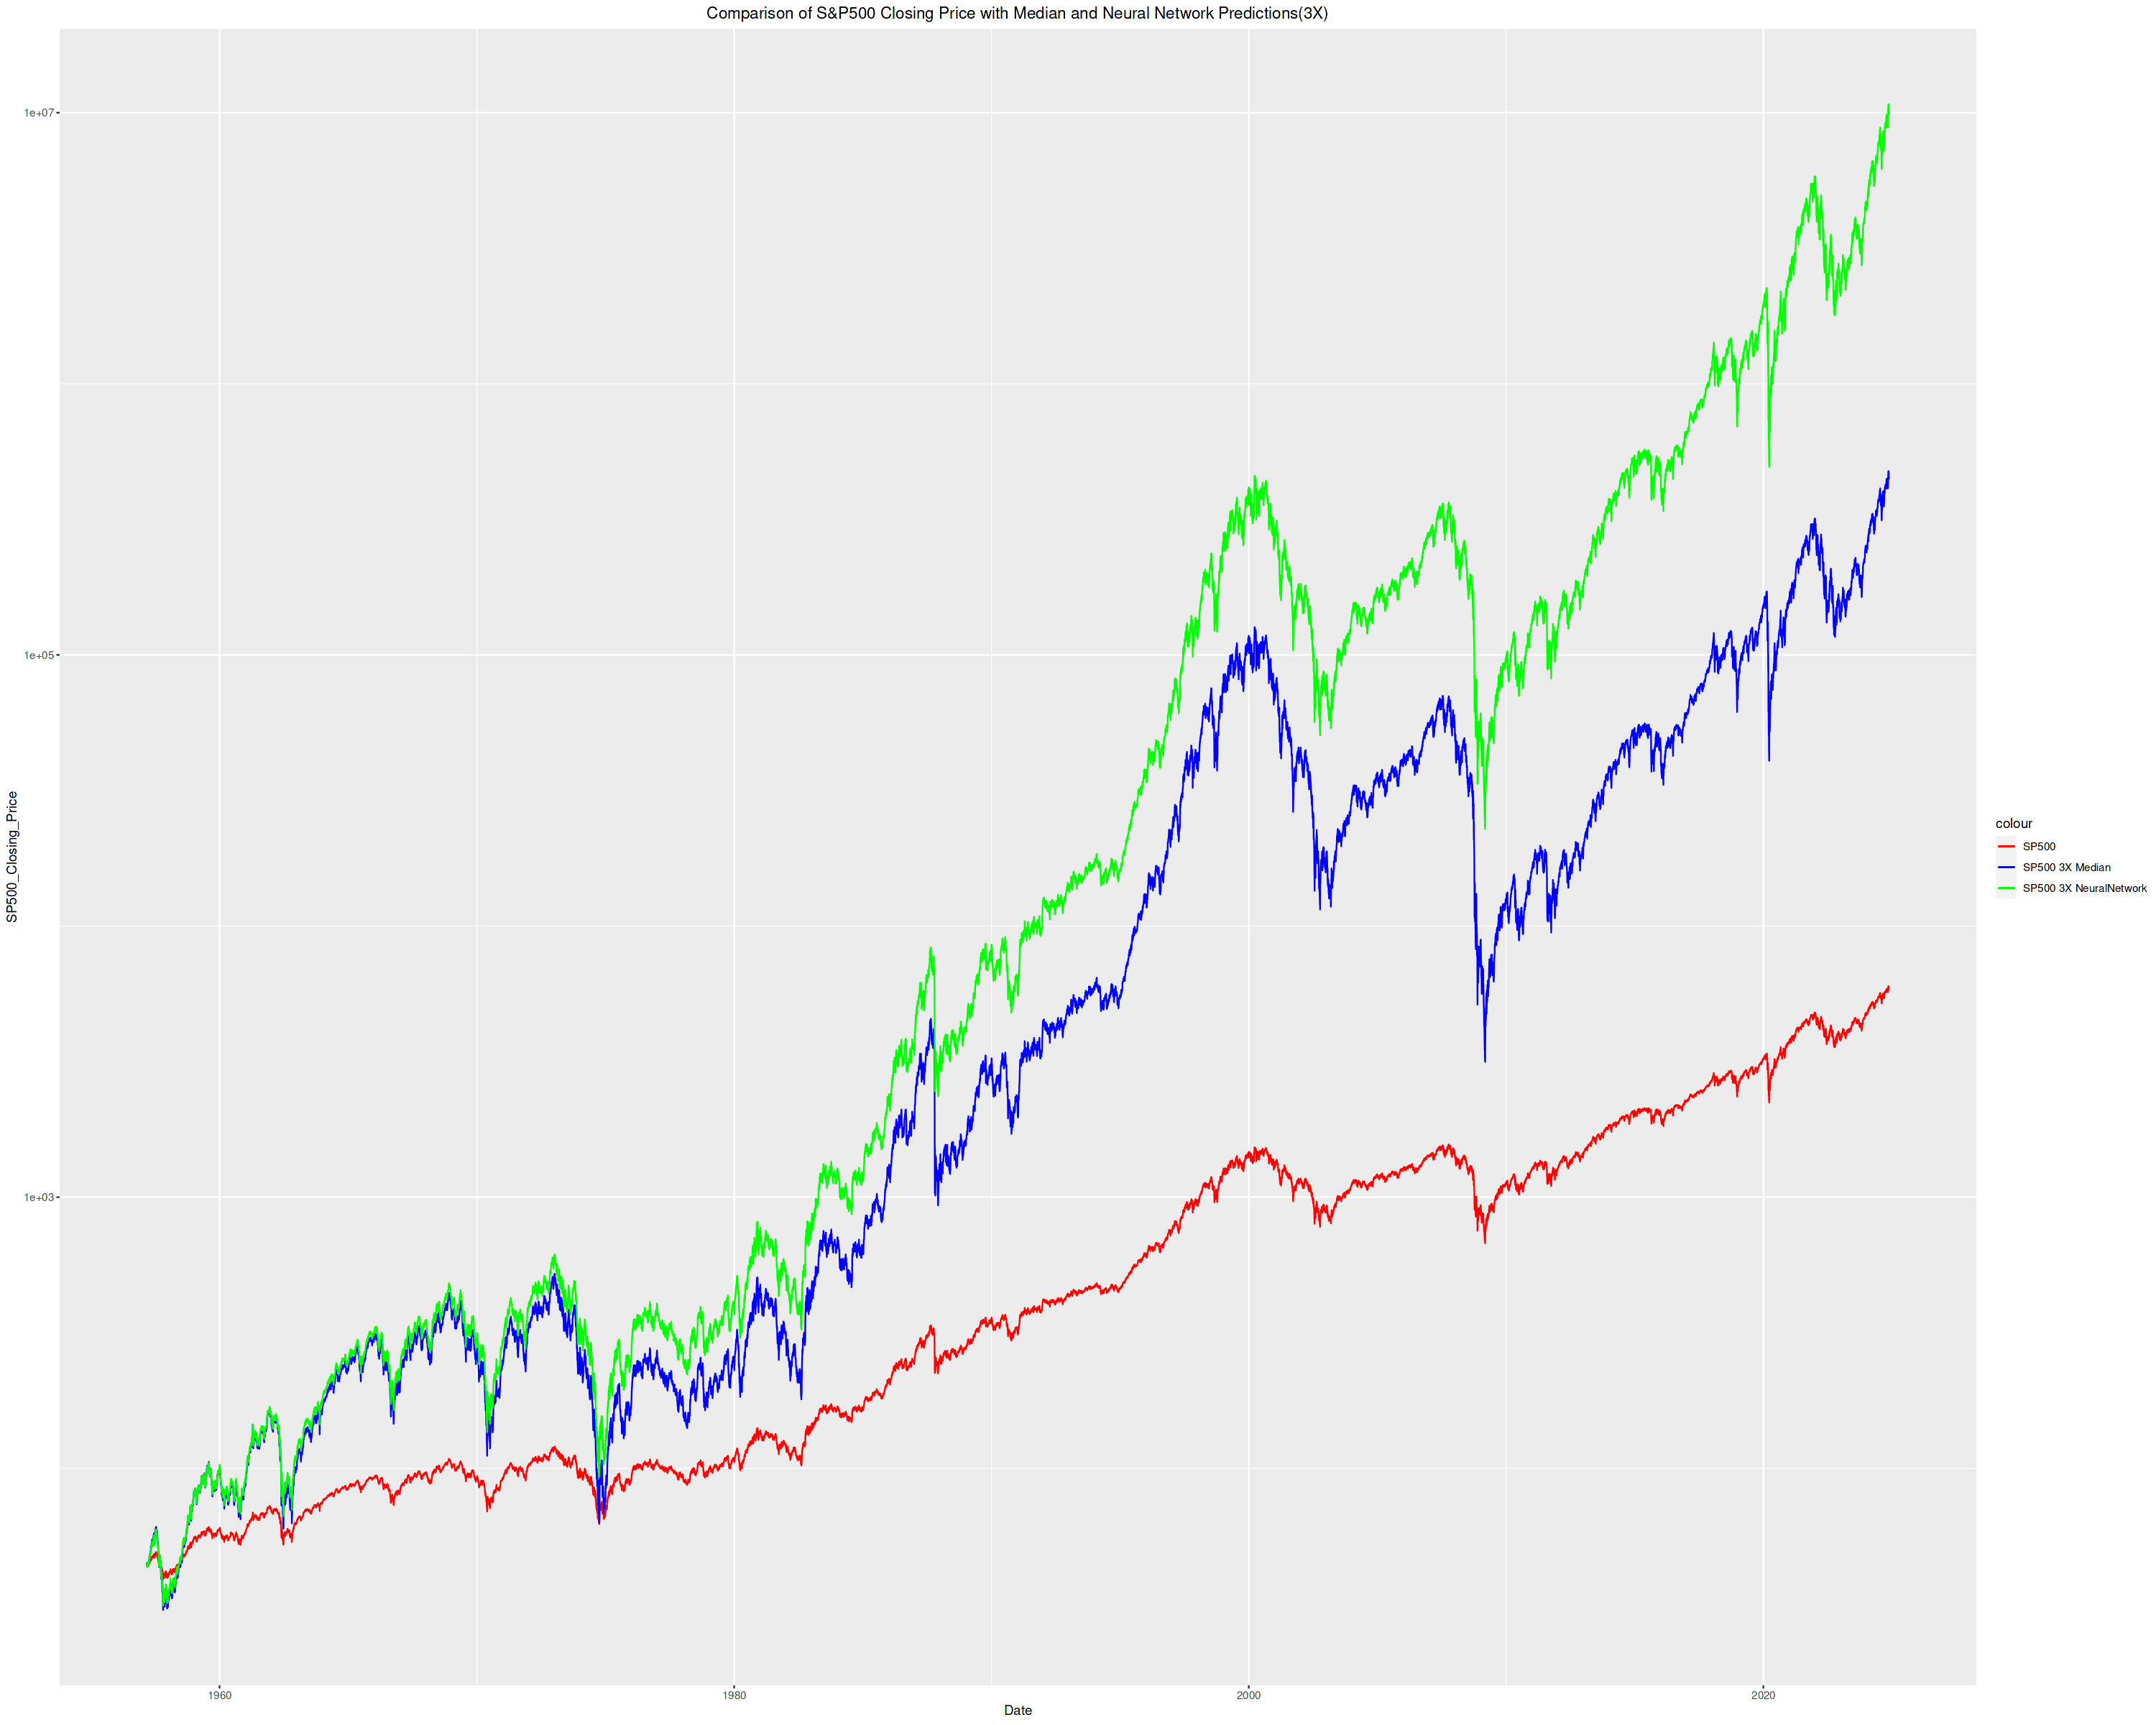

In [299]:
options(repr.plot.width = 25, repr.plot.height = 20)

print(SP500_1xVs3X_Closing_Price_Pred_plot)

## Neural Network Conclusion

The modern S&P 500 started in the 1950’s. How does one simulate a<br>
leveraged S&P 500 ETF, if the leverage 2x SSO did not exist until 2006<br>
and the leverage 3x UPRO ETF did not exist until 2009? The leverage is<br>
not known from the 1950’s because leverage ETFs did not exist, but the<br>
daily percentage of the S&P 500 is known. Therefore, if the daily<br>
leverage is simulated via a neural network. Then the daily price for<br>
leverage S&P 500 ETFs can be calculated via the simulated daily leverage<br>
and the actual daily percentage change.<br>

Each neural network uses 1 neuron in each hidden layer. Each neural<br>
network has an input layer, 2 hidden layers and 1 output layer. Even<br>
though each hidden layer only uses 1 neuron; the code is generalized to<br>
use more than 1 neuron in each hidden layer. Median squared error for<br>
leverage price is used as validation for the neural network. Used a<br>
pseudo early stopping technique, it is not really early stopping because<br>
the neural network is not actually stopped. But rather neural network is<br>
overfitted to the training data. The red dot represents the most<br>
optimized epochs in the “Median Squared Error” plots. The most optimized<br>
matrices are represented by those red dots. All the weight matrices for<br>
every epoch are stored. Hence the most optimized weight matrices are<br>
selected based on the best median squared error from leverage price.<br> 

As seen from “SSO Closing Price vs. Predicted Closing Price” plot; the<br>
neural network was able to simulate SSO 2x S&P 500 ETF with a good degree<br>
of accuracy.  Therefore, a feedforward prediction for a hypothetical 2x<br>
ETF should also give an accurate prediction. As seen from “Comparison of<br>
S&P500 Closing Price with Median and Neural Network Predictions(2X)” plot;<br>
the 2x ETF price based on median leverage was almost indistinguishable<br>
from the 2x ETF price based on the neural network prediction. Because the<br>
median and neural network price predictions were so close, and the neural<br>
network was also able to predict SSO 2x S&P 500 ETF with a good degree of<br>
accuracy. Then it leads me to believe that calculating 2x ETF via median<br>
leverage is pretty much equivalent to calculating 2x ETF via the neural<br>
network.<br> 

As seen from “UPRO Closing Price vs. Predicted Closing Price” plot; up to<br>
about 2020; the neural network was able to simulate UPRO 3x S&P 500 ETF<br>
with a good degree of accuracy. But after about 2020; the neural network<br>
over predicted UPRO price. In other words. After 2020; the neural network<br>
gave UPRO prices that are greater than the actual UPRO prices. Why is the<br>
prediction for UPRO 3x S&P 500 ETF prices worse than the predicted SSO 2x<br>
S&P 500 ETF prices? SSO began trading in 2006, while UPRO began trading<br>
in 2009, therefore SSO has 3 more years of training data. More training<br>
data for the neural network will simulate better price prediction for<br>
UPRO. Unfortunately, the only way to get more training data is to wait<br>
for more trading days for UPRO, then extract the closing prices from the<br>
trading days. Outliers are also not accounted for. Therefore, outliers<br>
may have a much higher effect on the neural network. A more robust loss<br>
function like Huber loss may account for the outliers and give a much<br>
better fit to the data. Similar to how the “UPRO Closing Price vs. Predicted<br>
Closing Price” plot predicts a higher price for UPRO price. When compared<br>
to the UPRO price calculated via median leverage; the “Comparison of<br>
S&P500 Closing Price with Median and Neural Network Predictions(3X)” plot<br>
also gives higher UPRO price for the neural network prediction.<br>

FIN.<br>

References<br>

Cooper, Tony, Alpha Generation and Risk Smoothing Using Managed Volatility (August 25, 2010).<br>
    Available at SSRN: https://ssrn.com/abstract=1664823 or http://dx.doi.org/10.2139/ssrn.1664823

Jordan, J. (2019). Neural networks: training with backpropagation. Jeremy Jordan.<br>
  https://www.jeremyjordan.me/neural-networks-training/

The Vanguard Group. (n.d.). Market volatility regulations. Vanguard.<br>
    https://personal.vanguard.com/us/content/Funds/FundsToolsCircuitBreakersJSP.jsp<br>

Valetkevitch, C. (2013, April 10). TIMELINE-Key dates and milestones in the S&P 500’s history. U.S.<br>
    https://www.reuters.com/article/usa-stocks-sp-timeline/timeline-key-dates-and-milestones-in-the-sp-500s-history-idUSL2N0CX13620130410<br>

Zohair Mustafeez, A. (n.d.). What is early stopping? https://www.educative.io/.<br>
  https://www.educative.io/answers/what-is-early-stopping